##AUDIO CLASSIFICATION USING ML

In [1]:
!pip install librosa

In [2]:
!pip install resampy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.4 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import files

uploaded = files.upload()

Saving 4201-3-2-0[1].wav to 4201-3-2-0[1].wav


In [5]:
import IPython.display as ipd
import librosa # mono function,normalized and all to one freq 22khz
import librosa.display

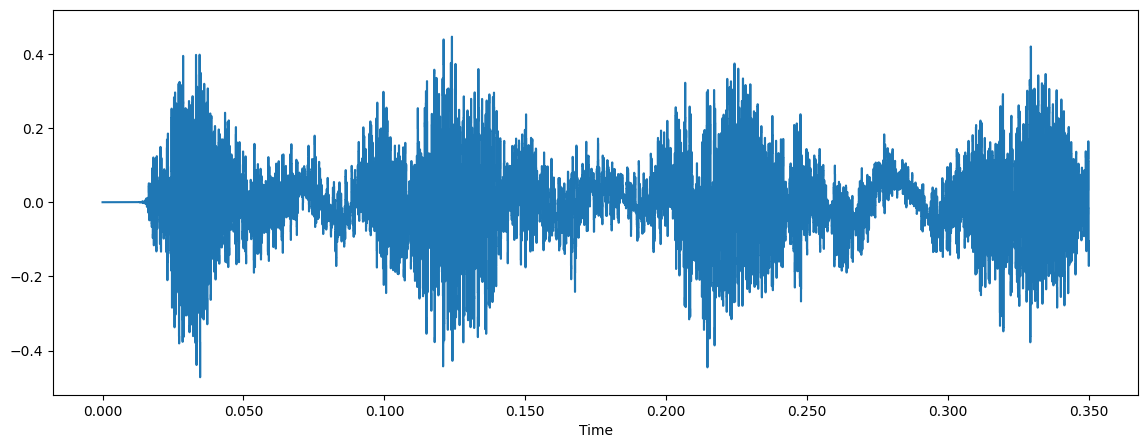

In [6]:

plt.figure(figsize=(14,5))
# Get the filename from the dictionary returned by files.upload()
filename = list(uploaded.keys())[0]
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [7]:
sample_rate

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [9]:
wave_sample_rate

44100

In [10]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-7263, -3249],
       [-5536, -4567],
       [-3393, -5615]], dtype=int16)

In [11]:
data

array([ 2.9802322e-08,  5.5879354e-09,  7.4505806e-09, ...,
       -1.1671661e-01, -1.7172906e-01, -1.0471621e-01], dtype=float32)

In [13]:
import pandas as  pd
metadata=pd.read_csv('UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [14]:
metadata['class'].value_counts() #balanced

,count
class,
dog_bark,1000
children_playing,1000
air_conditioner,1000
street_music,1000
jackhammer,1000
engine_idling,1000
drilling,1000
siren,929
car_horn,429


##AUDIO CLASSIFICATION PREPROCESSING

In [15]:
librosa_audio_data,librosa_sample_rate=librosa.load(filename)

In [16]:
print(librosa_audio_data) ## 1d

[ 2.9802322e-08  5.5879354e-09  7.4505806e-09 ... -1.1671661e-01
 -1.7172906e-01 -1.0471621e-01]


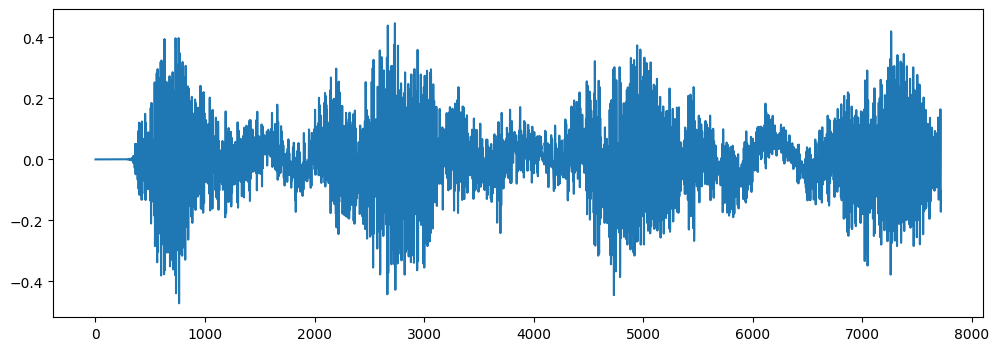

In [17]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

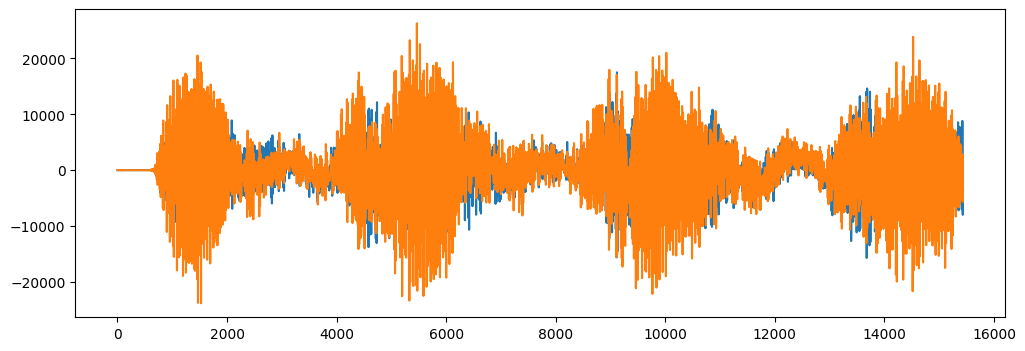

In [18]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

##EXTRACTING FEATURES WITH MEL-FREQUENCY CEPSTRAL COEEFICIENTS(MFCC)

In [19]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape) ##patterens extracted based on freq and time,helps to uniquely identify to which class does audio belong to

(40, 16)


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/audio.zip'  # path to your zip file
extract_to = '/content/UrbanSound8K/audio/'    # unzip destination in Colab VM

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [22]:
import pandas as pd

csv_path = '/content/drive/MyDrive/UrbanSound8K.csv'
metadata = pd.read_csv(csv_path)
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [23]:
import zipfile

zip_path = '/content/drive/MyDrive/audio.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()


File Name                                             Modified             Size
audio/                                         2025-06-28 09:23:32            0
audio/.DS_Store                                2014-05-20 00:28:32        24580
audio/fold10/                                  2025-06-28 07:40:42            0
audio/fold10/.DS_Store                         2014-05-20 00:30:00         6148
audio/fold10/100648-1-0-0.wav                  2014-05-20 00:30:00       114444
audio/fold10/100648-1-1-0.wav                  2014-05-20 00:30:00       185264
audio/fold10/100648-1-2-0.wav                  2014-05-20 00:30:00        71544
audio/fold10/100648-1-3-0.wav                  2014-05-20 00:30:00       285812
audio/fold10/100648-1-4-0.wav                  2014-05-20 00:30:00       328148
audio/fold10/100795-3-0-0.wav                  2014-05-20 00:30:00       705644
audio/fold10/100795-3-1-0.wav                  2014-05-20 00:30:00       705644
audio/fold10/100795-3-1-1.wav           

In [24]:
import zipfile

# Extract to a temporary folder
with zipfile.ZipFile('/content/drive/MyDrive/audio.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/temp_audio/')


In [25]:
import os
import shutil
from glob import glob

# Create clean folders
base_path = '/content/audio/'
for i in range(1, 11):
    os.makedirs(os.path.join(base_path, f'fold{i}'), exist_ok=True)

# Recursively find all .wav files and sort them
for wav_path in glob('/content/temp_audio/**/*/*.wav', recursive=True):
    filename = os.path.basename(wav_path)
    # Get fold number from the path itself or filename (metadata will match it)
    parts = wav_path.split('/')
    if 'fold' in parts:
        fold = [p for p in parts if 'fold' in p][0]
        target_path = os.path.join(base_path, fold, filename)
        shutil.move(wav_path, target_path)


In [26]:
import os
import zipfile
import shutil
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
from glob import glob

# 1. Unzip cleanly
with zipfile.ZipFile('/content/drive/MyDrive/audio.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/temp_audio/')

# 2. Make proper fold directories
target_path = '/content/audio/'
for i in range(1, 11):
    os.makedirs(os.path.join(target_path, f'fold{i}'), exist_ok=True)

# 3. Move .wav files to correct fold folders
for file_path in glob('/content/temp_audio/**/*/*.wav', recursive=True):
    filename = os.path.basename(file_path)
    folder_parts = file_path.split('/')
    fold_name = [part for part in folder_parts if 'fold' in part][0]
    shutil.move(file_path, os.path.join(target_path, fold_name, filename))

# 4. Load metadata
metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8K.csv')

# 5. Define feature extractor
def features_extractor(file):
    try:
        audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features
    except Exception as e:
        print(f"Error processing {file}: {e}")
        return None

# 6. Extract features
extracted_features = []
audio_dataset_path = '/content/audio/'

for index_num, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file_path = os.path.join(audio_dataset_path, 'fold'+str(row["fold"]), row["slice_file_name"])
    label = row["class"]

    if os.path.exists(file_path):
        data = features_extractor(file_path)
        if data is not None:
            extracted_features.append([data, label])
    else:
        print(f"❌ Missing: {file_path}")

# 7. Save
df_features = pd.DataFrame(extracted_features, columns=['feature', 'label'])
df_features.to_csv('/content/drive/MyDrive/urban_sound_features.csv', index=False)
print("✅ Features saved!")


  0%|          | 0/8732 [00:00<?, ?it/s]

❌ Missing: /content/audio/fold5/100032-3-0-0.wav
❌ Missing: /content/audio/fold5/100263-2-0-117.wav
❌ Missing: /content/audio/fold5/100263-2-0-121.wav
❌ Missing: /content/audio/fold5/100263-2-0-126.wav
❌ Missing: /content/audio/fold5/100263-2-0-137.wav
❌ Missing: /content/audio/fold5/100263-2-0-143.wav
❌ Missing: /content/audio/fold5/100263-2-0-161.wav
❌ Missing: /content/audio/fold5/100263-2-0-3.wav
❌ Missing: /content/audio/fold5/100263-2-0-36.wav


  1%|          | 57/8732 [00:01<02:00, 72.06it/s]

❌ Missing: /content/audio/fold5/100852-0-0-0.wav
❌ Missing: /content/audio/fold5/100852-0-0-1.wav
❌ Missing: /content/audio/fold5/100852-0-0-10.wav
❌ Missing: /content/audio/fold5/100852-0-0-11.wav
❌ Missing: /content/audio/fold5/100852-0-0-12.wav
❌ Missing: /content/audio/fold5/100852-0-0-13.wav
❌ Missing: /content/audio/fold5/100852-0-0-14.wav
❌ Missing: /content/audio/fold5/100852-0-0-15.wav
❌ Missing: /content/audio/fold5/100852-0-0-16.wav
❌ Missing: /content/audio/fold5/100852-0-0-17.wav
❌ Missing: /content/audio/fold5/100852-0-0-18.wav
❌ Missing: /content/audio/fold5/100852-0-0-19.wav
❌ Missing: /content/audio/fold5/100852-0-0-2.wav
❌ Missing: /content/audio/fold5/100852-0-0-20.wav
❌ Missing: /content/audio/fold5/100852-0-0-21.wav
❌ Missing: /content/audio/fold5/100852-0-0-22.wav
❌ Missing: /content/audio/fold5/100852-0-0-23.wav
❌ Missing: /content/audio/fold5/100852-0-0-24.wav
❌ Missing: /content/audio/fold5/100852-0-0-25.wav
❌ Missing: /content/audio/fold5/100852-0-0-26.wav
❌ M

  1%|          | 103/8732 [00:02<02:01, 70.83it/s]

❌ Missing: /content/audio/fold1/101415-3-0-2.wav
❌ Missing: /content/audio/fold1/101415-3-0-3.wav
❌ Missing: /content/audio/fold1/101415-3-0-8.wav
❌ Missing: /content/audio/fold9/101729-0-0-1.wav
❌ Missing: /content/audio/fold9/101729-0-0-11.wav
❌ Missing: /content/audio/fold9/101729-0-0-12.wav
❌ Missing: /content/audio/fold9/101729-0-0-13.wav
❌ Missing: /content/audio/fold9/101729-0-0-14.wav
❌ Missing: /content/audio/fold9/101729-0-0-16.wav
❌ Missing: /content/audio/fold9/101729-0-0-17.wav
❌ Missing: /content/audio/fold9/101729-0-0-18.wav
❌ Missing: /content/audio/fold9/101729-0-0-19.wav
❌ Missing: /content/audio/fold9/101729-0-0-21.wav
❌ Missing: /content/audio/fold9/101729-0-0-22.wav
❌ Missing: /content/audio/fold9/101729-0-0-23.wav
❌ Missing: /content/audio/fold9/101729-0-0-24.wav
❌ Missing: /content/audio/fold9/101729-0-0-26.wav
❌ Missing: /content/audio/fold9/101729-0-0-28.wav
❌ Missing: /content/audio/fold9/101729-0-0-29.wav
❌ Missing: /content/audio/fold9/101729-0-0-3.wav
❌ Mis

  1%|▏         | 120/8732 [00:02<01:43, 82.92it/s]

❌ Missing: /content/audio/fold1/102106-3-0-0.wav
❌ Missing: /content/audio/fold1/102305-6-0-0.wav
❌ Missing: /content/audio/fold5/102547-3-0-2.wav
❌ Missing: /content/audio/fold5/102547-3-0-7.wav
❌ Missing: /content/audio/fold5/102547-3-0-8.wav
❌ Missing: /content/audio/fold1/102842-3-0-1.wav
❌ Missing: /content/audio/fold1/102842-3-1-0.wav
❌ Missing: /content/audio/fold1/102842-3-1-5.wav
❌ Missing: /content/audio/fold1/102842-3-1-6.wav
❌ Missing: /content/audio/fold7/102853-8-0-0.wav
❌ Missing: /content/audio/fold7/102853-8-0-1.wav
❌ Missing: /content/audio/fold7/102853-8-0-2.wav
❌ Missing: /content/audio/fold7/102853-8-0-3.wav
❌ Missing: /content/audio/fold7/102853-8-0-4.wav
❌ Missing: /content/audio/fold7/102853-8-0-5.wav
❌ Missing: /content/audio/fold7/102853-8-0-6.wav
❌ Missing: /content/audio/fold7/102853-8-1-0.wav


  2%|▏         | 198/8732 [00:09<05:54, 24.09it/s]

❌ Missing: /content/audio/fold1/103074-7-0-0.wav
❌ Missing: /content/audio/fold1/103074-7-0-1.wav
❌ Missing: /content/audio/fold1/103074-7-0-2.wav
❌ Missing: /content/audio/fold1/103074-7-1-0.wav
❌ Missing: /content/audio/fold1/103074-7-1-1.wav
❌ Missing: /content/audio/fold1/103074-7-1-2.wav
❌ Missing: /content/audio/fold1/103074-7-1-3.wav
❌ Missing: /content/audio/fold1/103074-7-1-4.wav
❌ Missing: /content/audio/fold1/103074-7-1-5.wav
❌ Missing: /content/audio/fold1/103074-7-1-6.wav
❌ Missing: /content/audio/fold1/103074-7-2-0.wav
❌ Missing: /content/audio/fold1/103074-7-3-0.wav
❌ Missing: /content/audio/fold1/103074-7-3-1.wav
❌ Missing: /content/audio/fold1/103074-7-3-2.wav
❌ Missing: /content/audio/fold1/103074-7-3-3.wav
❌ Missing: /content/audio/fold1/103074-7-4-0.wav
❌ Missing: /content/audio/fold1/103074-7-4-1.wav
❌ Missing: /content/audio/fold1/103074-7-4-2.wav
❌ Missing: /content/audio/fold1/103074-7-4-3.wav
❌ Missing: /content/audio/fold1/103074-7-4-4.wav
❌ Missing: /content/

  3%|▎         | 258/8732 [00:10<02:32, 55.70it/s]

❌ Missing: /content/audio/fold9/103249-5-0-0.wav
❌ Missing: /content/audio/fold9/103249-5-0-1.wav
❌ Missing: /content/audio/fold9/103249-5-0-10.wav
❌ Missing: /content/audio/fold9/103249-5-0-11.wav
❌ Missing: /content/audio/fold9/103249-5-0-12.wav
❌ Missing: /content/audio/fold9/103249-5-0-13.wav
❌ Missing: /content/audio/fold9/103249-5-0-14.wav
❌ Missing: /content/audio/fold9/103249-5-0-15.wav
❌ Missing: /content/audio/fold9/103249-5-0-16.wav
❌ Missing: /content/audio/fold9/103249-5-0-17.wav
❌ Missing: /content/audio/fold9/103249-5-0-18.wav
❌ Missing: /content/audio/fold9/103249-5-0-19.wav
❌ Missing: /content/audio/fold9/103249-5-0-2.wav
❌ Missing: /content/audio/fold9/103249-5-0-3.wav
❌ Missing: /content/audio/fold9/103249-5-0-4.wav
❌ Missing: /content/audio/fold9/103249-5-0-5.wav
❌ Missing: /content/audio/fold9/103249-5-0-6.wav
❌ Missing: /content/audio/fold9/103249-5-0-7.wav
❌ Missing: /content/audio/fold9/103249-5-0-8.wav
❌ Missing: /content/audio/fold9/103249-5-0-9.wav
❌ Missing:

  3%|▎         | 297/8732 [00:11<01:54, 73.94it/s]

❌ Missing: /content/audio/fold6/104327-2-0-15.wav
❌ Missing: /content/audio/fold6/104327-2-0-19.wav
❌ Missing: /content/audio/fold6/104327-2-0-26.wav
❌ Missing: /content/audio/fold6/104327-2-0-28.wav
❌ Missing: /content/audio/fold6/104327-2-0-3.wav
❌ Missing: /content/audio/fold6/104327-2-0-30.wav
❌ Missing: /content/audio/fold6/104327-2-0-34.wav
❌ Missing: /content/audio/fold6/104327-2-0-4.wav
❌ Missing: /content/audio/fold5/104421-2-0-1.wav
❌ Missing: /content/audio/fold5/104421-2-0-15.wav
❌ Missing: /content/audio/fold5/104421-2-0-20.wav
❌ Missing: /content/audio/fold5/104421-2-0-29.wav
❌ Missing: /content/audio/fold5/104421-2-0-3.wav
❌ Missing: /content/audio/fold5/104421-2-0-5.wav
❌ Missing: /content/audio/fold5/104421-2-0-7.wav
❌ Missing: /content/audio/fold5/104421-2-1-3.wav
❌ Missing: /content/audio/fold7/104625-4-0-15.wav
❌ Missing: /content/audio/fold7/104625-4-0-21.wav
❌ Missing: /content/audio/fold7/104625-4-0-27.wav
❌ Missing: /content/audio/fold7/104625-4-0-29.wav
❌ Missi

  5%|▌         | 458/8732 [00:12<00:54, 151.12it/s]

❌ Missing: /content/audio/fold5/104998-7-0-5.wav
❌ Missing: /content/audio/fold5/104998-7-10-1.wav
❌ Missing: /content/audio/fold5/104998-7-10-10.wav
❌ Missing: /content/audio/fold5/104998-7-10-13.wav
❌ Missing: /content/audio/fold5/104998-7-10-15.wav
❌ Missing: /content/audio/fold5/104998-7-10-8.wav
❌ Missing: /content/audio/fold5/104998-7-10-9.wav
❌ Missing: /content/audio/fold5/104998-7-11-0.wav
❌ Missing: /content/audio/fold5/104998-7-11-2.wav
❌ Missing: /content/audio/fold5/104998-7-12-2.wav
❌ Missing: /content/audio/fold5/104998-7-14-1.wav
❌ Missing: /content/audio/fold5/104998-7-14-5.wav
❌ Missing: /content/audio/fold5/104998-7-14-6.wav
❌ Missing: /content/audio/fold5/104998-7-15-1.wav
❌ Missing: /content/audio/fold5/104998-7-15-3.wav
❌ Missing: /content/audio/fold5/104998-7-15-5.wav
❌ Missing: /content/audio/fold5/104998-7-15-9.wav
❌ Missing: /content/audio/fold5/104998-7-16-0.wav
❌ Missing: /content/audio/fold5/104998-7-16-10.wav
❌ Missing: /content/audio/fold5/104998-7-16-11.

  6%|▌         | 537/8732 [00:15<02:21, 57.88it/s]

❌ Missing: /content/audio/fold7/107357-8-0-0.wav
❌ Missing: /content/audio/fold7/107357-8-0-1.wav
❌ Missing: /content/audio/fold7/107357-8-0-2.wav
❌ Missing: /content/audio/fold7/107357-8-0-3.wav
❌ Missing: /content/audio/fold7/107357-8-0-4.wav
❌ Missing: /content/audio/fold7/107357-8-0-5.wav
❌ Missing: /content/audio/fold7/107357-8-0-6.wav
❌ Missing: /content/audio/fold7/107357-8-0-7.wav
❌ Missing: /content/audio/fold7/107357-8-0-8.wav
❌ Missing: /content/audio/fold7/107357-8-1-0.wav
❌ Missing: /content/audio/fold7/107357-8-1-1.wav
❌ Missing: /content/audio/fold7/107357-8-1-10.wav
❌ Missing: /content/audio/fold7/107357-8-1-11.wav
❌ Missing: /content/audio/fold7/107357-8-1-12.wav
❌ Missing: /content/audio/fold7/107357-8-1-13.wav
❌ Missing: /content/audio/fold7/107357-8-1-14.wav
❌ Missing: /content/audio/fold7/107357-8-1-15.wav
❌ Missing: /content/audio/fold7/107357-8-1-16.wav
❌ Missing: /content/audio/fold7/107357-8-1-17.wav
❌ Missing: /content/audio/fold7/107357-8-1-18.wav
❌ Missing: 

  7%|▋         | 594/8732 [00:15<01:51, 72.82it/s]

❌ Missing: /content/audio/fold5/108357-9-0-15.wav
❌ Missing: /content/audio/fold5/108357-9-0-2.wav
❌ Missing: /content/audio/fold5/108357-9-0-27.wav
❌ Missing: /content/audio/fold5/108357-9-0-30.wav
❌ Missing: /content/audio/fold5/108357-9-0-44.wav
❌ Missing: /content/audio/fold5/108357-9-0-49.wav
❌ Missing: /content/audio/fold1/108362-2-0-11.wav
❌ Missing: /content/audio/fold1/108362-2-0-12.wav
❌ Missing: /content/audio/fold1/108362-2-0-21.wav
❌ Missing: /content/audio/fold1/108362-2-0-23.wav
❌ Missing: /content/audio/fold1/108362-2-0-29.wav
❌ Missing: /content/audio/fold1/108362-2-0-30.wav
❌ Missing: /content/audio/fold1/108362-2-0-7.wav
❌ Missing: /content/audio/fold1/108362-2-0-9.wav
❌ Missing: /content/audio/fold6/108638-9-0-0.wav
❌ Missing: /content/audio/fold6/108638-9-0-1.wav
❌ Missing: /content/audio/fold6/108638-9-0-2.wav
❌ Missing: /content/audio/fold6/108638-9-0-4.wav
❌ Missing: /content/audio/fold6/108638-9-0-5.wav
❌ Missing: /content/audio/fold6/108638-9-0-6.wav
❌ Missing

  8%|▊         | 675/8732 [00:16<01:31, 88.00it/s]

❌ Missing: /content/audio/fold8/110688-3-0-11.wav
❌ Missing: /content/audio/fold8/110688-3-0-17.wav
❌ Missing: /content/audio/fold8/110688-3-0-2.wav
❌ Missing: /content/audio/fold8/110688-3-0-32.wav
❌ Missing: /content/audio/fold6/110868-9-0-11.wav
❌ Missing: /content/audio/fold6/110868-9-0-13.wav
❌ Missing: /content/audio/fold6/110868-9-0-14.wav
❌ Missing: /content/audio/fold6/110868-9-0-15.wav
❌ Missing: /content/audio/fold6/110868-9-0-6.wav
❌ Missing: /content/audio/fold6/110868-9-0-8.wav
❌ Missing: /content/audio/fold7/110918-3-0-1.wav
❌ Missing: /content/audio/fold7/110918-3-0-26.wav
❌ Missing: /content/audio/fold7/110918-3-0-40.wav
❌ Missing: /content/audio/fold7/110918-3-0-9.wav
❌ Missing: /content/audio/fold6/111048-6-0-0.wav
❌ Missing: /content/audio/fold6/111386-5-0-0.wav
❌ Missing: /content/audio/fold6/111386-5-0-1.wav
❌ Missing: /content/audio/fold6/111386-5-0-2.wav
❌ Missing: /content/audio/fold6/111386-5-0-3.wav
❌ Missing: /content/audio/fold6/111386-5-0-4.wav
❌ Missing: 

  9%|▉         | 781/8732 [00:18<01:43, 76.97it/s]

❌ Missing: /content/audio/fold8/113202-5-0-0.wav
❌ Missing: /content/audio/fold8/113202-5-0-1.wav
❌ Missing: /content/audio/fold8/113202-5-0-10.wav
❌ Missing: /content/audio/fold8/113202-5-0-11.wav
❌ Missing: /content/audio/fold8/113202-5-0-12.wav
❌ Missing: /content/audio/fold8/113202-5-0-13.wav
❌ Missing: /content/audio/fold8/113202-5-0-14.wav
❌ Missing: /content/audio/fold8/113202-5-0-15.wav
❌ Missing: /content/audio/fold8/113202-5-0-16.wav
❌ Missing: /content/audio/fold8/113202-5-0-17.wav
❌ Missing: /content/audio/fold8/113202-5-0-18.wav
❌ Missing: /content/audio/fold8/113202-5-0-19.wav
❌ Missing: /content/audio/fold8/113202-5-0-2.wav
❌ Missing: /content/audio/fold8/113202-5-0-20.wav
❌ Missing: /content/audio/fold8/113202-5-0-21.wav
❌ Missing: /content/audio/fold8/113202-5-0-22.wav
❌ Missing: /content/audio/fold8/113202-5-0-23.wav
❌ Missing: /content/audio/fold8/113202-5-0-24.wav
❌ Missing: /content/audio/fold8/113202-5-0-25.wav
❌ Missing: /content/audio/fold8/113202-5-0-26.wav
❌ M

  9%|▉         | 805/8732 [00:19<02:35, 51.14it/s]

❌ Missing: /content/audio/fold7/115242-9-0-14.wav
❌ Missing: /content/audio/fold7/115242-9-0-44.wav
❌ Missing: /content/audio/fold7/115242-9-0-55.wav
❌ Missing: /content/audio/fold7/115242-9-0-68.wav
❌ Missing: /content/audio/fold7/115242-9-0-70.wav
❌ Missing: /content/audio/fold7/115242-9-0-83.wav
❌ Missing: /content/audio/fold6/115243-9-0-0.wav
❌ Missing: /content/audio/fold6/115243-9-0-16.wav
❌ Missing: /content/audio/fold6/115243-9-0-4.wav
❌ Missing: /content/audio/fold6/115243-9-0-46.wav
❌ Missing: /content/audio/fold6/115243-9-0-81.wav
❌ Missing: /content/audio/fold6/115243-9-0-94.wav
❌ Missing: /content/audio/fold7/115411-3-0-0.wav
❌ Missing: /content/audio/fold7/115411-3-2-0.wav
❌ Missing: /content/audio/fold7/115411-3-3-0.wav
❌ Missing: /content/audio/fold4/115415-9-0-0.wav
❌ Missing: /content/audio/fold4/115415-9-0-1.wav
❌ Missing: /content/audio/fold4/115415-9-0-6.wav
❌ Missing: /content/audio/fold4/115535-3-0-0.wav
❌ Missing: /content/audio/fold5/116163-3-0-0.wav
❌ Missing:

 10%|▉         | 835/8732 [00:22<04:39, 28.30it/s]

❌ Missing: /content/audio/fold6/116423-2-0-0.wav
❌ Missing: /content/audio/fold6/116423-2-0-1.wav
❌ Missing: /content/audio/fold6/116423-2-0-2.wav
❌ Missing: /content/audio/fold6/116423-2-0-3.wav
❌ Missing: /content/audio/fold6/116423-2-0-4.wav
❌ Missing: /content/audio/fold9/116483-3-0-1.wav
❌ Missing: /content/audio/fold9/116483-3-0-2.wav
❌ Missing: /content/audio/fold9/116483-3-1-0.wav
❌ Missing: /content/audio/fold9/116483-3-1-2.wav
❌ Missing: /content/audio/fold4/116484-3-0-12.wav
❌ Missing: /content/audio/fold7/116485-3-0-4.wav
❌ Missing: /content/audio/fold7/116485-3-0-6.wav
❌ Missing: /content/audio/fold7/116485-3-2-0.wav
❌ Missing: /content/audio/fold7/116485-3-2-4.wav


 10%|▉         | 870/8732 [00:23<04:12, 31.17it/s]

❌ Missing: /content/audio/fold8/117181-8-0-0.wav
❌ Missing: /content/audio/fold8/117181-8-0-1.wav
❌ Missing: /content/audio/fold8/117181-8-0-10.wav
❌ Missing: /content/audio/fold8/117181-8-0-11.wav
❌ Missing: /content/audio/fold8/117181-8-0-12.wav
❌ Missing: /content/audio/fold8/117181-8-0-2.wav
❌ Missing: /content/audio/fold8/117181-8-0-3.wav
❌ Missing: /content/audio/fold8/117181-8-0-4.wav
❌ Missing: /content/audio/fold8/117181-8-0-5.wav
❌ Missing: /content/audio/fold8/117181-8-0-6.wav
❌ Missing: /content/audio/fold8/117181-8-0-7.wav
❌ Missing: /content/audio/fold8/117181-8-0-8.wav
❌ Missing: /content/audio/fold8/117181-8-0-9.wav
❌ Missing: /content/audio/fold6/117271-3-0-0.wav
❌ Missing: /content/audio/fold6/117271-3-0-1.wav
❌ Missing: /content/audio/fold6/117271-3-0-2.wav
❌ Missing: /content/audio/fold6/117271-3-0-3.wav


 10%|█         | 878/8732 [00:24<04:43, 27.74it/s]

❌ Missing: /content/audio/fold6/118072-3-0-0.wav
❌ Missing: /content/audio/fold1/118101-3-0-0.wav
❌ Missing: /content/audio/fold1/118101-3-0-3.wav
❌ Missing: /content/audio/fold1/118101-3-0-4.wav
❌ Missing: /content/audio/fold1/118101-3-0-6.wav


 11%|█         | 922/8732 [00:25<03:00, 43.25it/s]

❌ Missing: /content/audio/fold1/118279-8-0-0.wav
❌ Missing: /content/audio/fold1/118279-8-0-1.wav
❌ Missing: /content/audio/fold1/118279-8-0-10.wav
❌ Missing: /content/audio/fold1/118279-8-0-11.wav
❌ Missing: /content/audio/fold1/118279-8-0-12.wav
❌ Missing: /content/audio/fold1/118279-8-0-13.wav
❌ Missing: /content/audio/fold1/118279-8-0-14.wav
❌ Missing: /content/audio/fold1/118279-8-0-2.wav
❌ Missing: /content/audio/fold1/118279-8-0-3.wav
❌ Missing: /content/audio/fold1/118279-8-0-4.wav
❌ Missing: /content/audio/fold1/118279-8-0-5.wav
❌ Missing: /content/audio/fold1/118279-8-0-6.wav
❌ Missing: /content/audio/fold1/118279-8-0-7.wav
❌ Missing: /content/audio/fold1/118279-8-0-8.wav
❌ Missing: /content/audio/fold1/118279-8-0-9.wav
❌ Missing: /content/audio/fold5/118440-4-0-0.wav
❌ Missing: /content/audio/fold5/118440-4-1-0.wav
❌ Missing: /content/audio/fold5/118440-4-2-0.wav
❌ Missing: /content/audio/fold5/118440-4-3-0.wav
❌ Missing: /content/audio/fold5/118440-4-4-0.wav
❌ Missing: /con

 11%|█         | 938/8732 [00:26<04:18, 30.20it/s]

❌ Missing: /content/audio/fold7/118587-3-0-2.wav
❌ Missing: /content/audio/fold7/118587-3-0-21.wav
❌ Missing: /content/audio/fold7/118587-3-0-6.wav
❌ Missing: /content/audio/fold1/118963-3-0-0.wav


 11%|█▏        | 995/8732 [00:27<01:43, 74.88it/s]

❌ Missing: /content/audio/fold9/119420-3-0-0.wav
❌ Missing: /content/audio/fold9/119420-3-1-0.wav
❌ Missing: /content/audio/fold9/119449-5-0-0.wav
❌ Missing: /content/audio/fold9/119449-5-0-1.wav
❌ Missing: /content/audio/fold9/119449-5-0-2.wav
❌ Missing: /content/audio/fold9/119449-5-0-3.wav
❌ Missing: /content/audio/fold9/119449-5-0-4.wav
❌ Missing: /content/audio/fold9/119449-5-0-5.wav
❌ Missing: /content/audio/fold9/119449-5-0-6.wav
❌ Missing: /content/audio/fold1/119455-5-0-0.wav
❌ Missing: /content/audio/fold1/119455-5-0-1.wav
❌ Missing: /content/audio/fold1/119455-5-0-2.wav
❌ Missing: /content/audio/fold1/119455-5-0-3.wav
❌ Missing: /content/audio/fold1/119455-5-0-4.wav
❌ Missing: /content/audio/fold1/119455-5-0-5.wav
❌ Missing: /content/audio/fold1/119455-5-0-6.wav
❌ Missing: /content/audio/fold1/119455-5-0-7.wav
❌ Missing: /content/audio/fold9/119809-7-0-0.wav
❌ Missing: /content/audio/fold9/119809-7-0-1.wav
❌ Missing: /content/audio/fold9/119809-7-0-2.wav
❌ Missing: /content/

 12%|█▏        | 1021/8732 [00:27<02:37, 48.90it/s]

❌ Missing: /content/audio/fold7/123685-5-0-0.wav
❌ Missing: /content/audio/fold7/123685-5-0-1.wav
❌ Missing: /content/audio/fold7/123685-5-0-2.wav
❌ Missing: /content/audio/fold7/123685-5-0-3.wav
❌ Missing: /content/audio/fold7/123685-5-0-4.wav
❌ Missing: /content/audio/fold7/123685-5-0-5.wav
❌ Missing: /content/audio/fold7/123685-5-0-6.wav
❌ Missing: /content/audio/fold7/123685-5-0-7.wav
❌ Missing: /content/audio/fold7/123685-5-0-8.wav


 12%|█▏        | 1085/8732 [00:30<02:59, 42.58it/s]

❌ Missing: /content/audio/fold6/124389-8-1-0.wav
❌ Missing: /content/audio/fold6/124389-8-1-1.wav
❌ Missing: /content/audio/fold6/124389-8-1-10.wav
❌ Missing: /content/audio/fold6/124389-8-1-11.wav
❌ Missing: /content/audio/fold6/124389-8-1-12.wav
❌ Missing: /content/audio/fold6/124389-8-1-13.wav
❌ Missing: /content/audio/fold6/124389-8-1-14.wav
❌ Missing: /content/audio/fold6/124389-8-1-15.wav
❌ Missing: /content/audio/fold6/124389-8-1-16.wav
❌ Missing: /content/audio/fold6/124389-8-1-17.wav
❌ Missing: /content/audio/fold6/124389-8-1-18.wav
❌ Missing: /content/audio/fold6/124389-8-1-2.wav
❌ Missing: /content/audio/fold6/124389-8-1-3.wav
❌ Missing: /content/audio/fold6/124389-8-1-4.wav
❌ Missing: /content/audio/fold6/124389-8-1-5.wav
❌ Missing: /content/audio/fold6/124389-8-1-6.wav
❌ Missing: /content/audio/fold6/124389-8-1-7.wav
❌ Missing: /content/audio/fold6/124389-8-1-8.wav
❌ Missing: /content/audio/fold6/124389-8-1-9.wav
❌ Missing: /content/audio/fold1/124489-9-0-12.wav
❌ Missing:

 13%|█▎        | 1149/8732 [00:30<01:14, 101.52it/s]

❌ Missing: /content/audio/fold6/125554-3-0-0.wav
❌ Missing: /content/audio/fold6/125574-3-0-0.wav
❌ Missing: /content/audio/fold8/125678-7-0-0.wav
❌ Missing: /content/audio/fold8/125678-7-0-1.wav
❌ Missing: /content/audio/fold8/125678-7-0-2.wav
❌ Missing: /content/audio/fold8/125678-7-0-3.wav
❌ Missing: /content/audio/fold8/125678-7-0-4.wav
❌ Missing: /content/audio/fold8/125678-7-0-5.wav
❌ Missing: /content/audio/fold8/125678-7-0-6.wav
❌ Missing: /content/audio/fold8/125678-7-0-7.wav
❌ Missing: /content/audio/fold8/125678-7-0-8.wav
❌ Missing: /content/audio/fold8/125678-7-0-9.wav
❌ Missing: /content/audio/fold8/125678-7-1-0.wav
❌ Missing: /content/audio/fold8/125678-7-1-1.wav
❌ Missing: /content/audio/fold8/125678-7-1-2.wav
❌ Missing: /content/audio/fold8/125678-7-1-3.wav
❌ Missing: /content/audio/fold8/125678-7-1-4.wav
❌ Missing: /content/audio/fold8/125678-7-1-5.wav
❌ Missing: /content/audio/fold8/125678-7-1-6.wav
❌ Missing: /content/audio/fold8/125678-7-1-7.wav
❌ Missing: /content/

 13%|█▎        | 1173/8732 [00:30<01:02, 121.46it/s]

❌ Missing: /content/audio/fold1/127873-0-0-0.wav
❌ Missing: /content/audio/fold9/12812-5-0-0.wav
❌ Missing: /content/audio/fold9/12812-5-0-1.wav
❌ Missing: /content/audio/fold9/12812-5-0-2.wav
❌ Missing: /content/audio/fold5/128152-9-0-10.wav
❌ Missing: /content/audio/fold5/128152-9-0-126.wav
❌ Missing: /content/audio/fold5/128152-9-0-167.wav
❌ Missing: /content/audio/fold5/128152-9-0-48.wav
❌ Missing: /content/audio/fold5/128152-9-0-49.wav
❌ Missing: /content/audio/fold5/128152-9-0-67.wav
❌ Missing: /content/audio/fold4/128160-5-0-0.wav
❌ Missing: /content/audio/fold4/128160-5-0-1.wav
❌ Missing: /content/audio/fold4/128160-5-0-10.wav


 14%|█▎        | 1191/8732 [00:31<01:18, 96.29it/s] 

❌ Missing: /content/audio/fold4/128160-5-0-13.wav
❌ Missing: /content/audio/fold4/128160-5-0-14.wav
❌ Missing: /content/audio/fold4/128160-5-0-2.wav
❌ Missing: /content/audio/fold4/128160-5-0-4.wav
❌ Missing: /content/audio/fold4/128160-5-0-5.wav
❌ Missing: /content/audio/fold4/128160-5-0-7.wav


 14%|█▍        | 1206/8732 [00:32<02:54, 43.04it/s]

❌ Missing: /content/audio/fold6/128465-1-0-0.wav
❌ Missing: /content/audio/fold6/128465-1-0-1.wav
❌ Missing: /content/audio/fold6/128465-1-0-2.wav
❌ Missing: /content/audio/fold6/128465-1-0-3.wav
❌ Missing: /content/audio/fold6/128465-1-0-4.wav
❌ Missing: /content/audio/fold6/128465-1-0-5.wav
❌ Missing: /content/audio/fold6/128465-1-0-6.wav
❌ Missing: /content/audio/fold6/128465-1-0-7.wav
❌ Missing: /content/audio/fold6/128465-1-0-8.wav


 14%|█▍        | 1217/8732 [00:32<03:27, 36.28it/s]

❌ Missing: /content/audio/fold4/128607-4-0-2.wav
❌ Missing: /content/audio/fold4/128607-4-0-4.wav
❌ Missing: /content/audio/fold4/128607-4-1-0.wav
❌ Missing: /content/audio/fold4/128607-4-1-1.wav
❌ Missing: /content/audio/fold4/128607-4-1-2.wav


 14%|█▍        | 1225/8732 [00:33<04:16, 29.27it/s]

❌ Missing: /content/audio/fold6/128891-3-0-2.wav
❌ Missing: /content/audio/fold6/128891-3-0-4.wav
❌ Missing: /content/audio/fold6/128891-3-0-5.wav
❌ Missing: /content/audio/fold6/129356-2-0-101.wav
❌ Missing: /content/audio/fold6/129356-2-0-115.wav
❌ Missing: /content/audio/fold6/129356-2-0-118.wav
❌ Missing: /content/audio/fold6/129356-2-0-129.wav
❌ Missing: /content/audio/fold6/129356-2-0-199.wav
❌ Missing: /content/audio/fold6/129356-2-0-48.wav
❌ Missing: /content/audio/fold6/129356-2-0-98.wav


 14%|█▍        | 1263/8732 [00:34<04:22, 28.49it/s]

❌ Missing: /content/audio/fold1/130030-3-0-0.wav
❌ Missing: /content/audio/fold7/130961-4-0-0.wav
❌ Missing: /content/audio/fold7/130961-4-1-1.wav
❌ Missing: /content/audio/fold7/130961-4-1-2.wav
❌ Missing: /content/audio/fold7/130961-4-1-3.wav
❌ Missing: /content/audio/fold7/130961-4-1-4.wav
❌ Missing: /content/audio/fold7/130961-4-2-1.wav
❌ Missing: /content/audio/fold7/130961-4-2-2.wav
❌ Missing: /content/audio/fold7/130961-4-3-0.wav
❌ Missing: /content/audio/fold7/130961-4-3-1.wav
❌ Missing: /content/audio/fold7/130961-4-3-2.wav
❌ Missing: /content/audio/fold7/130961-4-4-0.wav
❌ Missing: /content/audio/fold7/130961-4-5-0.wav
❌ Missing: /content/audio/fold7/130961-4-5-1.wav
❌ Missing: /content/audio/fold7/130961-4-5-2.wav
❌ Missing: /content/audio/fold7/130961-4-5-3.wav
❌ Missing: /content/audio/fold7/130961-4-5-4.wav
❌ Missing: /content/audio/fold7/130961-4-5-5.wav
❌ Missing: /content/audio/fold5/131199-3-0-0.wav
❌ Missing: /content/audio/fold4/131428-9-0-5.wav


 15%|█▍        | 1269/8732 [00:35<05:59, 20.75it/s]

❌ Missing: /content/audio/fold8/131571-6-0-0.wav
❌ Missing: /content/audio/fold6/131918-7-0-0.wav
❌ Missing: /content/audio/fold6/131918-7-0-1.wav
❌ Missing: /content/audio/fold6/131918-7-0-2.wav
❌ Missing: /content/audio/fold6/131918-7-0-3.wav
❌ Missing: /content/audio/fold6/131918-7-0-4.wav
❌ Missing: /content/audio/fold6/131918-7-0-5.wav
❌ Missing: /content/audio/fold6/131918-7-0-6.wav
❌ Missing: /content/audio/fold6/131918-7-0-7.wav
❌ Missing: /content/audio/fold6/131918-7-0-8.wav
❌ Missing: /content/audio/fold4/132016-7-0-0.wav
❌ Missing: /content/audio/fold4/132016-7-0-1.wav
❌ Missing: /content/audio/fold4/132016-7-0-2.wav
❌ Missing: /content/audio/fold4/132016-7-0-3.wav


 15%|█▍        | 1288/8732 [00:36<05:59, 20.70it/s]

❌ Missing: /content/audio/fold4/132016-7-0-7.wav
❌ Missing: /content/audio/fold1/132016-9-0-0.wav


 15%|█▍        | 1309/8732 [00:36<03:20, 37.07it/s]

❌ Missing: /content/audio/fold1/132016-9-0-11.wav
❌ Missing: /content/audio/fold1/132016-9-0-14.wav
❌ Missing: /content/audio/fold1/132016-9-0-16.wav
❌ Missing: /content/audio/fold1/132016-9-0-20.wav
❌ Missing: /content/audio/fold1/132016-9-0-6.wav
❌ Missing: /content/audio/fold6/132021-7-0-0.wav
❌ Missing: /content/audio/fold6/132021-7-0-1.wav
❌ Missing: /content/audio/fold6/132021-7-0-10.wav
❌ Missing: /content/audio/fold6/132021-7-0-11.wav
❌ Missing: /content/audio/fold6/132021-7-0-12.wav
❌ Missing: /content/audio/fold6/132021-7-0-2.wav
❌ Missing: /content/audio/fold6/132021-7-0-3.wav
❌ Missing: /content/audio/fold6/132021-7-0-4.wav
❌ Missing: /content/audio/fold6/132021-7-0-5.wav
❌ Missing: /content/audio/fold6/132021-7-0-6.wav
❌ Missing: /content/audio/fold6/132021-7-0-7.wav
❌ Missing: /content/audio/fold6/132021-7-0-8.wav
❌ Missing: /content/audio/fold6/132021-7-0-9.wav
❌ Missing: /content/audio/fold6/132021-7-1-0.wav


 15%|█▌        | 1325/8732 [00:37<05:14, 23.52it/s]

❌ Missing: /content/audio/fold6/132162-9-1-3.wav
❌ Missing: /content/audio/fold6/132162-9-1-58.wav
❌ Missing: /content/audio/fold6/132162-9-1-63.wav
❌ Missing: /content/audio/fold6/132162-9-1-67.wav
❌ Missing: /content/audio/fold6/132162-9-1-68.wav
❌ Missing: /content/audio/fold6/132162-9-1-73.wav


 16%|█▋        | 1423/8732 [00:40<01:05, 110.82it/s]

❌ Missing: /content/audio/fold8/133090-2-0-14.wav
❌ Missing: /content/audio/fold8/133090-2-0-20.wav
❌ Missing: /content/audio/fold8/133090-2-0-28.wav
❌ Missing: /content/audio/fold8/133090-2-0-37.wav
❌ Missing: /content/audio/fold8/133090-2-0-38.wav
❌ Missing: /content/audio/fold8/133090-2-0-64.wav
❌ Missing: /content/audio/fold8/133090-2-0-70.wav
❌ Missing: /content/audio/fold8/133090-2-0-76.wav
❌ Missing: /content/audio/fold8/133473-8-0-0.wav
❌ Missing: /content/audio/fold8/133473-8-0-1.wav
❌ Missing: /content/audio/fold8/133473-8-0-2.wav
❌ Missing: /content/audio/fold8/133473-8-0-3.wav
❌ Missing: /content/audio/fold8/133473-8-0-4.wav
❌ Missing: /content/audio/fold8/133473-8-0-5.wav
❌ Missing: /content/audio/fold6/133494-2-0-18.wav
❌ Missing: /content/audio/fold6/133494-2-0-19.wav
❌ Missing: /content/audio/fold6/133494-2-0-22.wav
❌ Missing: /content/audio/fold6/133494-2-0-25.wav
❌ Missing: /content/audio/fold6/133494-2-0-26.wav
❌ Missing: /content/audio/fold6/133494-2-0-31.wav
❌ Miss

 17%|█▋        | 1467/8732 [00:41<01:18, 91.98it/s]

❌ Missing: /content/audio/fold7/135527-6-0-0.wav
❌ Missing: /content/audio/fold7/135527-6-1-0.wav
❌ Missing: /content/audio/fold7/135527-6-10-0.wav
❌ Missing: /content/audio/fold7/135527-6-11-0.wav
❌ Missing: /content/audio/fold7/135527-6-12-0.wav
❌ Missing: /content/audio/fold7/135527-6-13-0.wav
❌ Missing: /content/audio/fold7/135527-6-14-0.wav
❌ Missing: /content/audio/fold7/135527-6-14-1.wav
❌ Missing: /content/audio/fold7/135527-6-14-10.wav
❌ Missing: /content/audio/fold7/135527-6-14-2.wav
❌ Missing: /content/audio/fold7/135527-6-14-3.wav
❌ Missing: /content/audio/fold7/135527-6-14-4.wav
❌ Missing: /content/audio/fold7/135527-6-14-5.wav
❌ Missing: /content/audio/fold7/135527-6-14-6.wav
❌ Missing: /content/audio/fold7/135527-6-14-7.wav
❌ Missing: /content/audio/fold7/135527-6-14-8.wav
❌ Missing: /content/audio/fold7/135527-6-14-9.wav
❌ Missing: /content/audio/fold7/135527-6-2-0.wav
❌ Missing: /content/audio/fold7/135527-6-3-0.wav
❌ Missing: /content/audio/fold7/135527-6-4-0.wav
❌ Mi

 17%|█▋        | 1525/8732 [00:41<00:50, 143.63it/s]

❌ Missing: /content/audio/fold4/135528-6-5-0.wav
❌ Missing: /content/audio/fold4/135528-6-8-0.wav
❌ Missing: /content/audio/fold4/135528-6-9-0.wav
❌ Missing: /content/audio/fold6/135544-6-0-0.wav
❌ Missing: /content/audio/fold6/135544-6-1-0.wav
❌ Missing: /content/audio/fold6/135544-6-10-0.wav
❌ Missing: /content/audio/fold6/135544-6-11-0.wav
❌ Missing: /content/audio/fold6/135544-6-12-0.wav
❌ Missing: /content/audio/fold6/135544-6-13-0.wav
❌ Missing: /content/audio/fold6/135544-6-14-0.wav
❌ Missing: /content/audio/fold6/135544-6-15-0.wav
❌ Missing: /content/audio/fold6/135544-6-16-0.wav
❌ Missing: /content/audio/fold6/135544-6-17-0.wav
❌ Missing: /content/audio/fold6/135544-6-18-0.wav
❌ Missing: /content/audio/fold6/135544-6-19-0.wav
❌ Missing: /content/audio/fold6/135544-6-2-0.wav
❌ Missing: /content/audio/fold6/135544-6-3-0.wav
❌ Missing: /content/audio/fold6/135544-6-4-0.wav
❌ Missing: /content/audio/fold6/135544-6-5-0.wav
❌ Missing: /content/audio/fold6/135544-6-6-0.wav
❌ Missing:

 18%|█▊        | 1562/8732 [00:42<01:18, 91.26it/s]

❌ Missing: /content/audio/fold1/137156-9-0-28.wav
❌ Missing: /content/audio/fold1/137156-9-0-30.wav
❌ Missing: /content/audio/fold1/137156-9-0-31.wav
❌ Missing: /content/audio/fold1/137156-9-0-5.wav
❌ Missing: /content/audio/fold1/137156-9-0-73.wav
❌ Missing: /content/audio/fold1/137156-9-0-79.wav
❌ Missing: /content/audio/fold9/137803-3-0-0.wav
❌ Missing: /content/audio/fold9/137803-3-0-1.wav
❌ Missing: /content/audio/fold9/137803-3-0-2.wav
❌ Missing: /content/audio/fold9/137815-4-0-0.wav
❌ Missing: /content/audio/fold9/137815-4-0-1.wav
❌ Missing: /content/audio/fold9/137815-4-0-10.wav
❌ Missing: /content/audio/fold9/137815-4-0-2.wav
❌ Missing: /content/audio/fold9/137815-4-0-3.wav
❌ Missing: /content/audio/fold9/137815-4-0-4.wav
❌ Missing: /content/audio/fold9/137815-4-0-5.wav
❌ Missing: /content/audio/fold9/137815-4-0-6.wav
❌ Missing: /content/audio/fold9/137815-4-0-7.wav
❌ Missing: /content/audio/fold9/137815-4-0-8.wav
❌ Missing: /content/audio/fold9/137815-4-0-9.wav
❌ Missing: /co

 18%|█▊        | 1576/8732 [00:42<02:09, 55.15it/s]

❌ Missing: /content/audio/fold1/138031-2-0-13.wav
❌ Missing: /content/audio/fold1/138031-2-0-2.wav
❌ Missing: /content/audio/fold1/138031-2-0-22.wav
❌ Missing: /content/audio/fold1/138031-2-0-23.wav
❌ Missing: /content/audio/fold1/138031-2-0-28.wav
❌ Missing: /content/audio/fold1/138031-2-0-45.wav
❌ Missing: /content/audio/fold1/138031-2-0-47.wav
❌ Missing: /content/audio/fold1/138031-2-0-7.wav
❌ Missing: /content/audio/fold8/138465-1-0-0.wav
❌ Missing: /content/audio/fold9/138468-1-0-0.wav


 19%|█▊        | 1628/8732 [00:43<01:27, 81.33it/s]

❌ Missing: /content/audio/fold8/139000-4-0-0.wav
❌ Missing: /content/audio/fold8/139000-4-0-1.wav
❌ Missing: /content/audio/fold8/139000-4-0-2.wav
❌ Missing: /content/audio/fold5/139665-9-0-19.wav
❌ Missing: /content/audio/fold5/139665-9-0-23.wav
❌ Missing: /content/audio/fold5/139665-9-0-25.wav
❌ Missing: /content/audio/fold5/139665-9-0-32.wav
❌ Missing: /content/audio/fold5/139665-9-0-8.wav
❌ Missing: /content/audio/fold5/139665-9-0-9.wav
❌ Missing: /content/audio/fold5/139948-3-0-0.wav
❌ Missing: /content/audio/fold5/139948-3-1-0.wav
❌ Missing: /content/audio/fold5/139948-3-2-0.wav
❌ Missing: /content/audio/fold5/139948-3-4-0.wav
❌ Missing: /content/audio/fold1/139951-9-0-13.wav
❌ Missing: /content/audio/fold1/139951-9-0-17.wav
❌ Missing: /content/audio/fold1/139951-9-0-29.wav
❌ Missing: /content/audio/fold1/139951-9-0-33.wav
❌ Missing: /content/audio/fold1/139951-9-0-45.wav
❌ Missing: /content/audio/fold1/139951-9-0-9.wav
❌ Missing: /content/audio/fold4/140824-4-0-0.wav
❌ Missing: 

 19%|█▉        | 1669/8732 [00:43<01:02, 112.49it/s]

❌ Missing: /content/audio/fold6/143115-1-0-0.wav
❌ Missing: /content/audio/fold6/143115-1-1-0.wav
❌ Missing: /content/audio/fold6/143115-1-2-0.wav
❌ Missing: /content/audio/fold6/143115-1-3-0.wav
❌ Missing: /content/audio/fold6/143115-1-4-0.wav
❌ Missing: /content/audio/fold6/14358-3-0-26.wav
❌ Missing: /content/audio/fold6/14358-3-0-7.wav
❌ Missing: /content/audio/fold6/14358-3-0-85.wav
❌ Missing: /content/audio/fold6/14358-3-0-90.wav
❌ Missing: /content/audio/fold1/143604-5-0-0.wav
❌ Missing: /content/audio/fold1/143651-2-0-0.wav
❌ Missing: /content/audio/fold1/143651-2-0-16.wav
❌ Missing: /content/audio/fold1/143651-2-0-20.wav
❌ Missing: /content/audio/fold1/143651-2-0-22.wav
❌ Missing: /content/audio/fold1/143651-2-0-39.wav
❌ Missing: /content/audio/fold1/143651-2-0-55.wav
❌ Missing: /content/audio/fold1/143651-2-0-59.wav
❌ Missing: /content/audio/fold1/143651-2-0-63.wav
❌ Missing: /content/audio/fold9/14385-9-0-10.wav
❌ Missing: /content/audio/fold9/14385-9-0-11.wav
❌ Missing: /co

 20%|█▉        | 1717/8732 [00:44<01:28, 79.10it/s]

❌ Missing: /content/audio/fold4/144007-5-0-0.wav
❌ Missing: /content/audio/fold4/144007-5-0-1.wav
❌ Missing: /content/audio/fold4/144007-5-0-10.wav
❌ Missing: /content/audio/fold4/144007-5-0-11.wav
❌ Missing: /content/audio/fold4/144007-5-0-12.wav
❌ Missing: /content/audio/fold4/144007-5-0-13.wav
❌ Missing: /content/audio/fold4/144007-5-0-14.wav
❌ Missing: /content/audio/fold4/144007-5-0-15.wav
❌ Missing: /content/audio/fold4/144007-5-0-16.wav
❌ Missing: /content/audio/fold4/144007-5-0-17.wav
❌ Missing: /content/audio/fold4/144007-5-0-18.wav
❌ Missing: /content/audio/fold4/144007-5-0-19.wav
❌ Missing: /content/audio/fold4/144007-5-0-2.wav
❌ Missing: /content/audio/fold4/144007-5-0-20.wav
❌ Missing: /content/audio/fold4/144007-5-0-21.wav
❌ Missing: /content/audio/fold4/144007-5-0-3.wav
❌ Missing: /content/audio/fold4/144007-5-0-4.wav
❌ Missing: /content/audio/fold4/144007-5-0-5.wav
❌ Missing: /content/audio/fold4/144007-5-0-6.wav
❌ Missing: /content/audio/fold4/144007-5-0-7.wav
❌ Missin

 20%|██        | 1770/8732 [00:47<03:30, 33.04it/s]

❌ Missing: /content/audio/fold4/144351-4-0-0.wav
❌ Missing: /content/audio/fold4/144351-4-0-1.wav
❌ Missing: /content/audio/fold4/144351-4-0-2.wav
❌ Missing: /content/audio/fold4/144351-4-1-1.wav
❌ Missing: /content/audio/fold4/144351-4-2-0.wav
❌ Missing: /content/audio/fold4/144351-4-2-2.wav
❌ Missing: /content/audio/fold4/144351-4-2-4.wav
❌ Missing: /content/audio/fold4/144351-4-2-5.wav
❌ Missing: /content/audio/fold4/144351-4-2-6.wav
❌ Missing: /content/audio/fold4/144351-4-3-1.wav
❌ Missing: /content/audio/fold4/144351-4-3-10.wav
❌ Missing: /content/audio/fold4/144351-4-3-11.wav
❌ Missing: /content/audio/fold4/144351-4-3-12.wav
❌ Missing: /content/audio/fold4/144351-4-3-14.wav
❌ Missing: /content/audio/fold4/144351-4-3-15.wav
❌ Missing: /content/audio/fold4/144351-4-3-2.wav
❌ Missing: /content/audio/fold4/144351-4-3-3.wav
❌ Missing: /content/audio/fold4/144351-4-3-4.wav
❌ Missing: /content/audio/fold4/144351-4-3-5.wav
❌ Missing: /content/audio/fold4/144351-4-3-7.wav


 21%|██        | 1804/8732 [00:49<04:34, 25.25it/s]

❌ Missing: /content/audio/fold8/145206-6-0-0.wav
❌ Missing: /content/audio/fold8/145206-6-1-0.wav
❌ Missing: /content/audio/fold8/145206-6-2-0.wav
❌ Missing: /content/audio/fold8/145206-6-3-0.wav
❌ Missing: /content/audio/fold8/145206-6-4-0.wav
❌ Missing: /content/audio/fold8/145206-6-5-0.wav
❌ Missing: /content/audio/fold7/14524-1-0-0.wav
❌ Missing: /content/audio/fold9/14527-9-0-0.wav
❌ Missing: /content/audio/fold9/14527-9-0-2.wav
❌ Missing: /content/audio/fold9/14527-9-0-3.wav
❌ Missing: /content/audio/fold9/14527-9-0-4.wav
❌ Missing: /content/audio/fold9/14527-9-0-5.wav
❌ Missing: /content/audio/fold9/14527-9-0-6.wav
❌ Missing: /content/audio/fold9/14527-9-0-7.wav
❌ Missing: /content/audio/fold9/145390-9-0-13.wav
❌ Missing: /content/audio/fold9/145390-9-0-15.wav
❌ Missing: /content/audio/fold9/145390-9-0-22.wav
❌ Missing: /content/audio/fold9/145390-9-0-26.wav
❌ Missing: /content/audio/fold9/145390-9-0-3.wav
❌ Missing: /content/audio/fold9/145390-9-0-34.wav
❌ Missing: /content/aud

 21%|██        | 1840/8732 [00:50<02:47, 41.15it/s]

❌ Missing: /content/audio/fold5/145609-6-0-0.wav
❌ Missing: /content/audio/fold5/145609-6-1-0.wav
❌ Missing: /content/audio/fold5/145611-6-0-0.wav
❌ Missing: /content/audio/fold5/145611-6-1-0.wav
❌ Missing: /content/audio/fold5/145611-6-2-0.wav
❌ Missing: /content/audio/fold5/145611-6-3-0.wav
❌ Missing: /content/audio/fold5/145611-6-4-0.wav
❌ Missing: /content/audio/fold8/145612-6-0-0.wav
❌ Missing: /content/audio/fold8/145612-6-1-0.wav
❌ Missing: /content/audio/fold8/145612-6-2-0.wav
❌ Missing: /content/audio/fold8/145612-6-3-0.wav
❌ Missing: /content/audio/fold9/145683-6-0-0.wav
❌ Missing: /content/audio/fold9/145683-6-1-0.wav
❌ Missing: /content/audio/fold9/145683-6-2-0.wav
❌ Missing: /content/audio/fold9/145683-6-3-0.wav
❌ Missing: /content/audio/fold9/145683-6-4-0.wav
❌ Missing: /content/audio/fold9/145683-6-5-0.wav
❌ Missing: /content/audio/fold1/146186-5-0-0.wav
❌ Missing: /content/audio/fold1/146186-5-0-1.wav
❌ Missing: /content/audio/fold1/146186-5-0-10.wav
❌ Missing: /content

 22%|██▏       | 1893/8732 [00:53<03:45, 30.34it/s]

❌ Missing: /content/audio/fold4/146709-0-0-1.wav
❌ Missing: /content/audio/fold4/146709-0-0-11.wav
❌ Missing: /content/audio/fold4/146709-0-0-12.wav
❌ Missing: /content/audio/fold4/146709-0-0-17.wav
❌ Missing: /content/audio/fold4/146709-0-0-18.wav
❌ Missing: /content/audio/fold4/146709-0-0-19.wav
❌ Missing: /content/audio/fold4/146709-0-0-20.wav
❌ Missing: /content/audio/fold4/146709-0-0-22.wav
❌ Missing: /content/audio/fold4/146709-0-0-25.wav
❌ Missing: /content/audio/fold4/146709-0-0-26.wav
❌ Missing: /content/audio/fold4/146709-0-0-3.wav
❌ Missing: /content/audio/fold4/146709-0-0-30.wav
❌ Missing: /content/audio/fold4/146709-0-0-33.wav
❌ Missing: /content/audio/fold4/146709-0-0-34.wav
❌ Missing: /content/audio/fold4/146709-0-0-37.wav
❌ Missing: /content/audio/fold4/146709-0-0-44.wav
❌ Missing: /content/audio/fold4/146709-0-0-48.wav
❌ Missing: /content/audio/fold4/146709-0-0-53.wav
❌ Missing: /content/audio/fold4/146709-0-0-59.wav
❌ Missing: /content/audio/fold4/146709-0-0-63.wav
❌ 

 22%|██▏       | 1951/8732 [00:55<02:36, 43.42it/s]

❌ Missing: /content/audio/fold7/146845-0-0-0.wav
❌ Missing: /content/audio/fold7/146845-0-0-1.wav
❌ Missing: /content/audio/fold7/146845-0-0-10.wav
❌ Missing: /content/audio/fold7/146845-0-0-11.wav
❌ Missing: /content/audio/fold7/146845-0-0-12.wav
❌ Missing: /content/audio/fold7/146845-0-0-13.wav
❌ Missing: /content/audio/fold7/146845-0-0-14.wav
❌ Missing: /content/audio/fold7/146845-0-0-15.wav
❌ Missing: /content/audio/fold7/146845-0-0-16.wav
❌ Missing: /content/audio/fold7/146845-0-0-17.wav
❌ Missing: /content/audio/fold7/146845-0-0-18.wav
❌ Missing: /content/audio/fold7/146845-0-0-19.wav
❌ Missing: /content/audio/fold7/146845-0-0-2.wav
❌ Missing: /content/audio/fold7/146845-0-0-20.wav
❌ Missing: /content/audio/fold7/146845-0-0-21.wav
❌ Missing: /content/audio/fold7/146845-0-0-22.wav
❌ Missing: /content/audio/fold7/146845-0-0-24.wav
❌ Missing: /content/audio/fold7/146845-0-0-25.wav
❌ Missing: /content/audio/fold7/146845-0-0-26.wav
❌ Missing: /content/audio/fold7/146845-0-0-27.wav
❌ M

 23%|██▎       | 1981/8732 [00:56<02:10, 51.82it/s]

❌ Missing: /content/audio/fold7/14772-7-0-0.wav
❌ Missing: /content/audio/fold7/14772-7-1-0.wav
❌ Missing: /content/audio/fold7/14772-7-2-0.wav
❌ Missing: /content/audio/fold7/14772-7-3-0.wav
❌ Missing: /content/audio/fold7/14772-7-4-0.wav
❌ Missing: /content/audio/fold7/14772-7-5-0.wav
❌ Missing: /content/audio/fold7/14772-7-6-0.wav
❌ Missing: /content/audio/fold7/14772-7-7-0.wav
❌ Missing: /content/audio/fold7/14772-7-8-0.wav
❌ Missing: /content/audio/fold7/14772-7-9-0.wav
❌ Missing: /content/audio/fold1/147764-4-0-0.wav
❌ Missing: /content/audio/fold1/147764-4-1-0.wav
❌ Missing: /content/audio/fold1/147764-4-2-0.wav
❌ Missing: /content/audio/fold1/147764-4-3-0.wav
❌ Missing: /content/audio/fold1/147764-4-4-0.wav
❌ Missing: /content/audio/fold1/147764-4-4-1.wav
❌ Missing: /content/audio/fold1/147764-4-4-2.wav
❌ Missing: /content/audio/fold1/147764-4-5-0.wav
❌ Missing: /content/audio/fold1/147764-4-6-0.wav
❌ Missing: /content/audio/fold1/147764-4-7-0.wav
❌ Missing: /content/audio/fold

 24%|██▎       | 2059/8732 [00:58<01:44, 63.69it/s]

❌ Missing: /content/audio/fold9/148166-6-0-0.wav
❌ Missing: /content/audio/fold4/148463-7-2-0.wav
❌ Missing: /content/audio/fold4/148463-7-2-1.wav
❌ Missing: /content/audio/fold4/148463-7-2-2.wav
❌ Missing: /content/audio/fold4/148463-7-3-0.wav
❌ Missing: /content/audio/fold4/148463-7-3-1.wav
❌ Missing: /content/audio/fold4/148463-7-3-10.wav
❌ Missing: /content/audio/fold4/148463-7-3-2.wav
❌ Missing: /content/audio/fold4/148463-7-3-3.wav
❌ Missing: /content/audio/fold4/148463-7-3-4.wav
❌ Missing: /content/audio/fold4/148463-7-3-5.wav
❌ Missing: /content/audio/fold4/148463-7-3-6.wav
❌ Missing: /content/audio/fold4/148463-7-3-7.wav
❌ Missing: /content/audio/fold4/148463-7-3-8.wav
❌ Missing: /content/audio/fold4/148463-7-3-9.wav
❌ Missing: /content/audio/fold8/148632-8-0-0.wav
❌ Missing: /content/audio/fold8/148632-8-0-1.wav
❌ Missing: /content/audio/fold8/148632-8-0-10.wav
❌ Missing: /content/audio/fold8/148632-8-0-11.wav
❌ Missing: /content/audio/fold8/148632-8-0-12.wav
❌ Missing: /cont

 24%|██▍       | 2075/8732 [00:58<02:03, 54.04it/s]

❌ Missing: /content/audio/fold9/149255-9-0-0.wav
❌ Missing: /content/audio/fold9/149255-9-0-13.wav
❌ Missing: /content/audio/fold9/149255-9-0-3.wav
❌ Missing: /content/audio/fold9/149255-9-0-4.wav
❌ Missing: /content/audio/fold9/149255-9-0-5.wav
❌ Missing: /content/audio/fold9/149255-9-0-7.wav


 24%|██▍       | 2113/8732 [00:59<01:59, 55.54it/s]

❌ Missing: /content/audio/fold9/149929-9-0-0.wav
❌ Missing: /content/audio/fold9/149929-9-0-2.wav
❌ Missing: /content/audio/fold9/149929-9-0-5.wav
❌ Missing: /content/audio/fold9/149929-9-1-0.wav
❌ Missing: /content/audio/fold9/149929-9-1-1.wav
❌ Missing: /content/audio/fold9/149929-9-1-4.wav
❌ Missing: /content/audio/fold1/150341-3-0-0.wav
❌ Missing: /content/audio/fold1/150341-3-1-0.wav
❌ Missing: /content/audio/fold4/151005-4-0-0.wav
❌ Missing: /content/audio/fold4/151005-4-0-1.wav
❌ Missing: /content/audio/fold4/151005-4-0-2.wav
❌ Missing: /content/audio/fold4/151005-4-0-3.wav
❌ Missing: /content/audio/fold4/151005-4-1-0.wav
❌ Missing: /content/audio/fold4/151005-4-1-1.wav
❌ Missing: /content/audio/fold4/151005-4-1-2.wav
❌ Missing: /content/audio/fold4/151005-4-2-0.wav
❌ Missing: /content/audio/fold4/151005-4-2-1.wav
❌ Missing: /content/audio/fold4/151005-4-3-0.wav
❌ Missing: /content/audio/fold4/151005-4-3-1.wav
❌ Missing: /content/audio/fold4/151005-4-3-2.wav
❌ Missing: /content/

 25%|██▍       | 2152/8732 [01:00<01:55, 57.20it/s]

❌ Missing: /content/audio/fold4/151877-5-0-0.wav
❌ Missing: /content/audio/fold4/151877-5-1-0.wav
❌ Missing: /content/audio/fold1/151977-0-0-0.wav
❌ Missing: /content/audio/fold1/151977-0-0-1.wav
❌ Missing: /content/audio/fold1/151977-0-0-10.wav
❌ Missing: /content/audio/fold1/151977-0-0-11.wav
❌ Missing: /content/audio/fold1/151977-0-0-12.wav
❌ Missing: /content/audio/fold1/151977-0-0-13.wav
❌ Missing: /content/audio/fold1/151977-0-0-2.wav
❌ Missing: /content/audio/fold1/151977-0-0-3.wav
❌ Missing: /content/audio/fold1/151977-0-0-4.wav
❌ Missing: /content/audio/fold1/151977-0-0-5.wav
❌ Missing: /content/audio/fold1/151977-0-0-6.wav
❌ Missing: /content/audio/fold1/151977-0-0-7.wav
❌ Missing: /content/audio/fold1/151977-0-0-8.wav
❌ Missing: /content/audio/fold1/151977-0-0-9.wav
❌ Missing: /content/audio/fold9/152570-9-0-0.wav
❌ Missing: /content/audio/fold9/152570-9-1-41.wav
❌ Missing: /content/audio/fold9/152570-9-1-42.wav
❌ Missing: /content/audio/fold9/152570-9-1-61.wav
❌ Missing: /c

 25%|██▍       | 2162/8732 [01:01<03:23, 32.35it/s]

❌ Missing: /content/audio/fold7/153057-1-0-0.wav


 25%|██▍       | 2176/8732 [01:02<05:05, 21.48it/s]

❌ Missing: /content/audio/fold4/154758-5-0-0.wav
❌ Missing: /content/audio/fold4/154758-5-0-1.wav
❌ Missing: /content/audio/fold4/154758-5-0-10.wav
❌ Missing: /content/audio/fold4/154758-5-0-11.wav
❌ Missing: /content/audio/fold4/154758-5-0-12.wav
❌ Missing: /content/audio/fold4/154758-5-0-13.wav
❌ Missing: /content/audio/fold4/154758-5-0-14.wav
❌ Missing: /content/audio/fold4/154758-5-0-15.wav
❌ Missing: /content/audio/fold4/154758-5-0-16.wav
❌ Missing: /content/audio/fold4/154758-5-0-17.wav
❌ Missing: /content/audio/fold4/154758-5-0-18.wav
❌ Missing: /content/audio/fold4/154758-5-0-19.wav
❌ Missing: /content/audio/fold4/154758-5-0-2.wav
❌ Missing: /content/audio/fold4/154758-5-0-20.wav
❌ Missing: /content/audio/fold4/154758-5-0-21.wav
❌ Missing: /content/audio/fold4/154758-5-0-3.wav
❌ Missing: /content/audio/fold4/154758-5-0-4.wav
❌ Missing: /content/audio/fold4/154758-5-0-5.wav
❌ Missing: /content/audio/fold4/154758-5-0-6.wav
❌ Missing: /content/audio/fold4/154758-5-0-7.wav
❌ Missin

 26%|██▌       | 2232/8732 [01:02<02:01, 53.39it/s]

❌ Missing: /content/audio/fold9/155130-1-0-0.wav
❌ Missing: /content/audio/fold9/155130-1-1-0.wav
❌ Missing: /content/audio/fold1/155202-9-0-124.wav
❌ Missing: /content/audio/fold1/155202-9-0-126.wav
❌ Missing: /content/audio/fold1/155202-9-0-135.wav
❌ Missing: /content/audio/fold1/155202-9-0-38.wav
❌ Missing: /content/audio/fold1/155202-9-0-42.wav
❌ Missing: /content/audio/fold1/155202-9-0-6.wav
❌ Missing: /content/audio/fold6/155212-9-0-13.wav
❌ Missing: /content/audio/fold6/155212-9-1-14.wav
❌ Missing: /content/audio/fold6/155212-9-1-49.wav
❌ Missing: /content/audio/fold6/155212-9-1-75.wav
❌ Missing: /content/audio/fold6/155212-9-1-85.wav
❌ Missing: /content/audio/fold6/155212-9-1-88.wav
❌ Missing: /content/audio/fold8/155217-9-0-27.wav
❌ Missing: /content/audio/fold8/155217-9-0-39.wav
❌ Missing: /content/audio/fold8/155217-9-0-57.wav
❌ Missing: /content/audio/fold8/155217-9-0-85.wav
❌ Missing: /content/audio/fold8/155217-9-1-24.wav
❌ Missing: /content/audio/fold8/155217-9-1-58.wav


 26%|██▌       | 2255/8732 [01:05<05:19, 20.25it/s]

❌ Missing: /content/audio/fold7/155238-2-0-17.wav
❌ Missing: /content/audio/fold7/155238-2-0-3.wav
❌ Missing: /content/audio/fold7/155238-2-0-31.wav
❌ Missing: /content/audio/fold7/155238-2-0-36.wav
❌ Missing: /content/audio/fold7/155238-2-0-47.wav
❌ Missing: /content/audio/fold7/155238-2-0-67.wav
❌ Missing: /content/audio/fold7/155238-2-0-75.wav
❌ Missing: /content/audio/fold7/155238-2-0-97.wav


 26%|██▌       | 2273/8732 [01:06<05:01, 21.39it/s]

❌ Missing: /content/audio/fold9/155242-9-0-12.wav
❌ Missing: /content/audio/fold9/155242-9-0-15.wav
❌ Missing: /content/audio/fold9/155242-9-0-27.wav
❌ Missing: /content/audio/fold9/155242-9-0-35.wav
❌ Missing: /content/audio/fold9/155242-9-0-4.wav
❌ Missing: /content/audio/fold9/155242-9-0-44.wav
❌ Missing: /content/audio/fold5/155243-9-0-18.wav
❌ Missing: /content/audio/fold5/155243-9-0-24.wav
❌ Missing: /content/audio/fold5/155243-9-0-32.wav
❌ Missing: /content/audio/fold5/155243-9-0-42.wav
❌ Missing: /content/audio/fold5/155243-9-0-53.wav
❌ Missing: /content/audio/fold5/155243-9-0-55.wav


 27%|██▋       | 2315/8732 [01:08<02:57, 36.11it/s]

❌ Missing: /content/audio/fold8/155283-1-0-0.wav
❌ Missing: /content/audio/fold8/155283-1-1-0.wav
❌ Missing: /content/audio/fold8/155294-3-0-0.wav
❌ Missing: /content/audio/fold7/155299-3-0-1.wav
❌ Missing: /content/audio/fold7/155299-3-1-0.wav
❌ Missing: /content/audio/fold7/155299-3-1-1.wav
❌ Missing: /content/audio/fold7/155299-3-1-2.wav
❌ Missing: /content/audio/fold1/155310-3-0-0.wav
❌ Missing: /content/audio/fold9/155312-3-0-0.wav
❌ Missing: /content/audio/fold8/155313-3-0-0.wav
❌ Missing: /content/audio/fold7/155314-3-0-1.wav
❌ Missing: /content/audio/fold7/155314-3-0-2.wav
❌ Missing: /content/audio/fold7/155314-3-0-5.wav
❌ Missing: /content/audio/fold7/155315-3-0-0.wav
❌ Missing: /content/audio/fold6/155317-3-0-0.wav
❌ Missing: /content/audio/fold4/155320-3-0-0.wav


 27%|██▋       | 2369/8732 [01:10<01:53, 55.98it/s]

❌ Missing: /content/audio/fold6/155488-3-0-6.wav
❌ Missing: /content/audio/fold6/155488-3-2-0.wav
❌ Missing: /content/audio/fold6/155488-3-3-0.wav
❌ Missing: /content/audio/fold6/155488-3-3-1.wav
❌ Missing: /content/audio/fold1/15564-2-0-0.wav
❌ Missing: /content/audio/fold1/15564-2-0-1.wav
❌ Missing: /content/audio/fold1/15564-2-0-2.wav
❌ Missing: /content/audio/fold7/156091-1-0-0.wav
❌ Missing: /content/audio/fold1/156194-1-0-0.wav
❌ Missing: /content/audio/fold9/156200-2-0-0.wav
❌ Missing: /content/audio/fold8/156358-5-0-0.wav
❌ Missing: /content/audio/fold8/156358-5-0-1.wav
❌ Missing: /content/audio/fold8/156358-5-0-2.wav
❌ Missing: /content/audio/fold8/156358-5-0-3.wav
❌ Missing: /content/audio/fold8/156358-5-0-4.wav
❌ Missing: /content/audio/fold8/156358-5-0-5.wav
❌ Missing: /content/audio/fold8/156358-5-0-6.wav
❌ Missing: /content/audio/fold4/156362-4-0-0.wav
❌ Missing: /content/audio/fold4/156362-4-0-1.wav
❌ Missing: /content/audio/fold4/156362-4-0-2.wav
❌ Missing: /content/aud

 28%|██▊       | 2413/8732 [01:10<00:58, 108.24it/s]

❌ Missing: /content/audio/fold5/156634-5-0-0.wav
❌ Missing: /content/audio/fold5/156634-5-0-1.wav
❌ Missing: /content/audio/fold5/156634-5-0-10.wav
❌ Missing: /content/audio/fold5/156634-5-0-11.wav
❌ Missing: /content/audio/fold5/156634-5-0-12.wav
❌ Missing: /content/audio/fold5/156634-5-0-2.wav
❌ Missing: /content/audio/fold5/156634-5-0-3.wav
❌ Missing: /content/audio/fold5/156634-5-0-4.wav
❌ Missing: /content/audio/fold5/156634-5-0-5.wav
❌ Missing: /content/audio/fold5/156634-5-0-6.wav
❌ Missing: /content/audio/fold5/156634-5-0-7.wav
❌ Missing: /content/audio/fold5/156634-5-0-8.wav
❌ Missing: /content/audio/fold5/156634-5-0-9.wav
❌ Missing: /content/audio/fold5/156634-5-1-0.wav
❌ Missing: /content/audio/fold5/156634-5-2-0.wav
❌ Missing: /content/audio/fold5/156634-5-2-1.wav
❌ Missing: /content/audio/fold5/156634-5-2-2.wav
❌ Missing: /content/audio/fold5/156634-5-2-3.wav
❌ Missing: /content/audio/fold5/156634-5-2-4.wav
❌ Missing: /content/audio/fold5/156634-5-2-5.wav
❌ Missing: /conte

 28%|██▊       | 2427/8732 [01:11<02:17, 45.86it/s] 

❌ Missing: /content/audio/fold4/156897-6-0-0.wav


 29%|██▉       | 2551/8732 [01:12<00:38, 159.07it/s]

❌ Missing: /content/audio/fold6/157322-3-0-3.wav
❌ Missing: /content/audio/fold6/157322-3-0-4.wav
❌ Missing: /content/audio/fold6/157322-3-0-5.wav
❌ Missing: /content/audio/fold6/157322-3-0-6.wav
❌ Missing: /content/audio/fold5/157648-8-0-0.wav
❌ Missing: /content/audio/fold8/157649-3-0-0.wav
❌ Missing: /content/audio/fold8/157649-3-0-1.wav
❌ Missing: /content/audio/fold8/157649-3-1-1.wav
❌ Missing: /content/audio/fold8/157649-3-2-0.wav
❌ Missing: /content/audio/fold4/157695-3-0-19.wav
❌ Missing: /content/audio/fold4/157695-3-0-2.wav
❌ Missing: /content/audio/fold4/157695-3-0-27.wav
❌ Missing: /content/audio/fold4/157695-3-0-8.wav
❌ Missing: /content/audio/fold4/157799-6-0-0.wav
❌ Missing: /content/audio/fold9/157801-6-0-0.wav
❌ Missing: /content/audio/fold9/157866-8-0-0.wav
❌ Missing: /content/audio/fold9/157866-8-0-1.wav
❌ Missing: /content/audio/fold9/157866-8-0-10.wav
❌ Missing: /content/audio/fold9/157866-8-0-11.wav
❌ Missing: /content/audio/fold9/157866-8-0-12.wav
❌ Missing: /con

 30%|███       | 2642/8732 [01:13<00:46, 131.06it/s]

❌ Missing: /content/audio/fold4/158608-8-0-0.wav
❌ Missing: /content/audio/fold4/158608-8-0-1.wav
❌ Missing: /content/audio/fold4/158608-8-0-10.wav
❌ Missing: /content/audio/fold4/158608-8-0-2.wav
❌ Missing: /content/audio/fold4/158608-8-0-3.wav
❌ Missing: /content/audio/fold4/158608-8-0-4.wav
❌ Missing: /content/audio/fold4/158608-8-0-5.wav
❌ Missing: /content/audio/fold4/158608-8-0-6.wav
❌ Missing: /content/audio/fold4/158608-8-0-7.wav
❌ Missing: /content/audio/fold4/158608-8-0-8.wav
❌ Missing: /content/audio/fold4/158608-8-0-9.wav
❌ Missing: /content/audio/fold4/158977-6-0-0.wav
❌ Missing: /content/audio/fold7/158978-6-0-0.wav
❌ Missing: /content/audio/fold6/158979-6-0-0.wav
❌ Missing: /content/audio/fold4/159176-3-0-0.wav
❌ Missing: /content/audio/fold5/159439-2-0-0.wav
❌ Missing: /content/audio/fold5/159439-2-0-10.wav
❌ Missing: /content/audio/fold5/159439-2-0-11.wav
❌ Missing: /content/audio/fold5/159439-2-0-19.wav
❌ Missing: /content/audio/fold5/159439-2-0-21.wav
❌ Missing: /con

 31%|███       | 2668/8732 [01:14<01:42, 58.97it/s] 

❌ Missing: /content/audio/fold9/159744-8-0-0.wav
❌ Missing: /content/audio/fold9/159744-8-0-1.wav
❌ Missing: /content/audio/fold9/159744-8-0-10.wav
❌ Missing: /content/audio/fold9/159744-8-0-11.wav
❌ Missing: /content/audio/fold9/159744-8-0-12.wav
❌ Missing: /content/audio/fold9/159744-8-0-13.wav
❌ Missing: /content/audio/fold9/159744-8-0-2.wav
❌ Missing: /content/audio/fold9/159744-8-0-3.wav
❌ Missing: /content/audio/fold9/159744-8-0-4.wav
❌ Missing: /content/audio/fold9/159744-8-0-5.wav
❌ Missing: /content/audio/fold9/159744-8-0-6.wav
❌ Missing: /content/audio/fold9/159744-8-0-7.wav
❌ Missing: /content/audio/fold9/159744-8-0-8.wav
❌ Missing: /content/audio/fold9/159744-8-0-9.wav
❌ Missing: /content/audio/fold9/159745-8-0-0.wav
❌ Missing: /content/audio/fold9/159745-8-1-0.wav
❌ Missing: /content/audio/fold9/159745-8-1-1.wav
❌ Missing: /content/audio/fold9/159745-8-1-2.wav
❌ Missing: /content/audio/fold9/159745-8-1-3.wav
❌ Missing: /content/audio/fold9/159745-8-1-4.wav
❌ Missing: /cont

 31%|███       | 2723/8732 [01:16<02:41, 37.10it/s]

❌ Missing: /content/audio/fold9/159748-8-0-0.wav
❌ Missing: /content/audio/fold9/159748-8-0-1.wav
❌ Missing: /content/audio/fold9/159748-8-0-2.wav
❌ Missing: /content/audio/fold9/159748-8-0-3.wav
❌ Missing: /content/audio/fold9/159748-8-0-4.wav
❌ Missing: /content/audio/fold9/159748-8-0-5.wav
❌ Missing: /content/audio/fold9/159748-8-0-6.wav
❌ Missing: /content/audio/fold9/159748-8-0-7.wav
❌ Missing: /content/audio/fold9/159748-8-0-8.wav
❌ Missing: /content/audio/fold9/159748-8-0-9.wav
❌ Missing: /content/audio/fold9/159748-8-1-0.wav
❌ Missing: /content/audio/fold9/159748-8-2-0.wav
❌ Missing: /content/audio/fold9/159748-8-2-1.wav
❌ Missing: /content/audio/fold9/159748-8-2-2.wav
❌ Missing: /content/audio/fold9/159748-8-2-3.wav
❌ Missing: /content/audio/fold9/159748-8-2-4.wav
❌ Missing: /content/audio/fold9/159748-8-2-5.wav
❌ Missing: /content/audio/fold9/159748-8-2-6.wav
❌ Missing: /content/audio/fold9/159748-8-2-7.wav
❌ Missing: /content/audio/fold9/159748-8-2-8.wav


 32%|███▏      | 2788/8732 [01:18<02:12, 44.76it/s]

❌ Missing: /content/audio/fold4/159751-8-0-0.wav
❌ Missing: /content/audio/fold4/159751-8-0-1.wav
❌ Missing: /content/audio/fold4/159751-8-0-10.wav
❌ Missing: /content/audio/fold4/159751-8-0-11.wav
❌ Missing: /content/audio/fold4/159751-8-0-12.wav
❌ Missing: /content/audio/fold4/159751-8-0-13.wav
❌ Missing: /content/audio/fold4/159751-8-0-14.wav
❌ Missing: /content/audio/fold4/159751-8-0-15.wav
❌ Missing: /content/audio/fold4/159751-8-0-16.wav
❌ Missing: /content/audio/fold4/159751-8-0-17.wav
❌ Missing: /content/audio/fold4/159751-8-0-18.wav
❌ Missing: /content/audio/fold4/159751-8-0-19.wav
❌ Missing: /content/audio/fold4/159751-8-0-2.wav
❌ Missing: /content/audio/fold4/159751-8-0-20.wav
❌ Missing: /content/audio/fold4/159751-8-0-21.wav
❌ Missing: /content/audio/fold4/159751-8-0-3.wav
❌ Missing: /content/audio/fold4/159751-8-0-4.wav
❌ Missing: /content/audio/fold4/159751-8-0-5.wav
❌ Missing: /content/audio/fold4/159751-8-0-6.wav
❌ Missing: /content/audio/fold4/159751-8-0-7.wav
❌ Missin

 32%|███▏      | 2802/8732 [01:20<03:38, 27.17it/s]

❌ Missing: /content/audio/fold1/160009-2-0-1.wav
❌ Missing: /content/audio/fold1/160009-2-0-11.wav
❌ Missing: /content/audio/fold1/160009-2-0-22.wav
❌ Missing: /content/audio/fold1/160009-2-0-30.wav
❌ Missing: /content/audio/fold1/160009-2-0-31.wav
❌ Missing: /content/audio/fold1/160009-2-0-47.wav
❌ Missing: /content/audio/fold1/160009-2-0-5.wav
❌ Missing: /content/audio/fold1/160009-2-0-50.wav
❌ Missing: /content/audio/fold5/160010-2-0-19.wav
❌ Missing: /content/audio/fold5/160010-2-0-21.wav
❌ Missing: /content/audio/fold5/160010-2-0-30.wav
❌ Missing: /content/audio/fold5/160010-2-0-32.wav
❌ Missing: /content/audio/fold5/160010-2-0-33.wav
❌ Missing: /content/audio/fold5/160010-2-0-37.wav
❌ Missing: /content/audio/fold5/160010-2-0-38.wav
❌ Missing: /content/audio/fold5/160010-2-0-49.wav


 32%|███▏      | 2831/8732 [01:21<03:52, 25.34it/s]

❌ Missing: /content/audio/fold8/160016-2-0-13.wav
❌ Missing: /content/audio/fold8/160016-2-0-25.wav
❌ Missing: /content/audio/fold8/160016-2-0-26.wav
❌ Missing: /content/audio/fold8/160016-2-0-37.wav
❌ Missing: /content/audio/fold8/160016-2-0-40.wav
❌ Missing: /content/audio/fold8/160016-2-0-5.wav
❌ Missing: /content/audio/fold8/160016-2-0-8.wav
❌ Missing: /content/audio/fold1/160094-3-0-0.wav


 32%|███▏      | 2837/8732 [01:21<04:27, 22.01it/s]

❌ Missing: /content/audio/fold6/160575-3-0-0.wav
❌ Missing: /content/audio/fold6/160575-3-1-0.wav
❌ Missing: /content/audio/fold6/160575-3-4-0.wav
❌ Missing: /content/audio/fold6/160575-3-7-0.wav
❌ Missing: /content/audio/fold9/161005-2-0-0.wav
❌ Missing: /content/audio/fold9/161005-2-0-12.wav
❌ Missing: /content/audio/fold9/161005-2-0-14.wav
❌ Missing: /content/audio/fold9/161005-2-0-19.wav
❌ Missing: /content/audio/fold9/161005-2-0-27.wav
❌ Missing: /content/audio/fold9/161005-2-0-28.wav
❌ Missing: /content/audio/fold9/161005-2-0-4.wav
❌ Missing: /content/audio/fold9/161005-2-0-6.wav
❌ Missing: /content/audio/fold4/161010-1-0-0.wav
❌ Missing: /content/audio/fold4/161010-1-1-0.wav
❌ Missing: /content/audio/fold4/161010-1-2-0.wav
❌ Missing: /content/audio/fold4/161010-1-3-0.wav
❌ Missing: /content/audio/fold8/161129-4-0-1.wav
❌ Missing: /content/audio/fold8/161129-4-0-10.wav
❌ Missing: /content/audio/fold8/161129-4-0-11.wav
❌ Missing: /content/audio/fold8/161129-4-0-12.wav
❌ Missing: /

 34%|███▍      | 2971/8732 [01:32<06:06, 15.74it/s]

❌ Missing: /content/audio/fold5/162318-2-0-17.wav
❌ Missing: /content/audio/fold5/162318-2-0-25.wav
❌ Missing: /content/audio/fold5/162318-2-0-34.wav
❌ Missing: /content/audio/fold5/162318-2-0-38.wav
❌ Missing: /content/audio/fold5/162318-2-0-39.wav
❌ Missing: /content/audio/fold5/162318-2-0-40.wav
❌ Missing: /content/audio/fold5/162318-2-0-55.wav
❌ Missing: /content/audio/fold5/162318-2-0-7.wav


 34%|███▍      | 2973/8732 [01:32<06:25, 14.93it/s]

❌ Missing: /content/audio/fold5/162432-6-0-0.wav
❌ Missing: /content/audio/fold5/162432-6-1-0.wav
❌ Missing: /content/audio/fold5/162432-6-10-0.wav
❌ Missing: /content/audio/fold5/162432-6-11-0.wav
❌ Missing: /content/audio/fold5/162432-6-12-0.wav
❌ Missing: /content/audio/fold5/162432-6-13-0.wav
❌ Missing: /content/audio/fold5/162432-6-14-0.wav
❌ Missing: /content/audio/fold5/162432-6-2-0.wav
❌ Missing: /content/audio/fold5/162432-6-3-0.wav
❌ Missing: /content/audio/fold5/162432-6-4-0.wav
❌ Missing: /content/audio/fold5/162432-6-5-0.wav
❌ Missing: /content/audio/fold5/162432-6-6-0.wav
❌ Missing: /content/audio/fold5/162432-6-7-0.wav
❌ Missing: /content/audio/fold5/162432-6-8-0.wav
❌ Missing: /content/audio/fold5/162432-6-9-0.wav
❌ Missing: /content/audio/fold8/162433-6-0-0.wav
❌ Missing: /content/audio/fold8/162433-6-1-0.wav
❌ Missing: /content/audio/fold8/162433-6-2-0.wav
❌ Missing: /content/audio/fold8/162433-6-3-0.wav
❌ Missing: /content/audio/fold8/162433-6-4-0.wav
❌ Missing: /con

 34%|███▍      | 3011/8732 [01:32<02:05, 45.62it/s]

❌ Missing: /content/audio/fold1/162540-1-0-0.wav
❌ Missing: /content/audio/fold1/162540-1-1-0.wav
❌ Missing: /content/audio/fold1/162540-1-2-0.wav


 35%|███▍      | 3018/8732 [01:33<02:01, 46.87it/s]

❌ Missing: /content/audio/fold6/162702-1-0-0.wav
❌ Missing: /content/audio/fold6/162702-1-1-0.wav
❌ Missing: /content/audio/fold1/162703-1-0-0.wav
❌ Missing: /content/audio/fold7/162728-1-0-0.wav
❌ Missing: /content/audio/fold1/164053-8-0-0.wav
❌ Missing: /content/audio/fold1/164053-8-1-0.wav
❌ Missing: /content/audio/fold1/164053-8-2-0.wav
❌ Missing: /content/audio/fold1/164053-8-2-1.wav
❌ Missing: /content/audio/fold1/164053-8-2-2.wav
❌ Missing: /content/audio/fold1/164053-8-2-3.wav
❌ Missing: /content/audio/fold1/164053-8-3-0.wav


 35%|███▍      | 3046/8732 [01:34<03:58, 23.89it/s]

❌ Missing: /content/audio/fold6/164311-3-0-0.wav
❌ Missing: /content/audio/fold6/164311-3-1-0.wav
❌ Missing: /content/audio/fold1/164312-3-0-0.wav
❌ Missing: /content/audio/fold1/164312-3-1-0.wav
❌ Missing: /content/audio/fold1/164312-3-3-0.wav
❌ Missing: /content/audio/fold1/164312-3-4-0.wav
❌ Missing: /content/audio/fold5/164344-9-0-0.wav
❌ Missing: /content/audio/fold5/164344-9-0-26.wav
❌ Missing: /content/audio/fold5/164344-9-0-38.wav
❌ Missing: /content/audio/fold5/164344-9-0-39.wav
❌ Missing: /content/audio/fold5/164344-9-0-40.wav
❌ Missing: /content/audio/fold5/164344-9-0-44.wav


 35%|███▌      | 3073/8732 [01:35<02:47, 33.79it/s]

❌ Missing: /content/audio/fold9/164625-1-0-0.wav
❌ Missing: /content/audio/fold8/164626-1-0-0.wav
❌ Missing: /content/audio/fold7/164627-1-0-0.wav
❌ Missing: /content/audio/fold5/164667-6-0-0.wav
❌ Missing: /content/audio/fold5/164782-8-0-0.wav
❌ Missing: /content/audio/fold5/164782-8-0-1.wav
❌ Missing: /content/audio/fold5/164782-8-0-2.wav
❌ Missing: /content/audio/fold5/164782-8-0-3.wav
❌ Missing: /content/audio/fold5/164782-8-0-4.wav
❌ Missing: /content/audio/fold5/164782-8-0-5.wav
❌ Missing: /content/audio/fold5/164782-8-0-6.wav
❌ Missing: /content/audio/fold5/164782-8-0-7.wav
❌ Missing: /content/audio/fold7/164797-2-0-16.wav
❌ Missing: /content/audio/fold7/164797-2-0-29.wav
❌ Missing: /content/audio/fold7/164797-2-0-32.wav
❌ Missing: /content/audio/fold7/164797-2-0-44.wav
❌ Missing: /content/audio/fold7/164797-2-0-47.wav
❌ Missing: /content/audio/fold7/164797-2-0-50.wav
❌ Missing: /content/audio/fold7/164797-2-0-8.wav


 36%|███▌      | 3110/8732 [01:38<04:28, 20.93it/s]

❌ Missing: /content/audio/fold1/165067-2-0-111.wav
❌ Missing: /content/audio/fold1/165067-2-0-112.wav
❌ Missing: /content/audio/fold1/165067-2-0-35.wav
❌ Missing: /content/audio/fold1/165067-2-0-56.wav
❌ Missing: /content/audio/fold1/165067-2-0-72.wav
❌ Missing: /content/audio/fold1/165067-2-0-9.wav
❌ Missing: /content/audio/fold1/165067-2-0-91.wav


 36%|███▌      | 3149/8732 [01:39<01:37, 57.23it/s]

❌ Missing: /content/audio/fold7/165192-9-0-118.wav
❌ Missing: /content/audio/fold7/165192-9-0-146.wav
❌ Missing: /content/audio/fold7/165192-9-0-160.wav
❌ Missing: /content/audio/fold7/165192-9-0-5.wav
❌ Missing: /content/audio/fold7/165192-9-0-76.wav
❌ Missing: /content/audio/fold7/165192-9-0-87.wav
❌ Missing: /content/audio/fold9/165454-0-0-0.wav
❌ Missing: /content/audio/fold9/165454-0-0-1.wav
❌ Missing: /content/audio/fold9/165454-0-0-10.wav
❌ Missing: /content/audio/fold9/165454-0-0-11.wav
❌ Missing: /content/audio/fold9/165454-0-0-12.wav
❌ Missing: /content/audio/fold9/165454-0-0-2.wav
❌ Missing: /content/audio/fold9/165454-0-0-3.wav
❌ Missing: /content/audio/fold9/165454-0-0-4.wav
❌ Missing: /content/audio/fold9/165454-0-0-5.wav
❌ Missing: /content/audio/fold9/165454-0-0-6.wav
❌ Missing: /content/audio/fold9/165454-0-0-7.wav
❌ Missing: /content/audio/fold9/165454-0-0-8.wav
❌ Missing: /content/audio/fold9/165454-0-0-9.wav
❌ Missing: /content/audio/fold7/165529-2-0-18.wav
❌ Missin

 36%|███▌      | 3156/8732 [01:39<01:45, 52.94it/s]

❌ Missing: /content/audio/fold6/165641-4-0-0.wav
❌ Missing: /content/audio/fold6/165641-4-0-1.wav
❌ Missing: /content/audio/fold1/165642-4-0-0.wav
❌ Missing: /content/audio/fold7/165644-4-0-0.wav
❌ Missing: /content/audio/fold7/165644-4-0-1.wav
❌ Missing: /content/audio/fold1/165645-4-0-0.wav
❌ Missing: /content/audio/fold1/165645-4-1-0.wav
❌ Missing: /content/audio/fold1/165645-4-2-0.wav
❌ Missing: /content/audio/fold1/165645-4-3-0.wav
❌ Missing: /content/audio/fold1/165645-4-4-0.wav
❌ Missing: /content/audio/fold1/165645-4-5-0.wav
❌ Missing: /content/audio/fold5/165774-7-0-0.wav
❌ Missing: /content/audio/fold5/165774-7-1-0.wav
❌ Missing: /content/audio/fold5/165774-7-2-0.wav
❌ Missing: /content/audio/fold5/165774-7-3-0.wav
❌ Missing: /content/audio/fold5/165774-7-4-0.wav
❌ Missing: /content/audio/fold5/165774-7-5-0.wav
❌ Missing: /content/audio/fold5/165774-7-6-0.wav
❌ Missing: /content/audio/fold5/165774-7-7-0.wav
❌ Missing: /content/audio/fold5/165774-7-8-0.wav
❌ Missing: /content/

 37%|███▋      | 3195/8732 [01:40<02:54, 31.74it/s]

❌ Missing: /content/audio/fold1/166268-3-0-0.wav
❌ Missing: /content/audio/fold1/166268-3-1-0.wav
❌ Missing: /content/audio/fold1/166268-3-2-0.wav


 37%|███▋      | 3245/8732 [01:40<01:08, 80.31it/s]

❌ Missing: /content/audio/fold6/166489-3-0-1.wav
❌ Missing: /content/audio/fold6/166489-3-0-2.wav
❌ Missing: /content/audio/fold6/166489-3-0-4.wav
❌ Missing: /content/audio/fold4/16692-5-0-0.wav
❌ Missing: /content/audio/fold4/16692-5-0-1.wav
❌ Missing: /content/audio/fold4/16692-5-0-10.wav
❌ Missing: /content/audio/fold4/16692-5-0-2.wav
❌ Missing: /content/audio/fold4/16692-5-0-3.wav
❌ Missing: /content/audio/fold4/16692-5-0-4.wav
❌ Missing: /content/audio/fold4/16692-5-0-5.wav
❌ Missing: /content/audio/fold4/16692-5-0-6.wav
❌ Missing: /content/audio/fold4/16692-5-0-7.wav
❌ Missing: /content/audio/fold4/16692-5-0-8.wav
❌ Missing: /content/audio/fold4/16692-5-0-9.wav
❌ Missing: /content/audio/fold6/166931-4-0-0.wav
❌ Missing: /content/audio/fold6/166931-4-0-1.wav
❌ Missing: /content/audio/fold6/166931-4-1-2.wav
❌ Missing: /content/audio/fold6/166931-4-1-4.wav
❌ Missing: /content/audio/fold6/166931-4-1-5.wav
❌ Missing: /content/audio/fold6/166931-4-1-6.wav
❌ Missing: /content/audio/fold

 38%|███▊      | 3299/8732 [01:43<02:09, 42.04it/s]

❌ Missing: /content/audio/fold6/167701-4-0-0.wav
❌ Missing: /content/audio/fold6/167701-4-1-0.wav
❌ Missing: /content/audio/fold6/167701-4-10-0.wav
❌ Missing: /content/audio/fold6/167701-4-11-0.wav
❌ Missing: /content/audio/fold6/167701-4-12-0.wav
❌ Missing: /content/audio/fold6/167701-4-2-0.wav
❌ Missing: /content/audio/fold6/167701-4-3-0.wav
❌ Missing: /content/audio/fold6/167701-4-4-0.wav
❌ Missing: /content/audio/fold6/167701-4-5-0.wav
❌ Missing: /content/audio/fold6/167701-4-6-0.wav
❌ Missing: /content/audio/fold6/167701-4-6-1.wav
❌ Missing: /content/audio/fold6/167701-4-6-2.wav
❌ Missing: /content/audio/fold6/167701-4-6-3.wav
❌ Missing: /content/audio/fold6/167701-4-6-4.wav
❌ Missing: /content/audio/fold6/167701-4-7-0.wav
❌ Missing: /content/audio/fold6/167701-4-9-0.wav
❌ Missing: /content/audio/fold6/167701-4-9-1.wav
❌ Missing: /content/audio/fold8/167702-4-0-0.wav
❌ Missing: /content/audio/fold8/167702-4-1-0.wav
❌ Missing: /content/audio/fold8/167702-4-2-0.wav
❌ Missing: /conte

 38%|███▊      | 3322/8732 [01:43<01:36, 56.28it/s]

❌ Missing: /content/audio/fold8/168037-4-0-0.wav
❌ Missing: /content/audio/fold8/168037-4-1-0.wav
❌ Missing: /content/audio/fold8/168037-4-10-0.wav
❌ Missing: /content/audio/fold8/168037-4-11-0.wav
❌ Missing: /content/audio/fold8/168037-4-12-0.wav
❌ Missing: /content/audio/fold8/168037-4-13-0.wav
❌ Missing: /content/audio/fold8/168037-4-2-0.wav
❌ Missing: /content/audio/fold8/168037-4-3-0.wav
❌ Missing: /content/audio/fold8/168037-4-4-0.wav
❌ Missing: /content/audio/fold8/168037-4-5-0.wav
❌ Missing: /content/audio/fold8/168037-4-6-0.wav
❌ Missing: /content/audio/fold8/168037-4-7-0.wav
❌ Missing: /content/audio/fold8/168037-4-8-0.wav
❌ Missing: /content/audio/fold8/168037-4-9-0.wav
❌ Missing: /content/audio/fold8/16860-9-0-26.wav
❌ Missing: /content/audio/fold8/16860-9-0-28.wav
❌ Missing: /content/audio/fold8/16860-9-0-30.wav
❌ Missing: /content/audio/fold8/16860-9-0-45.wav
❌ Missing: /content/audio/fold8/16860-9-0-50.wav
❌ Missing: /content/audio/fold8/16860-9-0-8.wav


 38%|███▊      | 3360/8732 [01:43<01:25, 62.63it/s]

❌ Missing: /content/audio/fold7/168846-5-0-0.wav
❌ Missing: /content/audio/fold7/168846-5-0-1.wav
❌ Missing: /content/audio/fold7/168846-5-0-2.wav
❌ Missing: /content/audio/fold7/168846-5-1-0.wav
❌ Missing: /content/audio/fold7/168846-5-1-1.wav
❌ Missing: /content/audio/fold7/168846-5-1-10.wav
❌ Missing: /content/audio/fold7/168846-5-1-11.wav
❌ Missing: /content/audio/fold7/168846-5-1-12.wav
❌ Missing: /content/audio/fold7/168846-5-1-13.wav
❌ Missing: /content/audio/fold7/168846-5-1-14.wav
❌ Missing: /content/audio/fold7/168846-5-1-2.wav
❌ Missing: /content/audio/fold7/168846-5-1-3.wav
❌ Missing: /content/audio/fold7/168846-5-1-4.wav
❌ Missing: /content/audio/fold7/168846-5-1-5.wav
❌ Missing: /content/audio/fold7/168846-5-1-6.wav
❌ Missing: /content/audio/fold7/168846-5-1-7.wav
❌ Missing: /content/audio/fold7/168846-5-1-8.wav
❌ Missing: /content/audio/fold7/168846-5-1-9.wav
❌ Missing: /content/audio/fold9/168906-9-0-114.wav
❌ Missing: /content/audio/fold9/168906-9-0-128.wav
❌ Missing: 

 39%|███▊      | 3370/8732 [01:44<01:56, 46.00it/s]

❌ Missing: /content/audio/fold6/169045-2-0-0.wav
❌ Missing: /content/audio/fold6/169045-2-0-1.wav
❌ Missing: /content/audio/fold6/169045-2-0-14.wav
❌ Missing: /content/audio/fold6/169045-2-0-16.wav
❌ Missing: /content/audio/fold6/169045-2-0-20.wav
❌ Missing: /content/audio/fold6/169045-2-0-3.wav
❌ Missing: /content/audio/fold6/169045-2-0-8.wav


 39%|███▉      | 3441/8732 [01:48<01:56, 45.35it/s]

❌ Missing: /content/audio/fold4/169466-4-0-12.wav
❌ Missing: /content/audio/fold4/169466-4-0-7.wav
❌ Missing: /content/audio/fold4/169466-4-0-8.wav
❌ Missing: /content/audio/fold4/169466-4-1-3.wav
❌ Missing: /content/audio/fold4/169466-4-1-5.wav
❌ Missing: /content/audio/fold4/169466-4-1-8.wav
❌ Missing: /content/audio/fold4/169466-4-2-17.wav
❌ Missing: /content/audio/fold4/169466-4-2-18.wav
❌ Missing: /content/audio/fold4/169466-4-2-2.wav
❌ Missing: /content/audio/fold4/169466-4-2-21.wav
❌ Missing: /content/audio/fold4/169466-4-2-4.wav
❌ Missing: /content/audio/fold4/169466-4-2-6.wav
❌ Missing: /content/audio/fold4/169466-4-2-8.wav
❌ Missing: /content/audio/fold4/169466-4-3-1.wav
❌ Missing: /content/audio/fold4/169466-4-3-10.wav
❌ Missing: /content/audio/fold4/169466-4-3-12.wav
❌ Missing: /content/audio/fold4/169466-4-3-14.wav
❌ Missing: /content/audio/fold4/169466-4-3-3.wav
❌ Missing: /content/audio/fold4/169466-4-3-7.wav
❌ Missing: /content/audio/fold4/169466-4-3-8.wav
❌ Missing: /c

 40%|████      | 3511/8732 [01:48<00:52, 100.35it/s]

❌ Missing: /content/audio/fold1/172314-9-0-22.wav
❌ Missing: /content/audio/fold1/172314-9-0-40.wav
❌ Missing: /content/audio/fold1/172314-9-0-51.wav
❌ Missing: /content/audio/fold1/172314-9-0-52.wav
❌ Missing: /content/audio/fold1/172314-9-0-72.wav
❌ Missing: /content/audio/fold1/172314-9-0-80.wav


 41%|████      | 3543/8732 [01:50<02:20, 36.96it/s]

❌ Missing: /content/audio/fold4/172338-9-0-1.wav
❌ Missing: /content/audio/fold4/172338-9-0-20.wav
❌ Missing: /content/audio/fold4/172338-9-0-21.wav
❌ Missing: /content/audio/fold4/172338-9-0-39.wav
❌ Missing: /content/audio/fold4/172338-9-0-6.wav
❌ Missing: /content/audio/fold4/172338-9-0-7.wav
❌ Missing: /content/audio/fold5/172460-9-0-100.wav
❌ Missing: /content/audio/fold5/172460-9-0-101.wav
❌ Missing: /content/audio/fold5/172460-9-0-24.wav
❌ Missing: /content/audio/fold5/172460-9-0-31.wav
❌ Missing: /content/audio/fold5/172460-9-0-91.wav
❌ Missing: /content/audio/fold5/172460-9-0-94.wav


 41%|████      | 3555/8732 [01:51<03:41, 23.35it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
 41%|████      | 3571/8732 [01:51<02:39, 32.41it/s]

❌ Missing: /content/audio/fold7/173891-9-0-1.wav
❌ Missing: /content/audio/fold7/173891-9-0-10.wav
❌ Missing: /content/audio/fold7/173891-9-0-11.wav
❌ Missing: /content/audio/fold7/173891-9-0-17.wav
❌ Missing: /content/audio/fold7/173891-9-0-2.wav
❌ Missing: /content/audio/fold7/173891-9-0-7.wav
❌ Missing: /content/audio/fold5/173993-3-0-25.wav
❌ Missing: /content/audio/fold5/173993-3-0-39.wav
❌ Missing: /content/audio/fold5/173993-3-0-51.wav
❌ Missing: /content/audio/fold5/173993-3-0-52.wav
❌ Missing: /content/audio/fold4/173994-3-0-14.wav
❌ Missing: /content/audio/fold4/173994-3-0-3.wav
❌ Missing: /content/audio/fold4/173994-3-0-44.wav
❌ Missing: /content/audio/fold4/173994-3-0-45.wav


 41%|████▏     | 3607/8732 [01:52<01:41, 50.66it/s]

❌ Missing: /content/audio/fold4/174026-3-1-0.wav
❌ Missing: /content/audio/fold4/174026-3-1-1.wav
❌ Missing: /content/audio/fold4/174026-3-1-5.wav
❌ Missing: /content/audio/fold4/174026-3-2-2.wav
❌ Missing: /content/audio/fold4/174032-2-0-1.wav
❌ Missing: /content/audio/fold4/174032-2-0-11.wav
❌ Missing: /content/audio/fold4/174032-2-0-17.wav
❌ Missing: /content/audio/fold4/174032-2-0-18.wav
❌ Missing: /content/audio/fold4/174032-2-0-22.wav
❌ Missing: /content/audio/fold4/174032-2-0-26.wav
❌ Missing: /content/audio/fold4/174032-2-0-4.wav
❌ Missing: /content/audio/fold1/174276-7-0-0.wav
❌ Missing: /content/audio/fold1/174276-7-1-0.wav
❌ Missing: /content/audio/fold1/174276-7-2-0.wav
❌ Missing: /content/audio/fold1/174276-7-3-0.wav
❌ Missing: /content/audio/fold1/174276-7-4-0.wav
❌ Missing: /content/audio/fold1/174276-7-5-0.wav
❌ Missing: /content/audio/fold1/174276-7-6-0.wav
❌ Missing: /content/audio/fold9/174282-6-0-0.wav
❌ Missing: /content/audio/fold9/174282-6-1-0.wav
❌ Missing: /con

 42%|████▏     | 3639/8732 [01:52<01:30, 56.32it/s]

❌ Missing: /content/audio/fold1/174294-6-0-0.wav
❌ Missing: /content/audio/fold1/174294-6-1-0.wav
❌ Missing: /content/audio/fold1/174294-6-2-0.wav
❌ Missing: /content/audio/fold9/174786-2-0-18.wav
❌ Missing: /content/audio/fold9/174786-2-0-19.wav
❌ Missing: /content/audio/fold9/174786-2-0-27.wav
❌ Missing: /content/audio/fold9/174786-2-0-30.wav
❌ Missing: /content/audio/fold9/174786-2-0-39.wav
❌ Missing: /content/audio/fold9/174786-2-0-60.wav
❌ Missing: /content/audio/fold9/174786-2-0-75.wav
❌ Missing: /content/audio/fold9/174786-2-0-89.wav
❌ Missing: /content/audio/fold4/17480-2-0-11.wav
❌ Missing: /content/audio/fold4/17480-2-0-24.wav
❌ Missing: /content/audio/fold4/17480-2-0-25.wav
❌ Missing: /content/audio/fold4/17480-2-0-30.wav
❌ Missing: /content/audio/fold4/17480-2-0-35.wav
❌ Missing: /content/audio/fold4/17480-2-0-5.wav
❌ Missing: /content/audio/fold4/17480-2-0-6.wav
❌ Missing: /content/audio/fold4/17480-2-0-9.wav
❌ Missing: /content/audio/fold4/174841-1-0-0.wav
❌ Missing: /con

 42%|████▏     | 3708/8732 [01:54<01:15, 66.40it/s]

❌ Missing: /content/audio/fold7/175296-2-0-123.wav
❌ Missing: /content/audio/fold7/175296-2-0-128.wav
❌ Missing: /content/audio/fold7/175296-2-0-140.wav
❌ Missing: /content/audio/fold7/175296-2-0-212.wav
❌ Missing: /content/audio/fold7/175296-2-0-3.wav
❌ Missing: /content/audio/fold7/175296-2-0-54.wav
❌ Missing: /content/audio/fold7/175296-2-0-76.wav
❌ Missing: /content/audio/fold7/175296-2-0-86.wav
❌ Missing: /content/audio/fold5/17578-5-0-0.wav
❌ Missing: /content/audio/fold5/17578-5-0-1.wav
❌ Missing: /content/audio/fold5/17578-5-0-10.wav
❌ Missing: /content/audio/fold5/17578-5-0-11.wav
❌ Missing: /content/audio/fold5/17578-5-0-12.wav
❌ Missing: /content/audio/fold5/17578-5-0-14.wav
❌ Missing: /content/audio/fold5/17578-5-0-15.wav
❌ Missing: /content/audio/fold5/17578-5-0-16.wav
❌ Missing: /content/audio/fold5/17578-5-0-18.wav
❌ Missing: /content/audio/fold5/17578-5-0-2.wav
❌ Missing: /content/audio/fold5/17578-5-0-21.wav
❌ Missing: /content/audio/fold5/17578-5-0-22.wav
❌ Missing: /

 43%|████▎     | 3758/8732 [01:54<01:01, 80.46it/s]

❌ Missing: /content/audio/fold1/176257-3-0-0.wav
❌ Missing: /content/audio/fold1/176258-3-1-12.wav
❌ Missing: /content/audio/fold1/176258-3-1-13.wav
❌ Missing: /content/audio/fold1/176258-3-1-18.wav
❌ Missing: /content/audio/fold1/176258-3-1-2.wav
❌ Missing: /content/audio/fold1/176638-1-0-0.wav
❌ Missing: /content/audio/fold1/176638-1-1-0.wav
❌ Missing: /content/audio/fold4/176638-5-0-0.wav
❌ Missing: /content/audio/fold4/176638-5-0-1.wav
❌ Missing: /content/audio/fold4/176638-5-0-2.wav
❌ Missing: /content/audio/fold1/176714-2-0-18.wav
❌ Missing: /content/audio/fold1/176714-2-0-23.wav
❌ Missing: /content/audio/fold1/176714-2-0-26.wav
❌ Missing: /content/audio/fold1/176714-2-0-33.wav
❌ Missing: /content/audio/fold1/176714-2-0-40.wav
❌ Missing: /content/audio/fold1/176714-2-0-51.wav
❌ Missing: /content/audio/fold1/176714-2-0-55.wav
❌ Missing: /content/audio/fold1/176714-2-0-77.wav


 44%|████▍     | 3844/8732 [01:55<00:37, 129.24it/s]

❌ Missing: /content/audio/fold1/176787-5-0-0.wav
❌ Missing: /content/audio/fold1/176787-5-0-1.wav
❌ Missing: /content/audio/fold1/176787-5-0-10.wav
❌ Missing: /content/audio/fold1/176787-5-0-11.wav
❌ Missing: /content/audio/fold1/176787-5-0-12.wav
❌ Missing: /content/audio/fold1/176787-5-0-13.wav
❌ Missing: /content/audio/fold1/176787-5-0-14.wav
❌ Missing: /content/audio/fold1/176787-5-0-15.wav
❌ Missing: /content/audio/fold1/176787-5-0-16.wav
❌ Missing: /content/audio/fold1/176787-5-0-17.wav
❌ Missing: /content/audio/fold1/176787-5-0-18.wav
❌ Missing: /content/audio/fold1/176787-5-0-19.wav
❌ Missing: /content/audio/fold1/176787-5-0-2.wav
❌ Missing: /content/audio/fold1/176787-5-0-20.wav
❌ Missing: /content/audio/fold1/176787-5-0-21.wav
❌ Missing: /content/audio/fold1/176787-5-0-22.wav
❌ Missing: /content/audio/fold1/176787-5-0-23.wav
❌ Missing: /content/audio/fold1/176787-5-0-24.wav
❌ Missing: /content/audio/fold1/176787-5-0-25.wav
❌ Missing: /content/audio/fold1/176787-5-0-26.wav
❌ M

 45%|████▌     | 3946/8732 [01:56<00:34, 139.65it/s]

❌ Missing: /content/audio/fold9/177620-3-0-20.wav
❌ Missing: /content/audio/fold9/177620-3-0-21.wav
❌ Missing: /content/audio/fold9/177620-3-0-25.wav
❌ Missing: /content/audio/fold9/177620-3-0-8.wav
❌ Missing: /content/audio/fold1/177621-0-0-0.wav
❌ Missing: /content/audio/fold1/177621-0-0-100.wav
❌ Missing: /content/audio/fold1/177621-0-0-104.wav
❌ Missing: /content/audio/fold1/177621-0-0-105.wav
❌ Missing: /content/audio/fold1/177621-0-0-109.wav
❌ Missing: /content/audio/fold1/177621-0-0-117.wav
❌ Missing: /content/audio/fold1/177621-0-0-120.wav
❌ Missing: /content/audio/fold1/177621-0-0-126.wav
❌ Missing: /content/audio/fold1/177621-0-0-127.wav
❌ Missing: /content/audio/fold1/177621-0-0-128.wav
❌ Missing: /content/audio/fold1/177621-0-0-145.wav
❌ Missing: /content/audio/fold1/177621-0-0-147.wav
❌ Missing: /content/audio/fold1/177621-0-0-2.wav
❌ Missing: /content/audio/fold1/177621-0-0-27.wav
❌ Missing: /content/audio/fold1/177621-0-0-31.wav
❌ Missing: /content/audio/fold1/177621-0-0

 46%|████▌     | 4024/8732 [01:58<01:12, 64.52it/s]

❌ Missing: /content/audio/fold4/177756-2-0-10.wav
❌ Missing: /content/audio/fold4/177756-2-0-12.wav
❌ Missing: /content/audio/fold4/177756-2-0-16.wav
❌ Missing: /content/audio/fold4/177756-2-0-17.wav
❌ Missing: /content/audio/fold4/177756-2-0-19.wav
❌ Missing: /content/audio/fold4/177756-2-0-4.wav
❌ Missing: /content/audio/fold4/177756-2-0-5.wav
❌ Missing: /content/audio/fold4/177756-2-0-7.wav
❌ Missing: /content/audio/fold5/178099-9-0-0.wav
❌ Missing: /content/audio/fold5/178099-9-0-1.wav
❌ Missing: /content/audio/fold5/178099-9-0-10.wav
❌ Missing: /content/audio/fold5/178099-9-0-12.wav
❌ Missing: /content/audio/fold5/178099-9-0-6.wav
❌ Missing: /content/audio/fold5/178099-9-0-7.wav
❌ Missing: /content/audio/fold8/17810-3-0-0.wav
❌ Missing: /content/audio/fold8/17810-3-1-0.wav
❌ Missing: /content/audio/fold7/178115-1-0-0.wav
❌ Missing: /content/audio/fold9/178118-3-0-0.wav
❌ Missing: /content/audio/fold9/178118-3-1-0.wav
❌ Missing: /content/audio/fold9/178118-3-2-0.wav
❌ Missing: /con

 47%|████▋     | 4081/8732 [02:03<03:41, 21.02it/s]

❌ Missing: /content/audio/fold5/178686-0-0-1.wav
❌ Missing: /content/audio/fold5/178686-0-0-11.wav
❌ Missing: /content/audio/fold5/178686-0-0-12.wav
❌ Missing: /content/audio/fold5/178686-0-0-14.wav
❌ Missing: /content/audio/fold5/178686-0-0-15.wav
❌ Missing: /content/audio/fold5/178686-0-0-16.wav
❌ Missing: /content/audio/fold5/178686-0-0-17.wav
❌ Missing: /content/audio/fold5/178686-0-0-18.wav
❌ Missing: /content/audio/fold5/178686-0-0-19.wav
❌ Missing: /content/audio/fold5/178686-0-0-2.wav
❌ Missing: /content/audio/fold5/178686-0-0-21.wav
❌ Missing: /content/audio/fold5/178686-0-0-23.wav
❌ Missing: /content/audio/fold5/178686-0-0-3.wav
❌ Missing: /content/audio/fold5/178686-0-0-31.wav
❌ Missing: /content/audio/fold5/178686-0-0-33.wav
❌ Missing: /content/audio/fold5/178686-0-0-34.wav
❌ Missing: /content/audio/fold5/178686-0-0-38.wav
❌ Missing: /content/audio/fold5/178686-0-0-39.wav
❌ Missing: /content/audio/fold5/178686-0-0-42.wav
❌ Missing: /content/audio/fold5/178686-0-0-43.wav
❌ M

 47%|████▋     | 4128/8732 [02:04<02:57, 25.91it/s]

❌ Missing: /content/audio/fold8/179039-9-0-22.wav
❌ Missing: /content/audio/fold8/179039-9-0-23.wav
❌ Missing: /content/audio/fold8/179039-9-0-30.wav
❌ Missing: /content/audio/fold8/179039-9-0-38.wav
❌ Missing: /content/audio/fold8/179039-9-0-4.wav
❌ Missing: /content/audio/fold8/179039-9-0-40.wav


 47%|████▋     | 4138/8732 [02:05<02:57, 25.92it/s]

❌ Missing: /content/audio/fold1/17913-4-0-0.wav
❌ Missing: /content/audio/fold1/17913-4-0-1.wav
❌ Missing: /content/audio/fold1/17913-4-0-2.wav
❌ Missing: /content/audio/fold1/17913-4-1-0.wav
❌ Missing: /content/audio/fold1/17913-4-2-0.wav
❌ Missing: /content/audio/fold4/179212-4-0-0.wav
❌ Missing: /content/audio/fold6/179725-4-0-0.wav


 48%|████▊     | 4159/8732 [02:06<03:12, 23.77it/s]

❌ Missing: /content/audio/fold1/179858-1-0-0.wav
❌ Missing: /content/audio/fold6/179860-1-0-0.wav
❌ Missing: /content/audio/fold5/179861-1-0-0.wav
❌ Missing: /content/audio/fold4/179862-1-0-0.wav
❌ Missing: /content/audio/fold1/179867-1-0-0.wav


 48%|████▊     | 4185/8732 [02:06<01:49, 41.52it/s]

❌ Missing: /content/audio/fold9/180029-4-1-0.wav
❌ Missing: /content/audio/fold9/180029-4-10-0.wav
❌ Missing: /content/audio/fold9/180029-4-11-0.wav
❌ Missing: /content/audio/fold9/180029-4-12-0.wav
❌ Missing: /content/audio/fold9/180029-4-13-0.wav
❌ Missing: /content/audio/fold9/180029-4-14-0.wav
❌ Missing: /content/audio/fold9/180029-4-15-0.wav
❌ Missing: /content/audio/fold9/180029-4-16-0.wav
❌ Missing: /content/audio/fold9/180029-4-19-0.wav
❌ Missing: /content/audio/fold9/180029-4-2-0.wav
❌ Missing: /content/audio/fold9/180029-4-20-0.wav
❌ Missing: /content/audio/fold9/180029-4-4-0.wav
❌ Missing: /content/audio/fold9/180029-4-5-0.wav
❌ Missing: /content/audio/fold9/180029-4-6-0.wav
❌ Missing: /content/audio/fold9/180029-4-7-0.wav
❌ Missing: /content/audio/fold9/180029-4-8-0.wav
❌ Missing: /content/audio/fold9/180029-4-9-0.wav
❌ Missing: /content/audio/fold5/180052-3-0-0.wav
❌ Missing: /content/audio/fold5/180052-3-0-1.wav
❌ Missing: /content/audio/fold5/180052-3-0-3.wav
❌ Missing: 

 48%|████▊     | 4209/8732 [02:07<01:36, 47.03it/s]

❌ Missing: /content/audio/fold5/180125-4-0-16.wav
❌ Missing: /content/audio/fold5/180125-4-0-17.wav
❌ Missing: /content/audio/fold5/180125-4-1-3.wav
❌ Missing: /content/audio/fold5/180125-4-1-5.wav
❌ Missing: /content/audio/fold5/180125-4-1-7.wav
❌ Missing: /content/audio/fold5/180125-4-1-8.wav
❌ Missing: /content/audio/fold5/180125-4-2-1.wav
❌ Missing: /content/audio/fold5/180125-4-2-13.wav
❌ Missing: /content/audio/fold5/180125-4-2-14.wav
❌ Missing: /content/audio/fold5/180125-4-2-15.wav
❌ Missing: /content/audio/fold5/180125-4-2-17.wav
❌ Missing: /content/audio/fold5/180125-4-3-0.wav
❌ Missing: /content/audio/fold5/180125-4-3-1.wav
❌ Missing: /content/audio/fold5/180125-4-3-10.wav
❌ Missing: /content/audio/fold5/180125-4-3-2.wav
❌ Missing: /content/audio/fold5/180125-4-3-22.wav
❌ Missing: /content/audio/fold5/180125-4-3-24.wav
❌ Missing: /content/audio/fold5/180125-4-3-4.wav


 50%|█████     | 4405/8732 [02:10<00:22, 188.87it/s]

❌ Missing: /content/audio/fold5/180128-4-0-0.wav
❌ Missing: /content/audio/fold5/180128-4-11-0.wav
❌ Missing: /content/audio/fold5/180128-4-11-1.wav
❌ Missing: /content/audio/fold5/180128-4-12-0.wav
❌ Missing: /content/audio/fold5/180128-4-13-0.wav
❌ Missing: /content/audio/fold5/180128-4-14-0.wav
❌ Missing: /content/audio/fold5/180128-4-16-1.wav
❌ Missing: /content/audio/fold5/180128-4-17-0.wav
❌ Missing: /content/audio/fold5/180128-4-4-0.wav
❌ Missing: /content/audio/fold5/180128-4-5-0.wav
❌ Missing: /content/audio/fold5/180128-4-6-0.wav
❌ Missing: /content/audio/fold5/180128-4-6-1.wav
❌ Missing: /content/audio/fold5/180128-4-6-2.wav
❌ Missing: /content/audio/fold5/180128-4-7-0.wav
❌ Missing: /content/audio/fold5/180128-4-7-2.wav
❌ Missing: /content/audio/fold5/180128-4-7-3.wav
❌ Missing: /content/audio/fold5/180128-4-7-4.wav
❌ Missing: /content/audio/fold5/180128-4-7-5.wav
❌ Missing: /content/audio/fold5/180128-4-9-0.wav
❌ Missing: /content/audio/fold8/180132-4-0-0.wav
❌ Missing: /c

 51%|█████     | 4447/8732 [02:11<00:57, 74.12it/s] 

❌ Missing: /content/audio/fold1/182800-2-0-0.wav
❌ Missing: /content/audio/fold1/182800-2-1-0.wav
❌ Missing: /content/audio/fold1/182800-2-2-0.wav
❌ Missing: /content/audio/fold1/182800-2-2-1.wav
❌ Missing: /content/audio/fold1/182800-2-2-2.wav
❌ Missing: /content/audio/fold1/182800-2-2-3.wav
❌ Missing: /content/audio/fold1/182800-2-3-0.wav
❌ Missing: /content/audio/fold1/182800-2-3-1.wav
❌ Missing: /content/audio/fold7/183894-1-5-0.wav
❌ Missing: /content/audio/fold7/183894-1-6-0.wav
❌ Missing: /content/audio/fold7/183894-1-7-0.wav
❌ Missing: /content/audio/fold7/183894-1-8-0.wav
❌ Missing: /content/audio/fold7/183894-1-9-0.wav
❌ Missing: /content/audio/fold4/183989-3-1-18.wav
❌ Missing: /content/audio/fold4/183989-3-1-21.wav
❌ Missing: /content/audio/fold4/183989-3-1-23.wav
❌ Missing: /content/audio/fold4/183989-3-1-25.wav
❌ Missing: /content/audio/fold7/183992-3-0-10.wav
❌ Missing: /content/audio/fold7/183992-3-0-3.wav
❌ Missing: /content/audio/fold7/183992-3-0-6.wav
❌ Missing: /con

 52%|█████▏    | 4511/8732 [02:12<00:55, 75.50it/s]

❌ Missing: /content/audio/fold6/184805-0-0-101.wav
❌ Missing: /content/audio/fold6/184805-0-0-103.wav
❌ Missing: /content/audio/fold6/184805-0-0-104.wav
❌ Missing: /content/audio/fold6/184805-0-0-112.wav
❌ Missing: /content/audio/fold6/184805-0-0-121.wav
❌ Missing: /content/audio/fold6/184805-0-0-13.wav
❌ Missing: /content/audio/fold6/184805-0-0-16.wav
❌ Missing: /content/audio/fold6/184805-0-0-2.wav
❌ Missing: /content/audio/fold6/184805-0-0-27.wav
❌ Missing: /content/audio/fold6/184805-0-0-32.wav
❌ Missing: /content/audio/fold6/184805-0-0-34.wav
❌ Missing: /content/audio/fold6/184805-0-0-4.wav
❌ Missing: /content/audio/fold6/184805-0-0-40.wav
❌ Missing: /content/audio/fold6/184805-0-0-45.wav
❌ Missing: /content/audio/fold6/184805-0-0-47.wav
❌ Missing: /content/audio/fold6/184805-0-0-48.wav
❌ Missing: /content/audio/fold6/184805-0-0-49.wav
❌ Missing: /content/audio/fold6/184805-0-0-5.wav
❌ Missing: /content/audio/fold6/184805-0-0-51.wav
❌ Missing: /content/audio/fold6/184805-0-0-54.wa

 52%|█████▏    | 4537/8732 [02:13<01:20, 52.35it/s]

❌ Missing: /content/audio/fold5/185436-1-0-0.wav
❌ Missing: /content/audio/fold5/185436-1-1-0.wav
❌ Missing: /content/audio/fold5/185436-1-2-0.wav
❌ Missing: /content/audio/fold5/185436-1-3-0.wav
❌ Missing: /content/audio/fold5/185436-1-4-0.wav
❌ Missing: /content/audio/fold5/185436-1-5-0.wav
❌ Missing: /content/audio/fold5/185436-1-6-0.wav
❌ Missing: /content/audio/fold5/185436-1-7-0.wav
❌ Missing: /content/audio/fold4/185709-0-0-0.wav
❌ Missing: /content/audio/fold4/185709-0-0-1.wav
❌ Missing: /content/audio/fold4/185709-0-0-2.wav
❌ Missing: /content/audio/fold4/185709-0-0-3.wav
❌ Missing: /content/audio/fold4/185709-0-0-4.wav
❌ Missing: /content/audio/fold4/185709-0-0-5.wav
❌ Missing: /content/audio/fold4/185709-0-0-6.wav
❌ Missing: /content/audio/fold4/185709-0-0-7.wav
❌ Missing: /content/audio/fold4/185709-0-0-8.wav


 52%|█████▏    | 4570/8732 [02:14<01:35, 43.56it/s]

❌ Missing: /content/audio/fold4/185909-2-0-102.wav
❌ Missing: /content/audio/fold4/185909-2-0-116.wav
❌ Missing: /content/audio/fold4/185909-2-0-13.wav
❌ Missing: /content/audio/fold4/185909-2-0-17.wav
❌ Missing: /content/audio/fold4/185909-2-0-22.wav
❌ Missing: /content/audio/fold4/185909-2-0-34.wav
❌ Missing: /content/audio/fold4/185909-2-0-86.wav
❌ Missing: /content/audio/fold4/185909-2-0-87.wav
❌ Missing: /content/audio/fold9/18592-5-0-0.wav
❌ Missing: /content/audio/fold9/18592-5-0-1.wav
❌ Missing: /content/audio/fold9/18592-5-0-2.wav
❌ Missing: /content/audio/fold9/18592-5-0-3.wav
❌ Missing: /content/audio/fold9/18592-5-0-4.wav


 53%|█████▎    | 4614/8732 [02:18<03:17, 20.80it/s]

❌ Missing: /content/audio/fold8/186935-5-0-0.wav
❌ Missing: /content/audio/fold8/186935-5-0-1.wav
❌ Missing: /content/audio/fold7/186936-5-0-0.wav
❌ Missing: /content/audio/fold7/186936-5-0-1.wav
❌ Missing: /content/audio/fold4/186938-5-0-0.wav
❌ Missing: /content/audio/fold8/186940-5-0-0.wav
❌ Missing: /content/audio/fold9/187075-5-0-0.wav
❌ Missing: /content/audio/fold9/187075-5-0-1.wav
❌ Missing: /content/audio/fold9/187075-5-0-2.wav
❌ Missing: /content/audio/fold9/187075-5-0-3.wav
❌ Missing: /content/audio/fold9/187075-5-0-4.wav
❌ Missing: /content/audio/fold9/187075-5-0-5.wav
❌ Missing: /content/audio/fold9/187075-5-0-6.wav
❌ Missing: /content/audio/fold9/187075-5-0-7.wav
❌ Missing: /content/audio/fold9/187075-5-0-8.wav


 53%|█████▎    | 4636/8732 [02:19<02:39, 25.60it/s]

❌ Missing: /content/audio/fold4/187356-1-0-0.wav
❌ Missing: /content/audio/fold4/187356-1-1-0.wav
❌ Missing: /content/audio/fold4/187356-1-2-0.wav
❌ Missing: /content/audio/fold4/187356-1-3-0.wav
❌ Missing: /content/audio/fold4/187356-1-4-0.wav
❌ Missing: /content/audio/fold4/187356-1-5-0.wav
❌ Missing: /content/audio/fold4/187356-1-6-0.wav
❌ Missing: /content/audio/fold4/187377-4-0-0.wav
❌ Missing: /content/audio/fold4/187377-4-0-1.wav
❌ Missing: /content/audio/fold9/187378-3-0-12.wav
❌ Missing: /content/audio/fold9/187378-3-0-19.wav
❌ Missing: /content/audio/fold9/187378-3-0-30.wav
❌ Missing: /content/audio/fold9/187378-3-0-7.wav


 53%|█████▎    | 4650/8732 [02:19<02:16, 29.88it/s]

❌ Missing: /content/audio/fold5/187920-7-0-0.wav
❌ Missing: /content/audio/fold5/187920-7-1-0.wav
❌ Missing: /content/audio/fold5/187920-7-1-1.wav
❌ Missing: /content/audio/fold5/187920-7-1-2.wav
❌ Missing: /content/audio/fold5/187920-7-2-0.wav
❌ Missing: /content/audio/fold6/188004-8-0-0.wav
❌ Missing: /content/audio/fold6/188004-8-0-1.wav
❌ Missing: /content/audio/fold6/188004-8-0-2.wav


 54%|█████▎    | 4693/8732 [02:22<01:56, 34.80it/s]

❌ Missing: /content/audio/fold9/188823-7-0-0.wav
❌ Missing: /content/audio/fold9/188823-7-0-1.wav
❌ Missing: /content/audio/fold9/188823-7-0-2.wav
❌ Missing: /content/audio/fold9/188823-7-0-3.wav
❌ Missing: /content/audio/fold9/188823-7-0-4.wav
❌ Missing: /content/audio/fold9/188823-7-1-0.wav
❌ Missing: /content/audio/fold9/188823-7-1-1.wav
❌ Missing: /content/audio/fold9/188823-7-1-2.wav
❌ Missing: /content/audio/fold9/188823-7-1-3.wav
❌ Missing: /content/audio/fold9/188823-7-2-0.wav
❌ Missing: /content/audio/fold9/188823-7-2-1.wav
❌ Missing: /content/audio/fold9/188823-7-2-2.wav
❌ Missing: /content/audio/fold9/188823-7-2-3.wav
❌ Missing: /content/audio/fold9/188823-7-3-0.wav
❌ Missing: /content/audio/fold9/188823-7-4-0.wav
❌ Missing: /content/audio/fold9/188823-7-5-0.wav
❌ Missing: /content/audio/fold9/188823-7-6-0.wav


 54%|█████▍    | 4749/8732 [02:25<01:05, 60.66it/s]

❌ Missing: /content/audio/fold6/18933-1-0-0.wav
❌ Missing: /content/audio/fold8/189825-9-0-0.wav
❌ Missing: /content/audio/fold8/189825-9-0-1.wav
❌ Missing: /content/audio/fold8/189825-9-0-2.wav
❌ Missing: /content/audio/fold8/189825-9-0-3.wav
❌ Missing: /content/audio/fold8/189825-9-0-5.wav
❌ Missing: /content/audio/fold8/189825-9-0-7.wav
❌ Missing: /content/audio/fold8/189846-3-0-0.wav
❌ Missing: /content/audio/fold8/189846-3-1-0.wav
❌ Missing: /content/audio/fold8/189846-3-3-0.wav
❌ Missing: /content/audio/fold8/189846-3-4-0.wav
❌ Missing: /content/audio/fold5/189895-3-0-0.wav
❌ Missing: /content/audio/fold7/189981-0-0-0.wav
❌ Missing: /content/audio/fold7/189981-0-0-1.wav
❌ Missing: /content/audio/fold7/189981-0-0-10.wav
❌ Missing: /content/audio/fold7/189981-0-0-11.wav
❌ Missing: /content/audio/fold7/189981-0-0-12.wav
❌ Missing: /content/audio/fold7/189981-0-0-13.wav
❌ Missing: /content/audio/fold7/189981-0-0-14.wav
❌ Missing: /content/audio/fold7/189981-0-0-15.wav
❌ Missing: /con

 55%|█████▍    | 4797/8732 [02:28<02:33, 25.72it/s]

❌ Missing: /content/audio/fold6/189986-0-0-0.wav
❌ Missing: /content/audio/fold7/189987-0-0-0.wav
❌ Missing: /content/audio/fold7/189987-0-0-1.wav
❌ Missing: /content/audio/fold7/189987-0-0-2.wav
❌ Missing: /content/audio/fold7/189987-0-0-3.wav
❌ Missing: /content/audio/fold7/189987-0-0-4.wav
❌ Missing: /content/audio/fold9/189988-0-0-0.wav
❌ Missing: /content/audio/fold9/189988-0-0-1.wav
❌ Missing: /content/audio/fold9/189988-0-0-2.wav
❌ Missing: /content/audio/fold9/189988-0-0-3.wav
❌ Missing: /content/audio/fold9/189988-0-0-4.wav
❌ Missing: /content/audio/fold9/189988-0-0-5.wav
❌ Missing: /content/audio/fold9/189989-0-0-0.wav
❌ Missing: /content/audio/fold9/189989-0-0-1.wav
❌ Missing: /content/audio/fold9/189989-0-0-2.wav


 56%|█████▌    | 4864/8732 [02:28<00:51, 74.64it/s]

❌ Missing: /content/audio/fold5/19007-4-0-0.wav
❌ Missing: /content/audio/fold1/19026-1-0-0.wav
❌ Missing: /content/audio/fold6/190680-3-1-0.wav
❌ Missing: /content/audio/fold6/190680-3-4-0.wav
❌ Missing: /content/audio/fold6/190680-3-6-0.wav
❌ Missing: /content/audio/fold5/190893-2-0-10.wav
❌ Missing: /content/audio/fold5/190893-2-0-11.wav
❌ Missing: /content/audio/fold5/190893-2-0-12.wav
❌ Missing: /content/audio/fold5/190893-2-0-21.wav
❌ Missing: /content/audio/fold5/190893-2-0-23.wav
❌ Missing: /content/audio/fold5/190893-2-0-27.wav
❌ Missing: /content/audio/fold5/190893-2-0-28.wav
❌ Missing: /content/audio/fold5/190893-2-0-7.wav
❌ Missing: /content/audio/fold9/190894-2-0-0.wav
❌ Missing: /content/audio/fold9/190894-2-0-2.wav
❌ Missing: /content/audio/fold9/190894-2-0-3.wav
❌ Missing: /content/audio/fold9/190894-2-0-4.wav
❌ Missing: /content/audio/fold9/190894-2-0-5.wav
❌ Missing: /content/audio/fold9/190894-2-0-6.wav
❌ Missing: /content/audio/fold9/190894-2-0-7.wav
❌ Missing: /con

 56%|█████▌    | 4878/8732 [02:29<01:28, 43.42it/s]

❌ Missing: /content/audio/fold4/192382-2-0-105.wav
❌ Missing: /content/audio/fold4/192382-2-0-12.wav
❌ Missing: /content/audio/fold4/192382-2-0-18.wav
❌ Missing: /content/audio/fold4/192382-2-0-36.wav
❌ Missing: /content/audio/fold4/192382-2-0-66.wav
❌ Missing: /content/audio/fold4/192382-2-0-67.wav
❌ Missing: /content/audio/fold4/192382-2-0-8.wav
❌ Missing: /content/audio/fold4/192382-2-0-9.wav


 56%|█████▌    | 4888/8732 [02:30<01:47, 35.65it/s]

❌ Missing: /content/audio/fold1/193394-3-0-10.wav
❌ Missing: /content/audio/fold1/193394-3-0-11.wav
❌ Missing: /content/audio/fold1/193394-3-0-4.wav
❌ Missing: /content/audio/fold1/193394-3-0-7.wav
❌ Missing: /content/audio/fold6/193697-2-0-103.wav
❌ Missing: /content/audio/fold6/193697-2-0-107.wav
❌ Missing: /content/audio/fold6/193697-2-0-110.wav
❌ Missing: /content/audio/fold6/193697-2-0-135.wav
❌ Missing: /content/audio/fold6/193697-2-0-5.wav
❌ Missing: /content/audio/fold6/193697-2-0-90.wav
❌ Missing: /content/audio/fold6/193697-2-0-99.wav
❌ Missing: /content/audio/fold1/193698-2-0-112.wav
❌ Missing: /content/audio/fold1/193698-2-0-113.wav
❌ Missing: /content/audio/fold1/193698-2-0-114.wav
❌ Missing: /content/audio/fold1/193698-2-0-140.wav
❌ Missing: /content/audio/fold1/193698-2-0-42.wav
❌ Missing: /content/audio/fold1/193698-2-0-58.wav
❌ Missing: /content/audio/fold1/193698-2-0-64.wav
❌ Missing: /content/audio/fold1/193698-2-0-89.wav
❌ Missing: /content/audio/fold8/193699-2-0-10

 57%|█████▋    | 4949/8732 [02:30<00:52, 71.70it/s]

❌ Missing: /content/audio/fold5/194910-9-0-108.wav
❌ Missing: /content/audio/fold5/194910-9-0-26.wav
❌ Missing: /content/audio/fold5/194910-9-0-5.wav
❌ Missing: /content/audio/fold5/194910-9-0-63.wav
❌ Missing: /content/audio/fold5/194910-9-0-65.wav


 57%|█████▋    | 4961/8732 [02:32<02:10, 28.97it/s]

❌ Missing: /content/audio/fold7/194962-5-0-0.wav
❌ Missing: /content/audio/fold7/194962-5-0-1.wav
❌ Missing: /content/audio/fold7/194962-5-0-2.wav
❌ Missing: /content/audio/fold5/19503-3-0-0.wav
❌ Missing: /content/audio/fold5/19503-3-1-0.wav
❌ Missing: /content/audio/fold5/19503-3-2-0.wav


 58%|█████▊    | 5023/8732 [02:35<01:28, 42.00it/s]

❌ Missing: /content/audio/fold4/195969-0-0-1.wav
❌ Missing: /content/audio/fold4/195969-0-0-10.wav
❌ Missing: /content/audio/fold4/195969-0-0-12.wav
❌ Missing: /content/audio/fold4/195969-0-0-13.wav
❌ Missing: /content/audio/fold4/195969-0-0-14.wav
❌ Missing: /content/audio/fold4/195969-0-0-15.wav
❌ Missing: /content/audio/fold4/195969-0-0-17.wav
❌ Missing: /content/audio/fold4/195969-0-0-18.wav
❌ Missing: /content/audio/fold4/195969-0-0-19.wav
❌ Missing: /content/audio/fold4/195969-0-0-2.wav
❌ Missing: /content/audio/fold4/195969-0-0-20.wav
❌ Missing: /content/audio/fold4/195969-0-0-21.wav
❌ Missing: /content/audio/fold4/195969-0-0-22.wav
❌ Missing: /content/audio/fold4/195969-0-0-24.wav
❌ Missing: /content/audio/fold4/195969-0-0-25.wav
❌ Missing: /content/audio/fold4/195969-0-0-26.wav
❌ Missing: /content/audio/fold4/195969-0-0-28.wav
❌ Missing: /content/audio/fold4/195969-0-0-4.wav
❌ Missing: /content/audio/fold4/195969-0-0-5.wav
❌ Missing: /content/audio/fold4/195969-0-0-6.wav
❌ Mis

 58%|█████▊    | 5032/8732 [02:35<01:34, 39.23it/s]

❌ Missing: /content/audio/fold7/196064-2-0-0.wav
❌ Missing: /content/audio/fold1/196065-2-0-0.wav
❌ Missing: /content/audio/fold9/196066-2-0-0.wav
❌ Missing: /content/audio/fold9/196066-2-0-1.wav
❌ Missing: /content/audio/fold8/196068-2-0-0.wav
❌ Missing: /content/audio/fold8/196068-2-0-1.wav
❌ Missing: /content/audio/fold7/196070-2-0-0.wav
❌ Missing: /content/audio/fold7/196070-2-0-1.wav
❌ Missing: /content/audio/fold7/196070-2-0-2.wav
❌ Missing: /content/audio/fold7/196070-2-0-3.wav
❌ Missing: /content/audio/fold7/196070-2-0-4.wav
❌ Missing: /content/audio/fold7/196070-2-0-5.wav
❌ Missing: /content/audio/fold5/196071-2-0-0.wav
❌ Missing: /content/audio/fold4/196072-2-0-0.wav


 58%|█████▊    | 5052/8732 [02:35<01:15, 49.06it/s]

❌ Missing: /content/audio/fold8/196074-2-0-0.wav
❌ Missing: /content/audio/fold7/196075-2-0-0.wav
❌ Missing: /content/audio/fold6/196076-2-0-0.wav
❌ Missing: /content/audio/fold6/196077-2-0-0.wav
❌ Missing: /content/audio/fold6/196077-2-0-1.wav
❌ Missing: /content/audio/fold1/196079-2-0-0.wav
❌ Missing: /content/audio/fold4/196080-2-0-0.wav
❌ Missing: /content/audio/fold5/196081-2-0-0.wav


 58%|█████▊    | 5060/8732 [02:35<01:35, 38.58it/s]

❌ Missing: /content/audio/fold5/196085-2-0-0.wav
❌ Missing: /content/audio/fold5/196085-2-0-1.wav
❌ Missing: /content/audio/fold5/196085-2-0-2.wav
❌ Missing: /content/audio/fold5/196085-2-0-3.wav
❌ Missing: /content/audio/fold5/196085-2-0-4.wav
❌ Missing: /content/audio/fold1/196087-2-0-0.wav
❌ Missing: /content/audio/fold6/196088-2-0-0.wav


 58%|█████▊    | 5084/8732 [02:37<02:07, 28.71it/s]

❌ Missing: /content/audio/fold1/196400-6-0-0.wav
❌ Missing: /content/audio/fold8/196561-3-0-16.wav
❌ Missing: /content/audio/fold8/196561-3-0-29.wav
❌ Missing: /content/audio/fold8/196561-3-0-44.wav
❌ Missing: /content/audio/fold8/196561-3-0-9.wav
❌ Missing: /content/audio/fold1/197073-3-0-0.wav
❌ Missing: /content/audio/fold1/197073-3-3-0.wav
❌ Missing: /content/audio/fold1/197073-3-4-3.wav
❌ Missing: /content/audio/fold1/197073-3-7-0.wav


 59%|█████▊    | 5111/8732 [02:37<01:12, 50.19it/s]

❌ Missing: /content/audio/fold6/197075-3-1-1.wav
❌ Missing: /content/audio/fold6/197075-3-4-1.wav
❌ Missing: /content/audio/fold6/197075-3-6-0.wav
❌ Missing: /content/audio/fold6/197075-3-7-5.wav
❌ Missing: /content/audio/fold7/197080-3-0-1.wav
❌ Missing: /content/audio/fold7/197080-3-0-6.wav
❌ Missing: /content/audio/fold7/197080-3-0-7.wav
❌ Missing: /content/audio/fold7/197080-3-1-0.wav
❌ Missing: /content/audio/fold5/197243-3-0-0.wav
❌ Missing: /content/audio/fold5/197243-3-1-0.wav
❌ Missing: /content/audio/fold1/197318-6-0-0.wav
❌ Missing: /content/audio/fold1/197318-6-1-0.wav
❌ Missing: /content/audio/fold1/197318-6-10-0.wav
❌ Missing: /content/audio/fold1/197318-6-11-0.wav
❌ Missing: /content/audio/fold1/197318-6-12-0.wav
❌ Missing: /content/audio/fold1/197318-6-2-0.wav
❌ Missing: /content/audio/fold1/197318-6-3-0.wav
❌ Missing: /content/audio/fold1/197318-6-4-0.wav
❌ Missing: /content/audio/fold1/197318-6-5-0.wav
❌ Missing: /content/audio/fold1/197318-6-6-0.wav
❌ Missing: /conte

 59%|█████▉    | 5161/8732 [02:41<02:58, 19.98it/s]

❌ Missing: /content/audio/fold4/199929-4-0-0.wav
❌ Missing: /content/audio/fold4/199929-4-1-0.wav
❌ Missing: /content/audio/fold4/199929-4-2-0.wav
❌ Missing: /content/audio/fold5/20015-3-0-12.wav
❌ Missing: /content/audio/fold5/20015-3-0-14.wav
❌ Missing: /content/audio/fold5/20015-3-0-19.wav
❌ Missing: /content/audio/fold5/20015-3-0-4.wav


 59%|█████▉    | 5183/8732 [02:42<03:12, 18.43it/s]

❌ Missing: /content/audio/fold4/201207-3-0-0.wav
❌ Missing: /content/audio/fold4/201207-3-13-0.wav
❌ Missing: /content/audio/fold4/201207-3-21-0.wav
❌ Missing: /content/audio/fold4/201207-3-29-0.wav


 60%|█████▉    | 5213/8732 [02:47<09:59,  5.87it/s]

❌ Missing: /content/audio/fold7/201988-5-0-0.wav
❌ Missing: /content/audio/fold7/201988-5-0-1.wav
❌ Missing: /content/audio/fold7/201988-5-0-10.wav
❌ Missing: /content/audio/fold7/201988-5-0-11.wav
❌ Missing: /content/audio/fold7/201988-5-0-12.wav
❌ Missing: /content/audio/fold7/201988-5-0-13.wav
❌ Missing: /content/audio/fold7/201988-5-0-14.wav
❌ Missing: /content/audio/fold7/201988-5-0-15.wav
❌ Missing: /content/audio/fold7/201988-5-0-16.wav
❌ Missing: /content/audio/fold7/201988-5-0-17.wav
❌ Missing: /content/audio/fold7/201988-5-0-18.wav
❌ Missing: /content/audio/fold7/201988-5-0-19.wav
❌ Missing: /content/audio/fold7/201988-5-0-2.wav
❌ Missing: /content/audio/fold7/201988-5-0-20.wav
❌ Missing: /content/audio/fold7/201988-5-0-21.wav
❌ Missing: /content/audio/fold7/201988-5-0-22.wav
❌ Missing: /content/audio/fold7/201988-5-0-3.wav
❌ Missing: /content/audio/fold7/201988-5-0-4.wav
❌ Missing: /content/audio/fold7/201988-5-0-5.wav
❌ Missing: /content/audio/fold7/201988-5-0-6.wav
❌ Missi

 60%|██████    | 5263/8732 [02:48<01:05, 52.78it/s]

❌ Missing: /content/audio/fold7/202516-0-0-0.wav
❌ Missing: /content/audio/fold7/202516-0-0-1.wav
❌ Missing: /content/audio/fold7/202516-0-0-10.wav
❌ Missing: /content/audio/fold7/202516-0-0-11.wav
❌ Missing: /content/audio/fold7/202516-0-0-2.wav
❌ Missing: /content/audio/fold7/202516-0-0-3.wav
❌ Missing: /content/audio/fold7/202516-0-0-4.wav
❌ Missing: /content/audio/fold7/202516-0-0-5.wav
❌ Missing: /content/audio/fold7/202516-0-0-6.wav
❌ Missing: /content/audio/fold7/202516-0-0-7.wav
❌ Missing: /content/audio/fold7/202516-0-0-8.wav
❌ Missing: /content/audio/fold7/202516-0-0-9.wav
❌ Missing: /content/audio/fold4/202517-0-0-0.wav
❌ Missing: /content/audio/fold5/20285-3-0-0.wav
❌ Missing: /content/audio/fold5/20285-3-1-0.wav
❌ Missing: /content/audio/fold5/20285-3-1-1.wav
❌ Missing: /content/audio/fold5/20285-3-2-0.wav
❌ Missing: /content/audio/fold6/203355-3-0-0.wav
❌ Missing: /content/audio/fold6/203355-3-1-0.wav
❌ Missing: /content/audio/fold1/203356-3-0-0.wav
❌ Missing: /content/au

 61%|██████    | 5308/8732 [02:49<00:53, 64.25it/s]

❌ Missing: /content/audio/fold1/203440-3-0-0.wav
❌ Missing: /content/audio/fold1/203440-3-0-1.wav
❌ Missing: /content/audio/fold1/203440-3-0-5.wav
❌ Missing: /content/audio/fold1/203440-3-0-6.wav
❌ Missing: /content/audio/fold5/203516-3-0-0.wav
❌ Missing: /content/audio/fold5/203654-9-0-15.wav
❌ Missing: /content/audio/fold5/203654-9-0-28.wav
❌ Missing: /content/audio/fold5/203654-9-0-39.wav
❌ Missing: /content/audio/fold5/203654-9-0-42.wav
❌ Missing: /content/audio/fold5/203654-9-0-60.wav
❌ Missing: /content/audio/fold5/203654-9-0-8.wav
❌ Missing: /content/audio/fold5/203913-8-0-0.wav
❌ Missing: /content/audio/fold5/203913-8-0-1.wav
❌ Missing: /content/audio/fold5/203913-8-0-10.wav
❌ Missing: /content/audio/fold5/203913-8-0-11.wav
❌ Missing: /content/audio/fold5/203913-8-0-12.wav
❌ Missing: /content/audio/fold5/203913-8-0-2.wav
❌ Missing: /content/audio/fold5/203913-8-0-3.wav
❌ Missing: /content/audio/fold5/203913-8-0-4.wav
❌ Missing: /content/audio/fold5/203913-8-0-5.wav
❌ Missing: /

 62%|██████▏   | 5440/8732 [02:55<00:27, 119.39it/s]

❌ Missing: /content/audio/fold4/203956-1-0-0.wav
❌ Missing: /content/audio/fold5/203962-5-0-0.wav
❌ Missing: /content/audio/fold5/203962-5-0-1.wav
❌ Missing: /content/audio/fold9/204067-2-0-1.wav
❌ Missing: /content/audio/fold9/204067-2-0-20.wav
❌ Missing: /content/audio/fold9/204067-2-0-29.wav
❌ Missing: /content/audio/fold9/204067-2-0-3.wav
❌ Missing: /content/audio/fold9/204067-2-0-30.wav
❌ Missing: /content/audio/fold9/204067-2-0-32.wav
❌ Missing: /content/audio/fold9/204067-2-0-35.wav
❌ Missing: /content/audio/fold9/204067-2-0-39.wav
❌ Missing: /content/audio/fold6/204240-0-0-0.wav
❌ Missing: /content/audio/fold6/204240-0-0-1.wav
❌ Missing: /content/audio/fold6/204240-0-0-10.wav
❌ Missing: /content/audio/fold6/204240-0-0-11.wav
❌ Missing: /content/audio/fold6/204240-0-0-12.wav
❌ Missing: /content/audio/fold6/204240-0-0-13.wav
❌ Missing: /content/audio/fold6/204240-0-0-14.wav
❌ Missing: /content/audio/fold6/204240-0-0-15.wav
❌ Missing: /content/audio/fold6/204240-0-0-16.wav
❌ Missi

 63%|██████▎   | 5462/8732 [02:55<00:40, 80.60it/s]

❌ Missing: /content/audio/fold6/204919-3-0-0.wav
❌ Missing: /content/audio/fold6/204919-3-1-0.wav
❌ Missing: /content/audio/fold6/204919-3-3-0.wav
❌ Missing: /content/audio/fold6/204919-3-4-0.wav
❌ Missing: /content/audio/fold8/205610-4-0-0.wav
❌ Missing: /content/audio/fold8/205610-4-0-1.wav
❌ Missing: /content/audio/fold8/205610-4-0-2.wav
❌ Missing: /content/audio/fold8/205610-4-0-3.wav
❌ Missing: /content/audio/fold8/205610-4-0-4.wav
❌ Missing: /content/audio/fold8/205610-4-0-5.wav
❌ Missing: /content/audio/fold5/205874-4-0-0.wav
❌ Missing: /content/audio/fold5/205874-4-1-0.wav
❌ Missing: /content/audio/fold5/205874-4-10-0.wav
❌ Missing: /content/audio/fold5/205874-4-11-0.wav
❌ Missing: /content/audio/fold5/205874-4-2-0.wav
❌ Missing: /content/audio/fold5/205874-4-3-0.wav
❌ Missing: /content/audio/fold5/205874-4-4-0.wav
❌ Missing: /content/audio/fold5/205874-4-5-0.wav
❌ Missing: /content/audio/fold5/205874-4-6-0.wav
❌ Missing: /content/audio/fold5/205874-4-7-0.wav
❌ Missing: /conten

 63%|██████▎   | 5484/8732 [02:55<00:30, 105.08it/s]

❌ Missing: /content/audio/fold9/207211-2-0-100.wav
❌ Missing: /content/audio/fold9/207211-2-0-11.wav
❌ Missing: /content/audio/fold9/207211-2-0-141.wav
❌ Missing: /content/audio/fold9/207211-2-0-58.wav
❌ Missing: /content/audio/fold9/207211-2-0-72.wav
❌ Missing: /content/audio/fold9/207211-2-0-82.wav
❌ Missing: /content/audio/fold9/207211-2-0-88.wav
❌ Missing: /content/audio/fold9/207211-2-0-89.wav


 63%|██████▎   | 5529/8732 [02:56<00:46, 69.10it/s]

❌ Missing: /content/audio/fold8/207214-2-0-126.wav
❌ Missing: /content/audio/fold8/207214-2-0-26.wav
❌ Missing: /content/audio/fold8/207214-2-0-3.wav
❌ Missing: /content/audio/fold8/207214-2-0-31.wav
❌ Missing: /content/audio/fold8/207214-2-0-54.wav
❌ Missing: /content/audio/fold8/207214-2-0-62.wav
❌ Missing: /content/audio/fold8/207214-2-0-63.wav
❌ Missing: /content/audio/fold8/207214-2-0-68.wav
❌ Missing: /content/audio/fold7/207216-2-0-112.wav
❌ Missing: /content/audio/fold7/207216-2-0-119.wav
❌ Missing: /content/audio/fold7/207216-2-0-128.wav
❌ Missing: /content/audio/fold7/207216-2-0-130.wav
❌ Missing: /content/audio/fold7/207216-2-0-137.wav
❌ Missing: /content/audio/fold7/207216-2-0-22.wav
❌ Missing: /content/audio/fold7/207216-2-0-43.wav
❌ Missing: /content/audio/fold7/207216-2-0-66.wav
❌ Missing: /content/audio/fold8/207369-3-0-0.wav
❌ Missing: /content/audio/fold7/207962-3-0-0.wav
❌ Missing: /content/audio/fold7/207962-3-1-0.wav
❌ Missing: /content/audio/fold7/207962-3-2-0.wav

 64%|██████▍   | 5585/8732 [02:57<00:29, 107.96it/s]

❌ Missing: /content/audio/fold4/209864-5-0-0.wav
❌ Missing: /content/audio/fold4/209864-5-0-1.wav
❌ Missing: /content/audio/fold4/209864-5-0-2.wav
❌ Missing: /content/audio/fold4/209864-5-0-3.wav
❌ Missing: /content/audio/fold7/209992-5-0-0.wav
❌ Missing: /content/audio/fold7/209992-5-1-4.wav
❌ Missing: /content/audio/fold7/209992-5-1-7.wav
❌ Missing: /content/audio/fold7/209992-5-2-100.wav
❌ Missing: /content/audio/fold7/209992-5-2-114.wav
❌ Missing: /content/audio/fold7/209992-5-2-115.wav
❌ Missing: /content/audio/fold7/209992-5-2-116.wav
❌ Missing: /content/audio/fold7/209992-5-2-131.wav
❌ Missing: /content/audio/fold7/209992-5-2-137.wav
❌ Missing: /content/audio/fold7/209992-5-2-138.wav
❌ Missing: /content/audio/fold7/209992-5-2-26.wav
❌ Missing: /content/audio/fold7/209992-5-2-42.wav
❌ Missing: /content/audio/fold7/209992-5-2-43.wav
❌ Missing: /content/audio/fold7/209992-5-2-77.wav
❌ Missing: /content/audio/fold7/209992-5-2-79.wav
❌ Missing: /content/audio/fold7/209992-5-2-8.wav
❌

 65%|██████▌   | 5711/8732 [03:04<00:48, 61.74it/s]

❌ Missing: /content/audio/fold9/22882-5-0-0.wav
❌ Missing: /content/audio/fold9/22882-5-0-1.wav
❌ Missing: /content/audio/fold4/22883-7-1-0.wav
❌ Missing: /content/audio/fold4/22883-7-10-0.wav
❌ Missing: /content/audio/fold4/22883-7-100-0.wav
❌ Missing: /content/audio/fold4/22883-7-11-0.wav
❌ Missing: /content/audio/fold4/22883-7-110-1.wav
❌ Missing: /content/audio/fold4/22883-7-17-2.wav
❌ Missing: /content/audio/fold4/22883-7-17-4.wav
❌ Missing: /content/audio/fold4/22883-7-17-5.wav
❌ Missing: /content/audio/fold4/22883-7-18-0.wav
❌ Missing: /content/audio/fold4/22883-7-19-0.wav
❌ Missing: /content/audio/fold4/22883-7-21-0.wav
❌ Missing: /content/audio/fold4/22883-7-23-0.wav
❌ Missing: /content/audio/fold4/22883-7-24-0.wav
❌ Missing: /content/audio/fold4/22883-7-27-0.wav
❌ Missing: /content/audio/fold4/22883-7-28-0.wav
❌ Missing: /content/audio/fold4/22883-7-29-2.wav
❌ Missing: /content/audio/fold4/22883-7-3-0.wav
❌ Missing: /content/audio/fold4/22883-7-33-0.wav
❌ Missing: /content/au

 66%|██████▌   | 5753/8732 [03:05<00:39, 76.10it/s]

❌ Missing: /content/audio/fold4/23161-6-0-0.wav
❌ Missing: /content/audio/fold4/23161-6-1-0.wav
❌ Missing: /content/audio/fold5/23219-5-0-0.wav
❌ Missing: /content/audio/fold5/23219-5-0-1.wav
❌ Missing: /content/audio/fold5/23219-5-0-10.wav
❌ Missing: /content/audio/fold5/23219-5-0-11.wav
❌ Missing: /content/audio/fold5/23219-5-0-12.wav
❌ Missing: /content/audio/fold5/23219-5-0-13.wav
❌ Missing: /content/audio/fold5/23219-5-0-2.wav
❌ Missing: /content/audio/fold5/23219-5-0-3.wav
❌ Missing: /content/audio/fold5/23219-5-0-4.wav
❌ Missing: /content/audio/fold5/23219-5-0-5.wav
❌ Missing: /content/audio/fold5/23219-5-0-6.wav
❌ Missing: /content/audio/fold5/23219-5-0-7.wav
❌ Missing: /content/audio/fold5/23219-5-0-8.wav
❌ Missing: /content/audio/fold5/23219-5-0-9.wav
❌ Missing: /content/audio/fold5/23219-5-1-0.wav
❌ Missing: /content/audio/fold5/23219-5-1-1.wav
❌ Missing: /content/audio/fold5/23219-5-1-2.wav
❌ Missing: /content/audio/fold1/24074-1-0-0.wav
❌ Missing: /content/audio/fold1/2407

 67%|██████▋   | 5882/8732 [03:05<00:12, 225.84it/s]

❌ Missing: /content/audio/fold9/25038-6-0-0.wav
❌ Missing: /content/audio/fold9/25038-6-1-0.wav
❌ Missing: /content/audio/fold8/25039-6-0-0.wav
❌ Missing: /content/audio/fold8/25039-6-1-0.wav
❌ Missing: /content/audio/fold8/26176-1-0-0.wav
❌ Missing: /content/audio/fold5/26177-1-0-0.wav
❌ Missing: /content/audio/fold5/26177-1-1-0.wav
❌ Missing: /content/audio/fold5/26177-1-2-0.wav
❌ Missing: /content/audio/fold5/26184-5-0-0.wav
❌ Missing: /content/audio/fold5/26184-5-1-0.wav
❌ Missing: /content/audio/fold5/26184-5-2-0.wav
❌ Missing: /content/audio/fold5/26184-5-3-0.wav
❌ Missing: /content/audio/fold5/26184-5-4-0.wav
❌ Missing: /content/audio/fold5/26184-5-4-1.wav
❌ Missing: /content/audio/fold5/26184-5-4-2.wav
❌ Missing: /content/audio/fold5/26184-5-4-3.wav
❌ Missing: /content/audio/fold9/26185-1-0-0.wav
❌ Missing: /content/audio/fold9/26185-1-1-0.wav
❌ Missing: /content/audio/fold9/26186-1-0-0.wav
❌ Missing: /content/audio/fold4/26256-3-4-0.wav
❌ Missing: /content/audio/fold4/26256-3-

 68%|██████▊   | 5931/8732 [03:06<00:24, 116.70it/s]

❌ Missing: /content/audio/fold7/27216-3-0-18.wav
❌ Missing: /content/audio/fold7/27216-3-0-21.wav
❌ Missing: /content/audio/fold7/27216-3-0-24.wav
❌ Missing: /content/audio/fold7/27216-3-0-9.wav
❌ Missing: /content/audio/fold7/27217-3-0-13.wav
❌ Missing: /content/audio/fold7/27217-3-0-22.wav
❌ Missing: /content/audio/fold7/27217-3-0-6.wav
❌ Missing: /content/audio/fold6/28284-3-0-0.wav
❌ Missing: /content/audio/fold6/28284-3-0-1.wav
❌ Missing: /content/audio/fold6/28284-3-1-0.wav
❌ Missing: /content/audio/fold7/28385-9-0-32.wav
❌ Missing: /content/audio/fold7/28385-9-0-33.wav
❌ Missing: /content/audio/fold7/28385-9-0-44.wav
❌ Missing: /content/audio/fold7/28385-9-0-46.wav
❌ Missing: /content/audio/fold7/28385-9-0-57.wav
❌ Missing: /content/audio/fold7/28385-9-0-65.wav
❌ Missing: /content/audio/fold7/28385-9-0-9.wav
❌ Missing: /content/audio/fold5/28426-8-0-0.wav
❌ Missing: /content/audio/fold5/28426-8-1-0.wav
❌ Missing: /content/audio/fold5/28426-8-2-0.wav


 69%|██████▊   | 5993/8732 [03:08<00:41, 66.43it/s]

❌ Missing: /content/audio/fold4/29722-4-0-0.wav
❌ Missing: /content/audio/fold4/29722-4-0-1.wav
❌ Missing: /content/audio/fold4/29722-4-0-2.wav
❌ Missing: /content/audio/fold4/29722-4-0-3.wav
❌ Missing: /content/audio/fold4/29722-4-0-4.wav
❌ Missing: /content/audio/fold4/29722-4-0-5.wav
❌ Missing: /content/audio/fold4/29722-4-0-6.wav
❌ Missing: /content/audio/fold6/29932-1-0-0.wav
❌ Missing: /content/audio/fold6/29932-1-1-0.wav
❌ Missing: /content/audio/fold8/29936-3-0-0.wav
❌ Missing: /content/audio/fold8/29936-3-1-0.wav
❌ Missing: /content/audio/fold8/29936-3-2-0.wav
❌ Missing: /content/audio/fold8/29936-3-3-0.wav
❌ Missing: /content/audio/fold5/29937-3-0-14.wav
❌ Missing: /content/audio/fold5/29937-3-0-4.wav
❌ Missing: /content/audio/fold5/29937-3-0-6.wav
❌ Missing: /content/audio/fold5/29937-3-0-8.wav


 69%|██████▉   | 6056/8732 [03:09<00:42, 62.77it/s]

❌ Missing: /content/audio/fold6/30206-7-0-0.wav
❌ Missing: /content/audio/fold6/30206-7-0-1.wav
❌ Missing: /content/audio/fold6/30206-7-0-10.wav
❌ Missing: /content/audio/fold6/30206-7-0-11.wav
❌ Missing: /content/audio/fold6/30206-7-0-12.wav
❌ Missing: /content/audio/fold6/30206-7-0-13.wav
❌ Missing: /content/audio/fold6/30206-7-0-14.wav
❌ Missing: /content/audio/fold6/30206-7-0-15.wav
❌ Missing: /content/audio/fold6/30206-7-0-16.wav
❌ Missing: /content/audio/fold6/30206-7-0-17.wav
❌ Missing: /content/audio/fold6/30206-7-0-18.wav
❌ Missing: /content/audio/fold6/30206-7-0-19.wav
❌ Missing: /content/audio/fold6/30206-7-0-2.wav
❌ Missing: /content/audio/fold6/30206-7-0-20.wav
❌ Missing: /content/audio/fold6/30206-7-0-21.wav
❌ Missing: /content/audio/fold6/30206-7-0-22.wav
❌ Missing: /content/audio/fold6/30206-7-0-23.wav
❌ Missing: /content/audio/fold6/30206-7-0-24.wav
❌ Missing: /content/audio/fold6/30206-7-0-25.wav
❌ Missing: /content/audio/fold6/30206-7-0-26.wav
❌ Missing: /content/aud

 70%|██████▉   | 6080/8732 [03:09<00:39, 66.99it/s]

❌ Missing: /content/audio/fold1/30823-8-0-0.wav
❌ Missing: /content/audio/fold4/30832-3-1-0.wav
❌ Missing: /content/audio/fold4/30832-3-12-0.wav
❌ Missing: /content/audio/fold4/30832-3-5-1.wav
❌ Missing: /content/audio/fold4/30832-3-7-0.wav
❌ Missing: /content/audio/fold5/31150-2-0-1.wav
❌ Missing: /content/audio/fold5/31150-2-0-14.wav
❌ Missing: /content/audio/fold5/31150-2-0-17.wav
❌ Missing: /content/audio/fold5/31150-2-0-2.wav
❌ Missing: /content/audio/fold5/31150-2-0-24.wav
❌ Missing: /content/audio/fold5/31150-2-0-34.wav
❌ Missing: /content/audio/fold5/31150-2-0-6.wav
❌ Missing: /content/audio/fold1/31323-3-0-1.wav
❌ Missing: /content/audio/fold1/31323-3-0-2.wav
❌ Missing: /content/audio/fold1/31323-3-0-20.wav
❌ Missing: /content/audio/fold1/31323-3-0-22.wav
❌ Missing: /content/audio/fold8/31325-3-1-0.wav
❌ Missing: /content/audio/fold8/31325-3-1-1.wav
❌ Missing: /content/audio/fold8/31325-3-3-6.wav
❌ Missing: /content/audio/fold8/31325-3-4-0.wav
❌ Missing: /content/audio/fold1/3

 70%|██████▉   | 6099/8732 [03:10<00:57, 45.78it/s]

❌ Missing: /content/audio/fold6/31973-9-0-43.wav
❌ Missing: /content/audio/fold6/31973-9-0-51.wav
❌ Missing: /content/audio/fold6/31973-9-0-56.wav
❌ Missing: /content/audio/fold6/31973-9-0-57.wav
❌ Missing: /content/audio/fold6/31973-9-0-64.wav
❌ Missing: /content/audio/fold6/31973-9-0-71.wav
❌ Missing: /content/audio/fold8/33340-7-0-0.wav
❌ Missing: /content/audio/fold8/33340-7-1-0.wav
❌ Missing: /content/audio/fold8/33340-7-10-0.wav
❌ Missing: /content/audio/fold8/33340-7-11-0.wav
❌ Missing: /content/audio/fold8/33340-7-12-0.wav
❌ Missing: /content/audio/fold8/33340-7-13-0.wav
❌ Missing: /content/audio/fold8/33340-7-14-0.wav
❌ Missing: /content/audio/fold8/33340-7-15-0.wav
❌ Missing: /content/audio/fold8/33340-7-16-0.wav
❌ Missing: /content/audio/fold8/33340-7-2-0.wav
❌ Missing: /content/audio/fold8/33340-7-3-0.wav
❌ Missing: /content/audio/fold8/33340-7-4-0.wav
❌ Missing: /content/audio/fold8/33340-7-5-0.wav
❌ Missing: /content/audio/fold8/33340-7-6-0.wav
❌ Missing: /content/audio/f

 70%|███████   | 6154/8732 [03:11<00:50, 50.68it/s]

❌ Missing: /content/audio/fold4/34056-2-0-2.wav
❌ Missing: /content/audio/fold4/34056-2-0-22.wav
❌ Missing: /content/audio/fold4/34056-2-0-40.wav
❌ Missing: /content/audio/fold4/34056-2-0-42.wav
❌ Missing: /content/audio/fold4/34056-2-0-48.wav
❌ Missing: /content/audio/fold4/34056-2-0-61.wav
❌ Missing: /content/audio/fold4/34056-2-0-80.wav
❌ Missing: /content/audio/fold7/34241-1-0-0.wav
❌ Missing: /content/audio/fold7/34241-1-1-0.wav
❌ Missing: /content/audio/fold7/34241-1-2-0.wav
❌ Missing: /content/audio/fold4/344-3-0-0.wav
❌ Missing: /content/audio/fold4/344-3-1-0.wav
❌ Missing: /content/audio/fold4/344-3-4-0.wav
❌ Missing: /content/audio/fold4/344-3-5-0.wav


 71%|███████   | 6176/8732 [03:12<00:47, 53.36it/s]

❌ Missing: /content/audio/fold6/34643-4-0-0.wav
❌ Missing: /content/audio/fold6/34643-4-1-0.wav
❌ Missing: /content/audio/fold6/34643-4-1-1.wav
❌ Missing: /content/audio/fold6/34643-4-2-0.wav
❌ Missing: /content/audio/fold6/34643-4-2-1.wav
❌ Missing: /content/audio/fold6/34643-4-2-2.wav


 71%|███████▏  | 6227/8732 [03:12<00:25, 97.35it/s]

❌ Missing: /content/audio/fold5/34771-3-0-10.wav
❌ Missing: /content/audio/fold5/34771-3-0-14.wav
❌ Missing: /content/audio/fold5/34771-3-0-4.wav
❌ Missing: /content/audio/fold5/34771-3-0-5.wav
❌ Missing: /content/audio/fold8/34866-9-0-10.wav
❌ Missing: /content/audio/fold8/34866-9-0-11.wav
❌ Missing: /content/audio/fold8/34866-9-0-13.wav
❌ Missing: /content/audio/fold8/34866-9-0-3.wav
❌ Missing: /content/audio/fold8/34866-9-0-5.wav
❌ Missing: /content/audio/fold8/34866-9-0-9.wav
❌ Missing: /content/audio/fold7/34871-3-11-0.wav
❌ Missing: /content/audio/fold7/34871-3-6-0.wav
❌ Missing: /content/audio/fold7/34871-3-8-0.wav
❌ Missing: /content/audio/fold7/34871-3-9-0.wav
❌ Missing: /content/audio/fold5/34872-3-0-0.wav
❌ Missing: /content/audio/fold5/34872-3-0-1.wav
❌ Missing: /content/audio/fold5/34872-3-0-2.wav
❌ Missing: /content/audio/fold4/34931-3-0-0.wav
❌ Missing: /content/audio/fold6/34952-8-0-0.wav
❌ Missing: /content/audio/fold6/34952-8-0-1.wav
❌ Missing: /content/audio/fold6/34

 72%|███████▏  | 6244/8732 [03:12<00:23, 106.84it/s]

❌ Missing: /content/audio/fold5/36263-9-0-12.wav
❌ Missing: /content/audio/fold5/36263-9-0-13.wav
❌ Missing: /content/audio/fold5/36263-9-0-17.wav
❌ Missing: /content/audio/fold5/36263-9-0-2.wav
❌ Missing: /content/audio/fold5/36263-9-0-3.wav
❌ Missing: /content/audio/fold5/36263-9-0-5.wav
❌ Missing: /content/audio/fold7/36264-9-0-0.wav
❌ Missing: /content/audio/fold7/36264-9-0-1.wav
❌ Missing: /content/audio/fold7/36264-9-0-10.wav
❌ Missing: /content/audio/fold7/36264-9-0-2.wav
❌ Missing: /content/audio/fold7/36264-9-0-5.wav
❌ Missing: /content/audio/fold7/36264-9-0-7.wav
❌ Missing: /content/audio/fold6/36403-6-0-0.wav
❌ Missing: /content/audio/fold8/36429-2-0-13.wav
❌ Missing: /content/audio/fold8/36429-2-0-14.wav
❌ Missing: /content/audio/fold8/36429-2-0-15.wav
❌ Missing: /content/audio/fold8/36429-2-0-18.wav
❌ Missing: /content/audio/fold8/36429-2-0-23.wav
❌ Missing: /content/audio/fold8/36429-2-0-6.wav
❌ Missing: /content/audio/fold8/36429-2-0-7.wav
❌ Missing: /content/audio/fold6

 72%|███████▏  | 6274/8732 [03:13<00:44, 54.94it/s]

❌ Missing: /content/audio/fold5/37869-3-0-0.wav
❌ Missing: /content/audio/fold5/37869-3-1-0.wav
❌ Missing: /content/audio/fold5/37869-3-3-0.wav
❌ Missing: /content/audio/fold5/37869-3-5-0.wav
❌ Missing: /content/audio/fold6/38121-3-0-0.wav
❌ Missing: /content/audio/fold4/38231-3-0-0.wav
❌ Missing: /content/audio/fold4/38231-3-2-0.wav
❌ Missing: /content/audio/fold4/38231-3-3-0.wav
❌ Missing: /content/audio/fold4/38231-3-4-0.wav
❌ Missing: /content/audio/fold7/38236-3-2-2.wav
❌ Missing: /content/audio/fold7/38236-3-2-3.wav
❌ Missing: /content/audio/fold7/38236-3-3-0.wav
❌ Missing: /content/audio/fold9/39532-4-0-0.wav
❌ Missing: /content/audio/fold9/39532-4-1-0.wav
❌ Missing: /content/audio/fold9/39532-4-2-0.wav
❌ Missing: /content/audio/fold9/39532-4-3-0.wav
❌ Missing: /content/audio/fold5/39533-4-0-0.wav
❌ Missing: /content/audio/fold5/39533-4-1-0.wav


 73%|███████▎  | 6365/8732 [03:16<00:42, 56.13it/s]

❌ Missing: /content/audio/fold6/39852-5-0-0.wav
❌ Missing: /content/audio/fold6/39852-5-0-1.wav
❌ Missing: /content/audio/fold6/39854-5-0-0.wav
❌ Missing: /content/audio/fold6/39854-5-1-0.wav
❌ Missing: /content/audio/fold6/39854-5-1-1.wav
❌ Missing: /content/audio/fold6/39854-5-1-2.wav
❌ Missing: /content/audio/fold6/39854-5-1-3.wav
❌ Missing: /content/audio/fold6/39854-5-1-4.wav
❌ Missing: /content/audio/fold9/39856-5-0-0.wav
❌ Missing: /content/audio/fold9/39856-5-0-1.wav
❌ Missing: /content/audio/fold9/39856-5-0-10.wav
❌ Missing: /content/audio/fold9/39856-5-0-11.wav
❌ Missing: /content/audio/fold9/39856-5-0-12.wav
❌ Missing: /content/audio/fold9/39856-5-0-13.wav
❌ Missing: /content/audio/fold9/39856-5-0-14.wav
❌ Missing: /content/audio/fold9/39856-5-0-15.wav
❌ Missing: /content/audio/fold9/39856-5-0-16.wav
❌ Missing: /content/audio/fold9/39856-5-0-17.wav
❌ Missing: /content/audio/fold9/39856-5-0-18.wav
❌ Missing: /content/audio/fold9/39856-5-0-19.wav
❌ Missing: /content/audio/fold

 73%|███████▎  | 6380/8732 [03:17<01:16, 30.63it/s]

❌ Missing: /content/audio/fold1/40722-8-0-0.wav
❌ Missing: /content/audio/fold1/40722-8-0-1.wav
❌ Missing: /content/audio/fold1/40722-8-0-2.wav
❌ Missing: /content/audio/fold1/40722-8-0-3.wav
❌ Missing: /content/audio/fold1/40722-8-0-4.wav
❌ Missing: /content/audio/fold1/40722-8-0-5.wav
❌ Missing: /content/audio/fold1/40722-8-0-6.wav
❌ Missing: /content/audio/fold1/40722-8-0-7.wav
❌ Missing: /content/audio/fold1/40722-8-0-8.wav


 73%|███████▎  | 6391/8732 [03:17<01:13, 31.81it/s]

❌ Missing: /content/audio/fold8/41364-9-0-11.wav
❌ Missing: /content/audio/fold8/41364-9-0-18.wav
❌ Missing: /content/audio/fold8/41364-9-0-22.wav
❌ Missing: /content/audio/fold8/41364-9-0-23.wav
❌ Missing: /content/audio/fold8/41364-9-0-24.wav
❌ Missing: /content/audio/fold8/41364-9-0-27.wav


 73%|███████▎  | 6400/8732 [03:18<01:16, 30.49it/s]

❌ Missing: /content/audio/fold4/41918-3-0-0.wav
❌ Missing: /content/audio/fold4/41918-3-0-1.wav


 73%|███████▎  | 6407/8732 [03:18<01:17, 29.89it/s]

❌ Missing: /content/audio/fold9/42101-1-1-0.wav


 74%|███████▎  | 6434/8732 [03:19<01:32, 24.94it/s]

❌ Missing: /content/audio/fold8/42324-4-0-0.wav
❌ Missing: /content/audio/fold8/42324-4-1-0.wav
❌ Missing: /content/audio/fold8/42324-4-2-0.wav
❌ Missing: /content/audio/fold8/42324-4-2-1.wav
❌ Missing: /content/audio/fold8/42324-4-2-2.wav
❌ Missing: /content/audio/fold8/42324-4-2-3.wav
❌ Missing: /content/audio/fold8/42324-4-2-4.wav
❌ Missing: /content/audio/fold9/42371-3-0-0.wav


 74%|███████▍  | 6485/8732 [03:20<00:28, 78.45it/s]

❌ Missing: /content/audio/fold9/42953-9-0-16.wav
❌ Missing: /content/audio/fold9/42953-9-0-21.wav
❌ Missing: /content/audio/fold9/42953-9-0-28.wav
❌ Missing: /content/audio/fold9/42953-9-0-37.wav
❌ Missing: /content/audio/fold9/42953-9-0-49.wav
❌ Missing: /content/audio/fold9/42953-9-0-50.wav
❌ Missing: /content/audio/fold4/42954-9-0-12.wav
❌ Missing: /content/audio/fold4/42954-9-0-18.wav
❌ Missing: /content/audio/fold4/42954-9-0-2.wav
❌ Missing: /content/audio/fold4/42954-9-0-20.wav
❌ Missing: /content/audio/fold4/42954-9-0-22.wav
❌ Missing: /content/audio/fold4/42954-9-0-5.wav
❌ Missing: /content/audio/fold6/42955-9-0-12.wav
❌ Missing: /content/audio/fold6/42955-9-0-14.wav
❌ Missing: /content/audio/fold6/42955-9-0-18.wav
❌ Missing: /content/audio/fold6/42955-9-0-19.wav
❌ Missing: /content/audio/fold6/42955-9-0-22.wav
❌ Missing: /content/audio/fold7/43784-3-0-0.wav
❌ Missing: /content/audio/fold7/43784-3-1-0.wav
❌ Missing: /content/audio/fold1/43786-3-0-0.wav
❌ Missing: /content/audio

 75%|███████▍  | 6514/8732 [03:20<00:24, 91.47it/s]

❌ Missing: /content/audio/fold5/45256-1-0-0.wav
❌ Missing: /content/audio/fold6/46299-2-0-0.wav
❌ Missing: /content/audio/fold6/46299-2-0-16.wav
❌ Missing: /content/audio/fold6/46299-2-0-21.wav
❌ Missing: /content/audio/fold6/46299-2-0-22.wav
❌ Missing: /content/audio/fold6/46299-2-0-36.wav
❌ Missing: /content/audio/fold6/46299-2-0-48.wav
❌ Missing: /content/audio/fold6/46299-2-0-8.wav
❌ Missing: /content/audio/fold6/46299-2-0-9.wav
❌ Missing: /content/audio/fold5/46391-1-0-0.wav
❌ Missing: /content/audio/fold5/46391-1-1-0.wav
❌ Missing: /content/audio/fold1/46654-6-0-0.wav
❌ Missing: /content/audio/fold1/46656-6-0-0.wav
❌ Missing: /content/audio/fold1/46656-6-1-0.wav
❌ Missing: /content/audio/fold1/46656-6-2-0.wav
❌ Missing: /content/audio/fold1/46656-6-3-0.wav
❌ Missing: /content/audio/fold1/46656-6-4-0.wav
❌ Missing: /content/audio/fold1/46656-6-5-0.wav


 75%|███████▌  | 6583/8732 [03:20<00:12, 174.74it/s]

❌ Missing: /content/audio/fold1/46669-4-0-0.wav
❌ Missing: /content/audio/fold1/46669-4-0-10.wav
❌ Missing: /content/audio/fold1/46669-4-0-2.wav
❌ Missing: /content/audio/fold1/46669-4-0-24.wav
❌ Missing: /content/audio/fold1/46669-4-0-26.wav
❌ Missing: /content/audio/fold1/46669-4-0-3.wav
❌ Missing: /content/audio/fold1/46669-4-0-30.wav
❌ Missing: /content/audio/fold1/46669-4-0-31.wav
❌ Missing: /content/audio/fold1/46669-4-0-32.wav
❌ Missing: /content/audio/fold1/46669-4-0-33.wav
❌ Missing: /content/audio/fold1/46669-4-0-35.wav
❌ Missing: /content/audio/fold1/46669-4-0-36.wav
❌ Missing: /content/audio/fold1/46669-4-0-37.wav
❌ Missing: /content/audio/fold1/46669-4-0-39.wav
❌ Missing: /content/audio/fold1/46669-4-0-4.wav
❌ Missing: /content/audio/fold1/46669-4-0-45.wav
❌ Missing: /content/audio/fold1/46669-4-0-48.wav
❌ Missing: /content/audio/fold1/46669-4-0-49.wav
❌ Missing: /content/audio/fold1/46669-4-0-54.wav
❌ Missing: /content/audio/fold1/46669-4-0-61.wav
❌ Missing: /content/audi

 76%|███████▌  | 6607/8732 [03:21<00:30, 69.97it/s] 

❌ Missing: /content/audio/fold8/49974-1-0-0.wav
❌ Missing: /content/audio/fold9/50223-3-0-1.wav
❌ Missing: /content/audio/fold9/50223-3-0-10.wav
❌ Missing: /content/audio/fold9/50223-3-0-3.wav
❌ Missing: /content/audio/fold9/50223-3-0-6.wav
❌ Missing: /content/audio/fold5/50413-4-0-0.wav
❌ Missing: /content/audio/fold5/50413-4-0-1.wav
❌ Missing: /content/audio/fold5/50413-4-0-2.wav
❌ Missing: /content/audio/fold5/50413-4-0-3.wav
❌ Missing: /content/audio/fold9/50414-4-0-0.wav
❌ Missing: /content/audio/fold9/50414-4-0-1.wav
❌ Missing: /content/audio/fold7/50415-4-0-0.wav
❌ Missing: /content/audio/fold7/50415-4-0-1.wav


 76%|███████▋  | 6666/8732 [03:22<00:21, 96.11it/s]

❌ Missing: /content/audio/fold7/50454-5-0-0.wav
❌ Missing: /content/audio/fold6/50455-5-0-0.wav
❌ Missing: /content/audio/fold7/50612-3-0-0.wav
❌ Missing: /content/audio/fold8/50613-3-0-0.wav
❌ Missing: /content/audio/fold7/50614-3-0-0.wav
❌ Missing: /content/audio/fold4/50618-6-0-0.wav
❌ Missing: /content/audio/fold7/50629-4-0-0.wav
❌ Missing: /content/audio/fold7/50629-4-0-1.wav
❌ Missing: /content/audio/fold7/50629-4-1-0.wav
❌ Missing: /content/audio/fold7/50629-4-1-1.wav
❌ Missing: /content/audio/fold7/50629-4-1-11.wav
❌ Missing: /content/audio/fold7/50629-4-1-13.wav
❌ Missing: /content/audio/fold7/50629-4-1-2.wav
❌ Missing: /content/audio/fold7/50629-4-1-3.wav
❌ Missing: /content/audio/fold7/50629-4-1-4.wav
❌ Missing: /content/audio/fold7/50629-4-1-8.wav
❌ Missing: /content/audio/fold7/50629-4-1-9.wav
❌ Missing: /content/audio/fold7/50629-4-2-0.wav
❌ Missing: /content/audio/fold7/50629-4-3-0.wav
❌ Missing: /content/audio/fold7/50629-4-4-0.wav
❌ Missing: /content/audio/fold7/50629-

 77%|███████▋  | 6714/8732 [03:22<00:23, 87.13it/s]

❌ Missing: /content/audio/fold5/52102-1-0-0.wav
❌ Missing: /content/audio/fold9/52171-3-2-0.wav
❌ Missing: /content/audio/fold9/52171-3-3-0.wav
❌ Missing: /content/audio/fold9/52171-3-6-0.wav
❌ Missing: /content/audio/fold9/52171-3-6-1.wav
❌ Missing: /content/audio/fold8/52284-6-0-0.wav
❌ Missing: /content/audio/fold9/52411-9-0-4.wav
❌ Missing: /content/audio/fold9/52411-9-0-52.wav
❌ Missing: /content/audio/fold9/52411-9-0-6.wav
❌ Missing: /content/audio/fold9/52411-9-0-64.wav
❌ Missing: /content/audio/fold9/52411-9-0-66.wav
❌ Missing: /content/audio/fold9/52411-9-0-79.wav
❌ Missing: /content/audio/fold4/52441-3-0-0.wav
❌ Missing: /content/audio/fold4/52441-3-0-13.wav
❌ Missing: /content/audio/fold4/52441-3-0-8.wav
❌ Missing: /content/audio/fold4/52441-3-1-2.wav
❌ Missing: /content/audio/fold8/52633-3-0-1.wav
❌ Missing: /content/audio/fold8/52633-3-0-2.wav
❌ Missing: /content/audio/fold8/52633-3-0-8.wav
❌ Missing: /content/audio/fold8/52633-3-0-9.wav
❌ Missing: /content/audio/fold9/527

 77%|███████▋  | 6732/8732 [03:23<00:33, 60.35it/s]

❌ Missing: /content/audio/fold4/54081-9-0-24.wav
❌ Missing: /content/audio/fold4/54081-9-0-47.wav
❌ Missing: /content/audio/fold4/54081-9-0-56.wav
❌ Missing: /content/audio/fold4/54081-9-0-87.wav
❌ Missing: /content/audio/fold4/54081-9-0-93.wav
❌ Missing: /content/audio/fold4/54173-2-0-18.wav
❌ Missing: /content/audio/fold4/54173-2-0-2.wav
❌ Missing: /content/audio/fold4/54173-2-0-21.wav
❌ Missing: /content/audio/fold4/54173-2-0-26.wav
❌ Missing: /content/audio/fold4/54173-2-0-28.wav
❌ Missing: /content/audio/fold4/54173-2-0-4.wav
❌ Missing: /content/audio/fold4/54173-2-0-5.wav
❌ Missing: /content/audio/fold4/54173-2-0-9.wav
❌ Missing: /content/audio/fold9/54187-1-0-0.wav
❌ Missing: /content/audio/fold9/54187-1-0-1.wav
❌ Missing: /content/audio/fold9/54187-1-0-2.wav
❌ Missing: /content/audio/fold9/54187-1-0-3.wav
❌ Missing: /content/audio/fold9/54187-1-0-4.wav
❌ Missing: /content/audio/fold8/54383-0-0-0.wav
❌ Missing: /content/audio/fold8/54383-0-0-1.wav
❌ Missing: /content/audio/fold8

 78%|███████▊  | 6768/8732 [03:24<00:28, 69.77it/s]

❌ Missing: /content/audio/fold6/54697-7-0-0.wav
❌ Missing: /content/audio/fold6/54697-7-0-1.wav
❌ Missing: /content/audio/fold6/54697-7-0-2.wav
❌ Missing: /content/audio/fold6/54697-7-0-3.wav
❌ Missing: /content/audio/fold6/54697-7-0-4.wav
❌ Missing: /content/audio/fold9/54823-3-0-0.wav
❌ Missing: /content/audio/fold9/54823-3-1-0.wav
❌ Missing: /content/audio/fold9/54823-3-2-1.wav
❌ Missing: /content/audio/fold1/54858-3-0-0.wav
❌ Missing: /content/audio/fold1/54858-3-1-2.wav
❌ Missing: /content/audio/fold1/54858-3-2-0.wav


 78%|███████▊  | 6849/8732 [03:25<00:21, 87.03it/s]

❌ Missing: /content/audio/fold8/54914-2-0-23.wav
❌ Missing: /content/audio/fold8/54914-2-0-26.wav
❌ Missing: /content/audio/fold8/54914-2-0-27.wav
❌ Missing: /content/audio/fold8/54914-2-0-3.wav
❌ Missing: /content/audio/fold8/54914-2-0-34.wav
❌ Missing: /content/audio/fold8/54914-2-0-35.wav
❌ Missing: /content/audio/fold8/54914-2-0-48.wav
❌ Missing: /content/audio/fold9/54976-4-0-0.wav
❌ Missing: /content/audio/fold9/54976-4-0-1.wav
❌ Missing: /content/audio/fold9/54976-4-0-2.wav
❌ Missing: /content/audio/fold9/54976-4-0-3.wav
❌ Missing: /content/audio/fold9/54976-4-0-4.wav
❌ Missing: /content/audio/fold9/54976-4-0-5.wav
❌ Missing: /content/audio/fold9/54976-4-0-6.wav
❌ Missing: /content/audio/fold9/54976-4-0-7.wav
❌ Missing: /content/audio/fold9/54976-4-0-8.wav
❌ Missing: /content/audio/fold9/54976-4-0-9.wav
❌ Missing: /content/audio/fold9/54976-4-1-0.wav
❌ Missing: /content/audio/fold9/54976-4-1-1.wav
❌ Missing: /content/audio/fold9/54976-4-1-2.wav
❌ Missing: /content/audio/fold9/54

 79%|███████▉  | 6915/8732 [03:25<00:12, 144.51it/s]

❌ Missing: /content/audio/fold9/57105-3-0-1.wav
❌ Missing: /content/audio/fold9/57105-3-1-0.wav
❌ Missing: /content/audio/fold9/57105-3-4-2.wav
❌ Missing: /content/audio/fold9/57105-3-4-4.wav
❌ Missing: /content/audio/fold1/57320-0-0-0.wav
❌ Missing: /content/audio/fold1/57320-0-0-10.wav
❌ Missing: /content/audio/fold1/57320-0-0-11.wav
❌ Missing: /content/audio/fold1/57320-0-0-13.wav
❌ Missing: /content/audio/fold1/57320-0-0-15.wav
❌ Missing: /content/audio/fold1/57320-0-0-21.wav
❌ Missing: /content/audio/fold1/57320-0-0-22.wav
❌ Missing: /content/audio/fold1/57320-0-0-24.wav
❌ Missing: /content/audio/fold1/57320-0-0-27.wav
❌ Missing: /content/audio/fold1/57320-0-0-31.wav
❌ Missing: /content/audio/fold1/57320-0-0-32.wav
❌ Missing: /content/audio/fold1/57320-0-0-33.wav
❌ Missing: /content/audio/fold1/57320-0-0-34.wav
❌ Missing: /content/audio/fold1/57320-0-0-36.wav
❌ Missing: /content/audio/fold1/57320-0-0-37.wav
❌ Missing: /content/audio/fold1/57320-0-0-38.wav
❌ Missing: /content/audio

 80%|███████▉  | 6975/8732 [03:26<00:17, 98.19it/s]

❌ Missing: /content/audio/fold9/58937-4-0-0.wav
❌ Missing: /content/audio/fold9/58937-4-0-12.wav
❌ Missing: /content/audio/fold9/58937-4-0-13.wav
❌ Missing: /content/audio/fold9/58937-4-0-2.wav
❌ Missing: /content/audio/fold9/58937-4-0-4.wav
❌ Missing: /content/audio/fold9/58937-4-0-7.wav
❌ Missing: /content/audio/fold9/58937-4-1-0.wav
❌ Missing: /content/audio/fold9/58937-4-1-1.wav
❌ Missing: /content/audio/fold9/58937-4-2-10.wav
❌ Missing: /content/audio/fold9/58937-4-2-2.wav
❌ Missing: /content/audio/fold9/58937-4-2-9.wav
❌ Missing: /content/audio/fold9/58937-4-3-6.wav
❌ Missing: /content/audio/fold9/58937-4-3-9.wav
❌ Missing: /content/audio/fold9/58937-4-4-1.wav
❌ Missing: /content/audio/fold9/58937-4-5-2.wav
❌ Missing: /content/audio/fold9/58937-4-5-4.wav
❌ Missing: /content/audio/fold9/59037-2-0-6.wav
❌ Missing: /content/audio/fold9/59037-2-1-2.wav
❌ Missing: /content/audio/fold9/59037-2-1-3.wav
❌ Missing: /content/audio/fold9/59037-2-2-0.wav
❌ Missing: /content/audio/fold9/59037

 81%|████████  | 7056/8732 [03:28<00:29, 56.29it/s]

❌ Missing: /content/audio/fold4/60608-9-0-0.wav
❌ Missing: /content/audio/fold4/60608-9-0-1.wav
❌ Missing: /content/audio/fold4/60608-9-0-2.wav
❌ Missing: /content/audio/fold4/60608-9-0-3.wav
❌ Missing: /content/audio/fold4/60608-9-0-4.wav
❌ Missing: /content/audio/fold4/60608-9-0-5.wav
❌ Missing: /content/audio/fold5/60846-0-0-0.wav
❌ Missing: /content/audio/fold5/60846-0-0-1.wav
❌ Missing: /content/audio/fold5/60846-0-0-2.wav
❌ Missing: /content/audio/fold5/60846-0-0-3.wav
❌ Missing: /content/audio/fold9/60935-2-0-0.wav
❌ Missing: /content/audio/fold9/60935-2-0-11.wav
❌ Missing: /content/audio/fold9/60935-2-0-12.wav
❌ Missing: /content/audio/fold9/60935-2-0-13.wav
❌ Missing: /content/audio/fold9/60935-2-0-14.wav
❌ Missing: /content/audio/fold9/60935-2-0-15.wav
❌ Missing: /content/audio/fold9/60935-2-0-4.wav
❌ Missing: /content/audio/fold9/60935-2-0-9.wav
❌ Missing: /content/audio/fold8/61077-3-0-0.wav
❌ Missing: /content/audio/fold8/61077-3-1-0.wav
❌ Missing: /content/audio/fold8/610

 81%|████████▏ | 7105/8732 [03:29<00:26, 60.29it/s]

❌ Missing: /content/audio/fold8/62048-3-0-2.wav
❌ Missing: /content/audio/fold8/62048-3-0-3.wav
❌ Missing: /content/audio/fold8/62048-3-0-4.wav
❌ Missing: /content/audio/fold8/62048-3-0-5.wav
❌ Missing: /content/audio/fold4/62461-0-0-0.wav
❌ Missing: /content/audio/fold4/62461-0-0-1.wav
❌ Missing: /content/audio/fold4/62461-0-0-2.wav
❌ Missing: /content/audio/fold4/62461-0-0-3.wav
❌ Missing: /content/audio/fold6/62564-5-0-0.wav
❌ Missing: /content/audio/fold6/62564-5-0-1.wav
❌ Missing: /content/audio/fold6/62564-5-0-10.wav
❌ Missing: /content/audio/fold6/62564-5-0-2.wav
❌ Missing: /content/audio/fold6/62564-5-0-3.wav
❌ Missing: /content/audio/fold6/62564-5-0-4.wav
❌ Missing: /content/audio/fold6/62564-5-0-5.wav
❌ Missing: /content/audio/fold6/62564-5-0-6.wav
❌ Missing: /content/audio/fold6/62564-5-0-7.wav
❌ Missing: /content/audio/fold6/62564-5-0-8.wav
❌ Missing: /content/audio/fold6/62564-5-0-9.wav
❌ Missing: /content/audio/fold5/62566-5-0-0.wav
❌ Missing: /content/audio/fold5/62566-5

 82%|████████▏ | 7174/8732 [03:36<01:34, 16.52it/s]

❌ Missing: /content/audio/fold7/62878-8-0-0.wav
❌ Missing: /content/audio/fold7/62878-8-0-1.wav
❌ Missing: /content/audio/fold7/62878-8-0-2.wav


 83%|████████▎ | 7241/8732 [03:38<00:19, 74.97it/s]

❌ Missing: /content/audio/fold6/63724-0-0-0.wav
❌ Missing: /content/audio/fold6/63724-0-0-1.wav
❌ Missing: /content/audio/fold6/63724-0-0-10.wav
❌ Missing: /content/audio/fold6/63724-0-0-11.wav
❌ Missing: /content/audio/fold6/63724-0-0-12.wav
❌ Missing: /content/audio/fold6/63724-0-0-13.wav
❌ Missing: /content/audio/fold6/63724-0-0-14.wav
❌ Missing: /content/audio/fold6/63724-0-0-15.wav
❌ Missing: /content/audio/fold6/63724-0-0-16.wav
❌ Missing: /content/audio/fold6/63724-0-0-2.wav
❌ Missing: /content/audio/fold6/63724-0-0-3.wav
❌ Missing: /content/audio/fold6/63724-0-0-4.wav
❌ Missing: /content/audio/fold6/63724-0-0-5.wav
❌ Missing: /content/audio/fold6/63724-0-0-6.wav
❌ Missing: /content/audio/fold6/63724-0-0-7.wav
❌ Missing: /content/audio/fold6/63724-0-0-8.wav
❌ Missing: /content/audio/fold6/63724-0-0-9.wav
❌ Missing: /content/audio/fold4/63932-3-0-1.wav
❌ Missing: /content/audio/fold4/63932-3-0-2.wav
❌ Missing: /content/audio/fold4/63932-3-1-0.wav
❌ Missing: /content/audio/fold4/6

 83%|████████▎ | 7250/8732 [03:39<00:25, 57.30it/s]

❌ Missing: /content/audio/fold6/66000-9-0-0.wav
❌ Missing: /content/audio/fold6/66000-9-0-1.wav
❌ Missing: /content/audio/fold6/66000-9-0-2.wav
❌ Missing: /content/audio/fold6/66000-9-0-3.wav
❌ Missing: /content/audio/fold6/66000-9-0-6.wav
❌ Missing: /content/audio/fold6/66000-9-0-8.wav
❌ Missing: /content/audio/fold8/66324-9-0-19.wav
❌ Missing: /content/audio/fold8/66324-9-0-30.wav
❌ Missing: /content/audio/fold8/66324-9-0-4.wav
❌ Missing: /content/audio/fold8/66324-9-0-42.wav
❌ Missing: /content/audio/fold8/66324-9-0-53.wav
❌ Missing: /content/audio/fold8/66324-9-0-54.wav
❌ Missing: /content/audio/fold5/66587-3-0-0.wav
❌ Missing: /content/audio/fold5/66587-3-1-0.wav
❌ Missing: /content/audio/fold5/66587-3-2-0.wav
❌ Missing: /content/audio/fold5/66587-3-3-0.wav
❌ Missing: /content/audio/fold8/66599-9-0-11.wav
❌ Missing: /content/audio/fold8/66599-9-0-17.wav
❌ Missing: /content/audio/fold8/66599-9-1-11.wav
❌ Missing: /content/audio/fold8/66599-9-1-21.wav
❌ Missing: /content/audio/fold8

 84%|████████▎ | 7301/8732 [03:40<00:31, 45.96it/s]

❌ Missing: /content/audio/fold6/66623-4-0-0.wav
❌ Missing: /content/audio/fold6/66623-4-0-1.wav
❌ Missing: /content/audio/fold6/66623-4-0-2.wav
❌ Missing: /content/audio/fold6/66623-4-0-3.wav
❌ Missing: /content/audio/fold6/66623-4-0-4.wav
❌ Missing: /content/audio/fold6/66623-4-0-5.wav
❌ Missing: /content/audio/fold6/66623-4-0-6.wav
❌ Missing: /content/audio/fold7/67049-3-0-0.wav
❌ Missing: /content/audio/fold7/67049-3-0-1.wav
❌ Missing: /content/audio/fold7/67049-3-0-2.wav
❌ Missing: /content/audio/fold8/68080-7-0-0.wav
❌ Missing: /content/audio/fold8/68080-7-0-1.wav
❌ Missing: /content/audio/fold8/68080-7-0-2.wav
❌ Missing: /content/audio/fold8/68080-7-0-3.wav
❌ Missing: /content/audio/fold8/68080-7-0-4.wav
❌ Missing: /content/audio/fold8/68080-7-0-5.wav
❌ Missing: /content/audio/fold8/68080-7-0-6.wav
❌ Missing: /content/audio/fold8/68080-7-0-7.wav
❌ Missing: /content/audio/fold8/68080-7-0-8.wav
❌ Missing: /content/audio/fold8/68080-7-0-9.wav
❌ Missing: /content/audio/fold4/68389-3-

 84%|████████▍ | 7350/8732 [03:41<00:39, 34.69it/s]

❌ Missing: /content/audio/fold9/69777-3-0-0.wav
❌ Missing: /content/audio/fold9/69777-3-0-1.wav
❌ Missing: /content/audio/fold9/69777-3-0-2.wav
❌ Missing: /content/audio/fold8/6984-1-0-0.wav


 85%|████████▍ | 7394/8732 [03:42<00:25, 51.94it/s]

❌ Missing: /content/audio/fold6/69962-2-0-11.wav
❌ Missing: /content/audio/fold6/69962-2-0-15.wav
❌ Missing: /content/audio/fold6/69962-2-0-16.wav
❌ Missing: /content/audio/fold6/69962-2-0-17.wav
❌ Missing: /content/audio/fold6/69962-2-0-2.wav
❌ Missing: /content/audio/fold6/69962-2-0-20.wav
❌ Missing: /content/audio/fold6/69962-2-0-22.wav
❌ Missing: /content/audio/fold6/69962-2-0-25.wav
❌ Missing: /content/audio/fold9/70098-3-0-0.wav
❌ Missing: /content/audio/fold9/70098-3-1-0.wav
❌ Missing: /content/audio/fold9/70098-3-2-0.wav
❌ Missing: /content/audio/fold9/70098-3-3-0.wav
❌ Missing: /content/audio/fold8/70168-3-1-11.wav
❌ Missing: /content/audio/fold8/70168-3-1-13.wav
❌ Missing: /content/audio/fold8/70168-3-1-20.wav
❌ Missing: /content/audio/fold8/70168-3-1-24.wav
❌ Missing: /content/audio/fold7/7060-6-0-0.wav
❌ Missing: /content/audio/fold7/7060-6-1-0.wav
❌ Missing: /content/audio/fold7/7060-6-2-0.wav
❌ Missing: /content/audio/fold1/7061-6-0-0.wav
❌ Missing: /content/audio/fold9/7

 86%|████████▌ | 7470/8732 [03:42<00:15, 81.27it/s]

❌ Missing: /content/audio/fold5/71439-1-0-0.wav
❌ Missing: /content/audio/fold5/71439-1-1-0.wav
❌ Missing: /content/audio/fold5/71439-1-2-0.wav
❌ Missing: /content/audio/fold5/71439-1-3-0.wav
❌ Missing: /content/audio/fold7/71529-4-0-0.wav
❌ Missing: /content/audio/fold7/71529-4-0-1.wav
❌ Missing: /content/audio/fold7/71529-4-0-2.wav
❌ Missing: /content/audio/fold7/71529-4-1-0.wav
❌ Missing: /content/audio/fold7/71529-4-1-1.wav
❌ Missing: /content/audio/fold7/71529-4-1-2.wav
❌ Missing: /content/audio/fold7/71529-4-1-3.wav
❌ Missing: /content/audio/fold7/71529-4-1-4.wav
❌ Missing: /content/audio/fold7/71529-4-1-5.wav
❌ Missing: /content/audio/fold7/71529-4-1-6.wav
❌ Missing: /content/audio/fold8/71700-3-3-2.wav
❌ Missing: /content/audio/fold8/71700-3-4-0.wav
❌ Missing: /content/audio/fold8/71700-3-4-1.wav
❌ Missing: /content/audio/fold8/71700-3-4-3.wav
❌ Missing: /content/audio/fold7/71866-9-0-14.wav
❌ Missing: /content/audio/fold7/71866-9-0-21.wav
❌ Missing: /content/audio/fold7/71866-

 87%|████████▋ | 7575/8732 [03:43<00:08, 132.96it/s]

❌ Missing: /content/audio/fold8/72221-3-1-0.wav
❌ Missing: /content/audio/fold8/72221-3-4-1.wav
❌ Missing: /content/audio/fold8/72221-3-4-5.wav
❌ Missing: /content/audio/fold8/72221-3-4-7.wav
❌ Missing: /content/audio/fold5/72259-1-0-0.wav
❌ Missing: /content/audio/fold5/72259-1-0-1.wav
❌ Missing: /content/audio/fold5/72259-1-0-2.wav
❌ Missing: /content/audio/fold5/72259-1-0-3.wav
❌ Missing: /content/audio/fold5/72259-1-0-4.wav
❌ Missing: /content/audio/fold5/72259-1-0-5.wav
❌ Missing: /content/audio/fold5/72259-1-1-0.wav
❌ Missing: /content/audio/fold5/72259-1-10-0.wav
❌ Missing: /content/audio/fold5/72259-1-10-1.wav
❌ Missing: /content/audio/fold5/72259-1-10-10.wav
❌ Missing: /content/audio/fold5/72259-1-10-11.wav
❌ Missing: /content/audio/fold5/72259-1-10-12.wav
❌ Missing: /content/audio/fold5/72259-1-10-13.wav
❌ Missing: /content/audio/fold5/72259-1-10-14.wav
❌ Missing: /content/audio/fold5/72259-1-10-2.wav
❌ Missing: /content/audio/fold5/72259-1-10-3.wav
❌ Missing: /content/audio/

 87%|████████▋ | 7614/8732 [03:47<00:38, 28.72it/s]

❌ Missing: /content/audio/fold1/72579-3-0-0.wav
❌ Missing: /content/audio/fold1/72579-3-0-2.wav
❌ Missing: /content/audio/fold1/72579-3-0-3.wav
❌ Missing: /content/audio/fold1/72579-3-0-4.wav
❌ Missing: /content/audio/fold9/72723-3-0-0.wav
❌ Missing: /content/audio/fold4/72724-3-1-0.wav
❌ Missing: /content/audio/fold4/72724-3-2-7.wav
❌ Missing: /content/audio/fold4/72724-3-2-8.wav
❌ Missing: /content/audio/fold4/72724-3-2-9.wav
❌ Missing: /content/audio/fold4/72829-3-0-0.wav
❌ Missing: /content/audio/fold4/72829-3-0-1.wav
❌ Missing: /content/audio/fold4/72829-3-0-2.wav
❌ Missing: /content/audio/fold9/73168-1-0-0.wav
❌ Missing: /content/audio/fold9/73168-1-1-0.wav
❌ Missing: /content/audio/fold9/73168-1-2-0.wav
❌ Missing: /content/audio/fold1/73277-9-0-0.wav
❌ Missing: /content/audio/fold1/73277-9-0-16.wav
❌ Missing: /content/audio/fold1/73277-9-0-17.wav
❌ Missing: /content/audio/fold1/73277-9-0-19.wav
❌ Missing: /content/audio/fold1/73277-9-0-24.wav
❌ Missing: /content/audio/fold1/7327

 88%|████████▊ | 7707/8732 [03:50<00:19, 51.26it/s]

❌ Missing: /content/audio/fold1/7383-3-0-0.wav
❌ Missing: /content/audio/fold1/7383-3-0-1.wav
❌ Missing: /content/audio/fold1/7383-3-1-0.wav
❌ Missing: /content/audio/fold4/7389-1-0-0.wav
❌ Missing: /content/audio/fold4/7389-1-0-1.wav
❌ Missing: /content/audio/fold4/7389-1-0-2.wav
❌ Missing: /content/audio/fold4/7389-1-0-3.wav
❌ Missing: /content/audio/fold4/7389-1-0-4.wav
❌ Missing: /content/audio/fold4/7389-1-0-5.wav
❌ Missing: /content/audio/fold4/7389-1-0-6.wav
❌ Missing: /content/audio/fold4/7389-1-0-7.wav
❌ Missing: /content/audio/fold4/7389-1-1-0.wav
❌ Missing: /content/audio/fold4/7389-1-2-0.wav
❌ Missing: /content/audio/fold4/7389-1-2-1.wav
❌ Missing: /content/audio/fold4/7389-1-2-2.wav
❌ Missing: /content/audio/fold4/7389-1-2-3.wav
❌ Missing: /content/audio/fold4/7389-1-3-0.wav
❌ Missing: /content/audio/fold4/7389-1-3-1.wav
❌ Missing: /content/audio/fold4/7389-1-3-2.wav
❌ Missing: /content/audio/fold4/7389-1-3-3.wav
❌ Missing: /content/audio/fold4/7389-1-3-4.wav
❌ Missing: /c

 90%|████████▉ | 7840/8732 [03:56<00:06, 136.63it/s]

❌ Missing: /content/audio/fold7/74513-3-0-0.wav
❌ Missing: /content/audio/fold7/74513-3-0-3.wav
❌ Missing: /content/audio/fold7/74513-3-0-5.wav
❌ Missing: /content/audio/fold7/74513-3-0-6.wav
❌ Missing: /content/audio/fold8/74677-0-0-0.wav
❌ Missing: /content/audio/fold8/74677-0-0-10.wav
❌ Missing: /content/audio/fold8/74677-0-0-105.wav
❌ Missing: /content/audio/fold8/74677-0-0-116.wav
❌ Missing: /content/audio/fold8/74677-0-0-13.wav
❌ Missing: /content/audio/fold8/74677-0-0-130.wav
❌ Missing: /content/audio/fold8/74677-0-0-134.wav
❌ Missing: /content/audio/fold8/74677-0-0-135.wav
❌ Missing: /content/audio/fold8/74677-0-0-14.wav
❌ Missing: /content/audio/fold8/74677-0-0-19.wav
❌ Missing: /content/audio/fold8/74677-0-0-2.wav
❌ Missing: /content/audio/fold8/74677-0-0-21.wav
❌ Missing: /content/audio/fold8/74677-0-0-28.wav
❌ Missing: /content/audio/fold8/74677-0-0-3.wav
❌ Missing: /content/audio/fold8/74677-0-0-35.wav
❌ Missing: /content/audio/fold8/74677-0-0-36.wav
❌ Missing: /content/au

 91%|█████████ | 7915/8732 [03:57<00:09, 82.54it/s]

❌ Missing: /content/audio/fold4/74950-3-0-0.wav
❌ Missing: /content/audio/fold4/74950-3-2-4.wav
❌ Missing: /content/audio/fold4/74950-3-2-5.wav
❌ Missing: /content/audio/fold7/74965-4-0-0.wav
❌ Missing: /content/audio/fold7/74965-4-0-1.wav
❌ Missing: /content/audio/fold7/74965-4-0-2.wav
❌ Missing: /content/audio/fold7/74965-4-0-3.wav
❌ Missing: /content/audio/fold7/74965-4-1-0.wav
❌ Missing: /content/audio/fold7/74965-4-1-1.wav
❌ Missing: /content/audio/fold7/74965-4-1-2.wav
❌ Missing: /content/audio/fold6/75490-8-0-0.wav
❌ Missing: /content/audio/fold6/75490-8-0-1.wav
❌ Missing: /content/audio/fold6/75490-8-0-2.wav
❌ Missing: /content/audio/fold6/75490-8-1-0.wav
❌ Missing: /content/audio/fold6/75490-8-1-1.wav
❌ Missing: /content/audio/fold9/75743-0-0-0.wav
❌ Missing: /content/audio/fold9/75743-0-0-1.wav
❌ Missing: /content/audio/fold9/75743-0-0-10.wav
❌ Missing: /content/audio/fold9/75743-0-0-11.wav
❌ Missing: /content/audio/fold9/75743-0-0-12.wav
❌ Missing: /content/audio/fold9/75743

 91%|█████████ | 7935/8732 [04:00<00:33, 23.46it/s]

❌ Missing: /content/audio/fold1/76093-6-0-0.wav
❌ Missing: /content/audio/fold1/76093-6-1-0.wav


 91%|█████████▏| 7989/8732 [04:02<00:23, 31.59it/s]

❌ Missing: /content/audio/fold8/76266-2-0-40.wav
❌ Missing: /content/audio/fold8/76266-2-0-46.wav
❌ Missing: /content/audio/fold8/76266-2-0-50.wav
❌ Missing: /content/audio/fold8/76266-2-0-55.wav
❌ Missing: /content/audio/fold8/76266-2-0-7.wav
❌ Missing: /content/audio/fold8/76266-2-0-76.wav
❌ Missing: /content/audio/fold8/76266-2-0-80.wav
❌ Missing: /content/audio/fold8/76266-2-0-91.wav
❌ Missing: /content/audio/fold5/76566-3-0-11.wav
❌ Missing: /content/audio/fold5/76566-3-0-3.wav
❌ Missing: /content/audio/fold5/76566-3-0-6.wav
❌ Missing: /content/audio/fold5/76566-3-0-8.wav
❌ Missing: /content/audio/fold4/76568-9-0-10.wav
❌ Missing: /content/audio/fold4/76568-9-0-11.wav
❌ Missing: /content/audio/fold4/76568-9-0-12.wav
❌ Missing: /content/audio/fold4/76568-9-0-13.wav
❌ Missing: /content/audio/fold4/76568-9-0-14.wav
❌ Missing: /content/audio/fold4/76568-9-0-2.wav
❌ Missing: /content/audio/fold4/76585-9-0-10.wav
❌ Missing: /content/audio/fold4/76585-9-0-38.wav
❌ Missing: /content/audio

 92%|█████████▏| 8026/8732 [04:03<00:21, 32.80it/s]

❌ Missing: /content/audio/fold7/77751-7-0-0.wav
❌ Missing: /content/audio/fold7/77751-7-0-1.wav
❌ Missing: /content/audio/fold7/77751-7-1-0.wav
❌ Missing: /content/audio/fold7/77751-7-1-1.wav
❌ Missing: /content/audio/fold7/77751-7-2-0.wav
❌ Missing: /content/audio/fold7/77751-7-3-0.wav
❌ Missing: /content/audio/fold7/77751-7-4-0.wav
❌ Missing: /content/audio/fold7/77751-7-5-0.wav
❌ Missing: /content/audio/fold7/77751-7-6-0.wav
❌ Missing: /content/audio/fold7/77751-7-7-0.wav
❌ Missing: /content/audio/fold7/77751-7-8-0.wav
❌ Missing: /content/audio/fold7/77751-7-9-0.wav
❌ Missing: /content/audio/fold7/77751-7-9-1.wav
❌ Missing: /content/audio/fold7/77751-7-9-2.wav
❌ Missing: /content/audio/fold7/77751-7-9-3.wav
❌ Missing: /content/audio/fold1/77766-9-0-0.wav
❌ Missing: /content/audio/fold1/77766-9-0-3.wav
❌ Missing: /content/audio/fold1/77766-9-0-4.wav
❌ Missing: /content/audio/fold1/77766-9-0-5.wav
❌ Missing: /content/audio/fold1/77766-9-0-6.wav
❌ Missing: /content/audio/fold1/77766-9-

 92%|█████████▏| 8040/8732 [04:04<00:19, 36.37it/s]

❌ Missing: /content/audio/fold7/77770-9-0-1.wav
❌ Missing: /content/audio/fold7/77770-9-0-15.wav
❌ Missing: /content/audio/fold7/77770-9-0-17.wav
❌ Missing: /content/audio/fold7/77770-9-0-20.wav
❌ Missing: /content/audio/fold7/77770-9-0-6.wav
❌ Missing: /content/audio/fold7/77770-9-0-8.wav
❌ Missing: /content/audio/fold7/77770-9-0-9.wav
❌ Missing: /content/audio/fold5/77774-4-0-0.wav
❌ Missing: /content/audio/fold5/77774-4-0-1.wav
❌ Missing: /content/audio/fold5/77774-4-0-2.wav
❌ Missing: /content/audio/fold5/77774-4-0-3.wav
❌ Missing: /content/audio/fold5/77774-4-1-0.wav
❌ Missing: /content/audio/fold5/77774-4-1-1.wav


 93%|█████████▎| 8129/8732 [04:05<00:08, 70.96it/s]

❌ Missing: /content/audio/fold1/78360-4-0-0.wav
❌ Missing: /content/audio/fold1/78360-4-0-1.wav
❌ Missing: /content/audio/fold1/78360-4-0-11.wav
❌ Missing: /content/audio/fold1/78360-4-0-12.wav
❌ Missing: /content/audio/fold1/78360-4-0-14.wav
❌ Missing: /content/audio/fold1/78360-4-0-15.wav
❌ Missing: /content/audio/fold1/78360-4-0-16.wav
❌ Missing: /content/audio/fold1/78360-4-0-17.wav
❌ Missing: /content/audio/fold1/78360-4-0-18.wav
❌ Missing: /content/audio/fold1/78360-4-0-19.wav
❌ Missing: /content/audio/fold1/78360-4-0-2.wav
❌ Missing: /content/audio/fold1/78360-4-0-20.wav
❌ Missing: /content/audio/fold1/78360-4-0-21.wav
❌ Missing: /content/audio/fold1/78360-4-0-22.wav
❌ Missing: /content/audio/fold1/78360-4-0-23.wav
❌ Missing: /content/audio/fold1/78360-4-0-3.wav
❌ Missing: /content/audio/fold1/78360-4-0-4.wav
❌ Missing: /content/audio/fold1/78360-4-0-5.wav
❌ Missing: /content/audio/fold1/78360-4-0-6.wav
❌ Missing: /content/audio/fold1/78360-4-0-7.wav
❌ Missing: /content/audio/fo

 93%|█████████▎| 8154/8732 [04:06<00:10, 53.52it/s]

❌ Missing: /content/audio/fold9/79584-3-0-4.wav
❌ Missing: /content/audio/fold9/79584-3-0-5.wav
❌ Missing: /content/audio/fold9/79584-3-0-8.wav
❌ Missing: /content/audio/fold9/79584-3-1-2.wav
❌ Missing: /content/audio/fold9/7975-3-0-0.wav
❌ Missing: /content/audio/fold8/80589-0-0-0.wav
❌ Missing: /content/audio/fold8/80589-0-0-1.wav
❌ Missing: /content/audio/fold8/80589-0-0-2.wav
❌ Missing: /content/audio/fold8/80589-0-0-3.wav
❌ Missing: /content/audio/fold8/80589-0-0-4.wav
❌ Missing: /content/audio/fold5/80806-2-0-0.wav
❌ Missing: /content/audio/fold5/80806-2-0-1.wav
❌ Missing: /content/audio/fold5/80806-2-0-10.wav
❌ Missing: /content/audio/fold5/80806-2-0-2.wav
❌ Missing: /content/audio/fold5/80806-2-0-3.wav
❌ Missing: /content/audio/fold5/80806-2-0-4.wav
❌ Missing: /content/audio/fold5/80806-2-0-5.wav
❌ Missing: /content/audio/fold5/80806-2-0-7.wav
❌ Missing: /content/audio/fold4/81068-5-0-0.wav
❌ Missing: /content/audio/fold4/81068-5-0-1.wav
❌ Missing: /content/audio/fold4/81068-5-

 94%|█████████▍| 8194/8732 [04:06<00:06, 77.56it/s]

❌ Missing: /content/audio/fold7/81799-3-0-0.wav
❌ Missing: /content/audio/fold7/81799-3-0-1.wav
❌ Missing: /content/audio/fold7/81799-3-1-0.wav
❌ Missing: /content/audio/fold7/81799-3-1-2.wav
❌ Missing: /content/audio/fold7/82024-3-0-4.wav
❌ Missing: /content/audio/fold7/82024-3-0-5.wav
❌ Missing: /content/audio/fold7/82024-3-0-6.wav
❌ Missing: /content/audio/fold7/82024-3-0-8.wav
❌ Missing: /content/audio/fold6/82317-1-0-0.wav
❌ Missing: /content/audio/fold6/82368-2-0-0.wav
❌ Missing: /content/audio/fold6/82368-2-0-1.wav
❌ Missing: /content/audio/fold6/82368-2-0-10.wav
❌ Missing: /content/audio/fold6/82368-2-0-17.wav
❌ Missing: /content/audio/fold6/82368-2-0-23.wav
❌ Missing: /content/audio/fold6/82368-2-0-25.wav
❌ Missing: /content/audio/fold6/82368-2-0-30.wav
❌ Missing: /content/audio/fold6/82368-2-0-7.wav


 94%|█████████▍| 8235/8732 [04:07<00:09, 51.30it/s]

❌ Missing: /content/audio/fold5/83196-9-0-10.wav
❌ Missing: /content/audio/fold5/83196-9-0-13.wav
❌ Missing: /content/audio/fold5/83196-9-0-14.wav
❌ Missing: /content/audio/fold5/83196-9-0-15.wav
❌ Missing: /content/audio/fold5/83196-9-0-3.wav
❌ Missing: /content/audio/fold5/83196-9-0-9.wav
❌ Missing: /content/audio/fold1/83199-9-0-0.wav
❌ Missing: /content/audio/fold8/83465-1-0-0.wav
❌ Missing: /content/audio/fold7/83488-1-0-0.wav
❌ Missing: /content/audio/fold7/83488-1-1-0.wav


 95%|█████████▍| 8267/8732 [04:08<00:12, 36.46it/s]

❌ Missing: /content/audio/fold6/83680-5-0-0.wav
❌ Missing: /content/audio/fold6/83680-5-0-1.wav
❌ Missing: /content/audio/fold6/83680-5-0-2.wav
❌ Missing: /content/audio/fold6/83680-5-0-3.wav
❌ Missing: /content/audio/fold7/84143-2-0-10.wav
❌ Missing: /content/audio/fold7/84143-2-0-12.wav
❌ Missing: /content/audio/fold7/84143-2-0-13.wav
❌ Missing: /content/audio/fold7/84143-2-0-14.wav
❌ Missing: /content/audio/fold7/84143-2-0-15.wav
❌ Missing: /content/audio/fold7/84143-2-0-32.wav
❌ Missing: /content/audio/fold7/84143-2-0-38.wav
❌ Missing: /content/audio/fold7/84143-2-0-7.wav


 95%|█████████▍| 8275/8732 [04:09<00:14, 31.68it/s]

❌ Missing: /content/audio/fold5/84254-6-0-0.wav
❌ Missing: /content/audio/fold4/84317-3-0-0.wav


 95%|█████████▌| 8314/8732 [04:10<00:08, 49.76it/s]

❌ Missing: /content/audio/fold5/84699-4-0-0.wav
❌ Missing: /content/audio/fold5/84699-4-1-0.wav
❌ Missing: /content/audio/fold5/84699-4-2-0.wav
❌ Missing: /content/audio/fold5/84699-4-3-0.wav
❌ Missing: /content/audio/fold5/84699-4-4-0.wav
❌ Missing: /content/audio/fold5/84699-4-5-0.wav
❌ Missing: /content/audio/fold5/84699-4-6-0.wav
❌ Missing: /content/audio/fold6/85249-2-0-10.wav
❌ Missing: /content/audio/fold6/85249-2-0-14.wav
❌ Missing: /content/audio/fold6/85249-2-0-25.wav
❌ Missing: /content/audio/fold6/85249-2-0-29.wav
❌ Missing: /content/audio/fold6/85249-2-0-61.wav
❌ Missing: /content/audio/fold6/85249-2-0-62.wav
❌ Missing: /content/audio/fold6/85249-2-0-68.wav
❌ Missing: /content/audio/fold6/85249-2-0-79.wav
❌ Missing: /content/audio/fold7/85362-3-0-0.wav
❌ Missing: /content/audio/fold7/85362-3-1-0.wav
❌ Missing: /content/audio/fold7/85362-3-2-0.wav
❌ Missing: /content/audio/fold7/85362-3-3-0.wav
❌ Missing: /content/audio/fold4/85544-3-5-0.wav
❌ Missing: /content/audio/fold4/

 95%|█████████▌| 8333/8732 [04:10<00:07, 53.47it/s]

❌ Missing: /content/audio/fold9/85661-3-0-0.wav
❌ Missing: /content/audio/fold7/85662-3-0-0.wav
❌ Missing: /content/audio/fold5/85663-3-0-0.wav
❌ Missing: /content/audio/fold9/85664-3-0-0.wav
❌ Missing: /content/audio/fold1/86278-6-0-0.wav
❌ Missing: /content/audio/fold1/86279-3-0-0.wav
❌ Missing: /content/audio/fold5/86284-3-0-0.wav
❌ Missing: /content/audio/fold5/86284-3-1-0.wav
❌ Missing: /content/audio/fold1/87275-1-0-0.wav
❌ Missing: /content/audio/fold1/87275-1-1-0.wav
❌ Missing: /content/audio/fold1/87275-1-2-0.wav
❌ Missing: /content/audio/fold1/87275-1-3-0.wav
❌ Missing: /content/audio/fold1/87275-1-4-0.wav
❌ Missing: /content/audio/fold1/87275-1-5-0.wav
❌ Missing: /content/audio/fold9/87562-6-0-0.wav


 96%|█████████▌| 8341/8732 [04:10<00:11, 35.21it/s]

❌ Missing: /content/audio/fold1/88466-7-0-0.wav


 96%|█████████▌| 8391/8732 [04:11<00:04, 68.23it/s]

❌ Missing: /content/audio/fold7/89099-4-0-0.wav
❌ Missing: /content/audio/fold7/89099-4-0-1.wav
❌ Missing: /content/audio/fold7/89099-4-0-2.wav
❌ Missing: /content/audio/fold8/89207-3-0-0.wav
❌ Missing: /content/audio/fold7/89209-3-0-0.wav
❌ Missing: /content/audio/fold7/89210-3-0-0.wav
❌ Missing: /content/audio/fold1/89212-3-0-0.wav
❌ Missing: /content/audio/fold5/89213-3-0-0.wav
❌ Missing: /content/audio/fold6/89442-9-0-14.wav
❌ Missing: /content/audio/fold6/89442-9-0-17.wav
❌ Missing: /content/audio/fold6/89442-9-0-34.wav
❌ Missing: /content/audio/fold6/89442-9-0-5.wav
❌ Missing: /content/audio/fold6/89442-9-0-6.wav
❌ Missing: /content/audio/fold6/89442-9-0-7.wav
❌ Missing: /content/audio/fold7/89443-9-0-1.wav
❌ Missing: /content/audio/fold7/89443-9-0-16.wav
❌ Missing: /content/audio/fold7/89443-9-0-17.wav
❌ Missing: /content/audio/fold7/89443-9-0-2.wav
❌ Missing: /content/audio/fold7/89443-9-0-48.wav
❌ Missing: /content/audio/fold7/89443-9-0-50.wav
❌ Missing: /content/audio/fold7/8

 96%|█████████▋| 8415/8732 [04:12<00:05, 54.05it/s]

❌ Missing: /content/audio/fold1/9031-3-1-0.wav
❌ Missing: /content/audio/fold1/9031-3-2-0.wav
❌ Missing: /content/audio/fold1/9031-3-3-0.wav
❌ Missing: /content/audio/fold1/9031-3-4-0.wav
❌ Missing: /content/audio/fold6/9032-3-0-0.wav
❌ Missing: /content/audio/fold6/9032-3-1-0.wav
❌ Missing: /content/audio/fold6/9032-3-2-0.wav
❌ Missing: /content/audio/fold8/91209-5-0-0.wav
❌ Missing: /content/audio/fold8/91209-5-0-1.wav
❌ Missing: /content/audio/fold8/91209-5-0-2.wav
❌ Missing: /content/audio/fold8/91209-5-1-0.wav
❌ Missing: /content/audio/fold8/91209-5-1-1.wav
❌ Missing: /content/audio/fold8/91209-5-1-2.wav
❌ Missing: /content/audio/fold8/91209-5-1-3.wav
❌ Missing: /content/audio/fold8/91209-5-1-4.wav
❌ Missing: /content/audio/fold8/91209-5-1-5.wav
❌ Missing: /content/audio/fold5/91533-5-0-0.wav
❌ Missing: /content/audio/fold5/91533-5-0-1.wav
❌ Missing: /content/audio/fold5/91533-5-0-2.wav
❌ Missing: /content/audio/fold5/91533-5-0-3.wav


 97%|█████████▋| 8432/8732 [04:14<00:16, 17.88it/s]

❌ Missing: /content/audio/fold5/93139-6-0-0.wav


 97%|█████████▋| 8472/8732 [04:18<00:10, 24.96it/s]

❌ Missing: /content/audio/fold4/94020-8-0-0.wav
❌ Missing: /content/audio/fold4/94020-8-1-0.wav
❌ Missing: /content/audio/fold9/94182-9-0-0.wav
❌ Missing: /content/audio/fold9/94182-9-0-10.wav
❌ Missing: /content/audio/fold9/94182-9-0-16.wav
❌ Missing: /content/audio/fold9/94182-9-0-20.wav
❌ Missing: /content/audio/fold9/94182-9-0-23.wav
❌ Missing: /content/audio/fold9/94182-9-0-25.wav
❌ Missing: /content/audio/fold9/94182-9-0-9.wav


 97%|█████████▋| 8511/8732 [04:18<00:03, 58.36it/s]

❌ Missing: /content/audio/fold6/94632-5-0-0.wav
❌ Missing: /content/audio/fold6/94632-5-0-10.wav
❌ Missing: /content/audio/fold6/94632-5-0-13.wav
❌ Missing: /content/audio/fold6/94632-5-0-14.wav
❌ Missing: /content/audio/fold6/94632-5-0-15.wav
❌ Missing: /content/audio/fold6/94632-5-0-2.wav
❌ Missing: /content/audio/fold6/94632-5-0-21.wav
❌ Missing: /content/audio/fold6/94632-5-0-22.wav
❌ Missing: /content/audio/fold6/94632-5-0-25.wav
❌ Missing: /content/audio/fold6/94632-5-0-27.wav
❌ Missing: /content/audio/fold6/94632-5-0-28.wav
❌ Missing: /content/audio/fold6/94632-5-0-29.wav
❌ Missing: /content/audio/fold6/94632-5-0-31.wav
❌ Missing: /content/audio/fold6/94632-5-0-33.wav
❌ Missing: /content/audio/fold6/94632-5-0-34.wav
❌ Missing: /content/audio/fold6/94632-5-0-6.wav
❌ Missing: /content/audio/fold6/94632-5-0-8.wav
❌ Missing: /content/audio/fold6/94632-5-0-9.wav
❌ Missing: /content/audio/fold6/94632-5-1-11.wav
❌ Missing: /content/audio/fold6/94632-5-1-13.wav
❌ Missing: /content/audio

 98%|█████████▊| 8554/8732 [04:21<00:05, 34.90it/s]

❌ Missing: /content/audio/fold1/94868-1-0-0.wav
❌ Missing: /content/audio/fold1/94868-1-1-0.wav
❌ Missing: /content/audio/fold1/94868-1-2-0.wav
❌ Missing: /content/audio/fold4/95404-3-0-0.wav
❌ Missing: /content/audio/fold4/95404-3-0-1.wav
❌ Missing: /content/audio/fold4/95404-3-0-4.wav
❌ Missing: /content/audio/fold4/95404-3-0-5.wav
❌ Missing: /content/audio/fold6/95532-3-0-0.wav
❌ Missing: /content/audio/fold6/95536-3-0-1.wav
❌ Missing: /content/audio/fold6/95536-3-0-2.wav
❌ Missing: /content/audio/fold6/95536-3-0-4.wav
❌ Missing: /content/audio/fold6/95536-3-0-5.wav
❌ Missing: /content/audio/fold8/95549-3-0-14.wav
❌ Missing: /content/audio/fold8/95549-3-0-20.wav
❌ Missing: /content/audio/fold8/95549-3-0-6.wav
❌ Missing: /content/audio/fold8/95549-3-0-7.wav


 98%|█████████▊| 8560/8732 [04:21<00:05, 29.02it/s]

❌ Missing: /content/audio/fold1/96158-4-0-0.wav
❌ Missing: /content/audio/fold8/96159-4-0-0.wav
❌ Missing: /content/audio/fold8/96159-4-1-0.wav


 98%|█████████▊| 8579/8732 [04:22<00:07, 19.13it/s]

❌ Missing: /content/audio/fold8/96657-8-0-0.wav
❌ Missing: /content/audio/fold8/96657-8-0-1.wav
❌ Missing: /content/audio/fold8/96657-8-0-2.wav
❌ Missing: /content/audio/fold8/96657-8-0-3.wav


 98%|█████████▊| 8593/8732 [04:23<00:06, 21.89it/s]

❌ Missing: /content/audio/fold9/96921-9-0-1.wav
❌ Missing: /content/audio/fold9/96921-9-0-11.wav
❌ Missing: /content/audio/fold9/96921-9-0-17.wav
❌ Missing: /content/audio/fold9/96921-9-0-18.wav
❌ Missing: /content/audio/fold9/96921-9-0-4.wav
❌ Missing: /content/audio/fold9/96921-9-0-9.wav


 99%|█████████▊| 8620/8732 [04:23<00:02, 48.46it/s]

❌ Missing: /content/audio/fold1/97317-2-0-22.wav
❌ Missing: /content/audio/fold1/97317-2-0-23.wav
❌ Missing: /content/audio/fold1/97317-2-0-25.wav
❌ Missing: /content/audio/fold1/97317-2-0-28.wav
❌ Missing: /content/audio/fold1/97317-2-0-34.wav
❌ Missing: /content/audio/fold1/97317-2-0-36.wav
❌ Missing: /content/audio/fold1/97317-2-0-5.wav
❌ Missing: /content/audio/fold6/97331-2-0-13.wav
❌ Missing: /content/audio/fold6/97331-2-0-17.wav
❌ Missing: /content/audio/fold6/97331-2-0-20.wav
❌ Missing: /content/audio/fold6/97331-2-0-35.wav
❌ Missing: /content/audio/fold6/97331-2-0-50.wav
❌ Missing: /content/audio/fold6/97331-2-0-55.wav
❌ Missing: /content/audio/fold6/97331-2-0-59.wav
❌ Missing: /content/audio/fold6/97331-2-0-98.wav
❌ Missing: /content/audio/fold6/97392-3-0-0.wav
❌ Missing: /content/audio/fold7/97606-7-0-0.wav
❌ Missing: /content/audio/fold7/97606-7-1-0.wav
❌ Missing: /content/audio/fold7/97606-7-2-0.wav
❌ Missing: /content/audio/fold7/97606-7-3-0.wav
❌ Missing: /content/audio/

 99%|█████████▉| 8651/8732 [04:24<00:01, 52.45it/s]

❌ Missing: /content/audio/fold1/98223-7-0-0.wav
❌ Missing: /content/audio/fold1/98223-7-1-0.wav
❌ Missing: /content/audio/fold1/98223-7-10-0.wav
❌ Missing: /content/audio/fold1/98223-7-2-0.wav
❌ Missing: /content/audio/fold1/98223-7-3-0.wav
❌ Missing: /content/audio/fold1/98223-7-4-0.wav
❌ Missing: /content/audio/fold1/98223-7-5-0.wav
❌ Missing: /content/audio/fold1/98223-7-6-0.wav
❌ Missing: /content/audio/fold1/98223-7-7-0.wav
❌ Missing: /content/audio/fold1/98223-7-8-0.wav
❌ Missing: /content/audio/fold1/98223-7-9-0.wav
❌ Missing: /content/audio/fold6/98263-9-0-1.wav
❌ Missing: /content/audio/fold6/98263-9-0-10.wav
❌ Missing: /content/audio/fold6/98263-9-0-22.wav
❌ Missing: /content/audio/fold6/98263-9-0-24.wav
❌ Missing: /content/audio/fold6/98263-9-0-33.wav
❌ Missing: /content/audio/fold6/98263-9-0-35.wav
❌ Missing: /content/audio/fold7/98525-8-0-0.wav
❌ Missing: /content/audio/fold8/98536-8-0-0.wav
❌ Missing: /content/audio/fold6/98680-9-0-11.wav
❌ Missing: /content/audio/fold6/9

 99%|█████████▉| 8684/8732 [04:25<00:00, 61.94it/s]

❌ Missing: /content/audio/fold9/98859-7-0-0.wav
❌ Missing: /content/audio/fold9/98859-7-1-0.wav
❌ Missing: /content/audio/fold9/98859-7-2-0.wav
❌ Missing: /content/audio/fold9/98859-7-2-1.wav
❌ Missing: /content/audio/fold9/98859-7-2-2.wav
❌ Missing: /content/audio/fold9/98859-7-2-3.wav
❌ Missing: /content/audio/fold9/98859-7-2-4.wav
❌ Missing: /content/audio/fold9/98859-7-2-5.wav
❌ Missing: /content/audio/fold4/99157-9-0-10.wav
❌ Missing: /content/audio/fold4/99157-9-0-15.wav
❌ Missing: /content/audio/fold4/99157-9-0-16.wav
❌ Missing: /content/audio/fold4/99157-9-0-22.wav
❌ Missing: /content/audio/fold4/99157-9-0-24.wav
❌ Missing: /content/audio/fold4/99157-9-0-31.wav
❌ Missing: /content/audio/fold8/99179-9-0-12.wav
❌ Missing: /content/audio/fold8/99179-9-0-17.wav
❌ Missing: /content/audio/fold8/99179-9-0-19.wav
❌ Missing: /content/audio/fold8/99179-9-0-38.wav
❌ Missing: /content/audio/fold8/99179-9-0-53.wav
❌ Missing: /content/audio/fold8/99179-9-0-58.wav
❌ Missing: /content/audio/fo

100%|██████████| 8732/8732 [04:27<00:00, 32.62it/s]


❌ Missing: /content/audio/fold9/99500-2-0-1.wav
❌ Missing: /content/audio/fold9/99500-2-0-11.wav
❌ Missing: /content/audio/fold9/99500-2-0-2.wav
❌ Missing: /content/audio/fold9/99500-2-0-23.wav
❌ Missing: /content/audio/fold9/99500-2-0-29.wav
❌ Missing: /content/audio/fold9/99500-2-0-39.wav
❌ Missing: /content/audio/fold9/99500-2-0-41.wav
❌ Missing: /content/audio/fold9/99500-2-0-50.wav
❌ Missing: /content/audio/fold6/99710-9-0-11.wav
❌ Missing: /content/audio/fold6/99710-9-0-12.wav
❌ Missing: /content/audio/fold6/99710-9-0-16.wav
❌ Missing: /content/audio/fold6/99710-9-0-2.wav
❌ Missing: /content/audio/fold6/99710-9-0-5.wav
❌ Missing: /content/audio/fold6/99710-9-0-6.wav
❌ Missing: /content/audio/fold7/99812-1-0-0.wav
❌ Missing: /content/audio/fold7/99812-1-0-1.wav
❌ Missing: /content/audio/fold7/99812-1-0-2.wav
❌ Missing: /content/audio/fold7/99812-1-1-0.wav
❌ Missing: /content/audio/fold7/99812-1-2-0.wav
❌ Missing: /content/audio/fold7/99812-1-3-0.wav
❌ Missing: /content/audio/fold7

In [27]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-196.822, 113.993126, -13.813408, 0.40220985,...",car_horn
1,"[-203.38026, 110.47649, -27.654587, 13.878089,...",car_horn
2,"[-207.671, 90.18287, -24.141148, 28.216301, -2...",car_horn
3,"[-204.53479, 102.78963, -29.137644, 26.669739,...",car_horn
4,"[-120.24412, 62.12232, -18.887354, 18.433931, ...",car_horn


In [28]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [29]:
X.shape

(2700, 40)

In [30]:
y=np.array(pd.get_dummies(y))

In [31]:
y.shape

(2700, 10)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [33]:
 X_train

array([[-1.3340779e+02,  1.3451289e+02, -2.2038094e+01, ...,
         8.4157741e-01, -2.6206179e+00, -5.5295343e+00],
       [-1.3501312e+02,  1.3236394e+02, -1.4644102e+01, ...,
        -7.1451569e-01,  4.0172732e-01, -4.7992337e-01],
       [-3.2600586e+02,  9.4672523e+01, -4.1911301e+01, ...,
         1.2484086e+00, -2.1198466e-01,  1.0387291e+00],
       ...,
       [-1.6630331e+02,  7.5583908e+01, -3.5676945e+01, ...,
         2.6819475e+00, -3.2193220e+00,  2.2294910e+00],
       [-2.3894897e+02,  1.5912064e+02, -8.5584574e+00, ...,
         3.9888883e-01,  4.7596413e-01, -1.3288726e+00],
       [-4.1988907e+01,  6.6094902e+01, -2.9768551e+01, ...,
        -1.0259068e+00, -1.9424583e+00,  6.4883435e-01]], dtype=float32)

In [34]:
y_train

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ...,  True, False, False]])

In [35]:
X_train.shape

(2160, 40)

In [36]:
X_test.shape

(540, 40)

In [37]:
y_train.shape

(2160, 10)

In [38]:
y_test.shape

(540, 10)

##MODEL CREATION


In [39]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [41]:
### No of classes
num_labels=y.shape[1]

In [42]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [45]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from datetime import datetime
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)


num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)
start = datetime.now()

history = model.fit(
    X_train, y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer, early_stopping],
    verbose=1
)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
63/68 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1225 - loss: 43.7433
Epoch 1: val_loss improved from inf to 2.26388, saving model to saved_models/audio_classification.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.1233 - loss: 42.3356 - val_accuracy: 0.2093 - val_loss: 2.2639
Epoch 2/100
61/68 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1107 - loss: 9.6487
Epoch 2: val_loss improved from 2.26388 to 2.22282, saving model to saved_models/audio_classification.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1111 - loss: 9.4536 - val_accuracy: 0.2204 - val_loss: 2.2228
Epoch 3/100
58/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1399 - loss: 4.6681
Epoch 3: val_loss did not improve from 2.22282
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1397 - loss: 4.5878 - val_accuracy: 0.1167 - val_loss: 2.2887
Epoch 4/100
57/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1346 - loss: 3.1585
Epoch 4: val_loss did not improve from 2.22282
68/6

In [46]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.7815


##TESTONG SOME AUDIO DATA
Select an audio file from your dataset to test.

Extract features from the audio using a predefined function.

Use the trained model to predict the class based on the extracted features.

Display the predicted class label or show an error if feature extraction fails.

In [47]:
# 1. Choose a real test file from your dataset
filename = '/content/audio/fold3/195451-5-0-11.wav'

# 2. Extract features using your already-defined function
prediction_feature = features_extractor(filename)

# 3. Predict only if features were extracted successfully
if prediction_feature is not None:
    prediction_feature = prediction_feature.reshape(1, -1)

    # Predict probabilities
    prediction_probs = model.predict(prediction_feature)

    # Get the class index with highest probability
    predicted_class = np.argmax(prediction_probs, axis=1)

    # Get class label from metadata
    class_labels = metadata['class'].unique()
    print("✅ Predicted class index:", predicted_class[0])
    print("🎧 Predicted label:", class_labels[predicted_class[0]])
else:
    print("❌ Feature extraction failed — file might be silent or corrupt.")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
✅ Predicted class index: 5
🎧 Predicted label: gun_shot
